Reference - NIPUN BATRA SIR - https://nipunbatra.github.io/ml-teaching/notebooks/basis.html

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Interactive widget
from ipywidgets import interact


# Retina mode
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
# Download CO2 data from NOAA
url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv'

names = 'year,month,decimal date,average,deseasonalized,ndays,sdev,unc'.split(',')

# no index
df = pd.read_csv(url, skiprows=72, names=names, index_col=False)

In [ ]:
df

year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0    1960     10     1960.7896   313.83          316.85     -1 -9.99 -0.99
1    1960     11     1960.8743   315.00          316.89     -1 -9.99 -0.99
2    1960     12     1960.9563   316.19          316.96     -1 -9.99 -0.99
3    1961      1     1961.0411   316.89          316.84     -1 -9.99 -0.99
4    1961      2     1961.1260   317.70          317.05     -1 -9.99 -0.99
..    ...    ...           ...      ...             ...    ...   ...   ...
765  2024      7     2024.5417   425.55          425.11     24  0.69  0.27
766  2024      8     2024.6250   422.99          424.83     22  1.08  0.44
767  2024      9     2024.7083   422.03          425.44     18  0.41  0.18
768  2024     10     2024.7917   422.38          425.63     22  0.35  0.14
769  2024     11     2024.8750   423.85          425.84     24  0.33  0.13

[770 rows x 8 columns]

In [ ]:
df.index = pd.to_datetime(df[['year', 'month']].apply(lambda x: '{}-{}'.format(x[0], x[1]), axis=1))

<ipython-input-4-a4dea3e58696>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.index = pd.to_datetime(df[['year', 'month']].apply(lambda x: '{}-{}'.format(x[0], x[1]), axis=1))


Text(0, 0.5, 'CO2 Level')

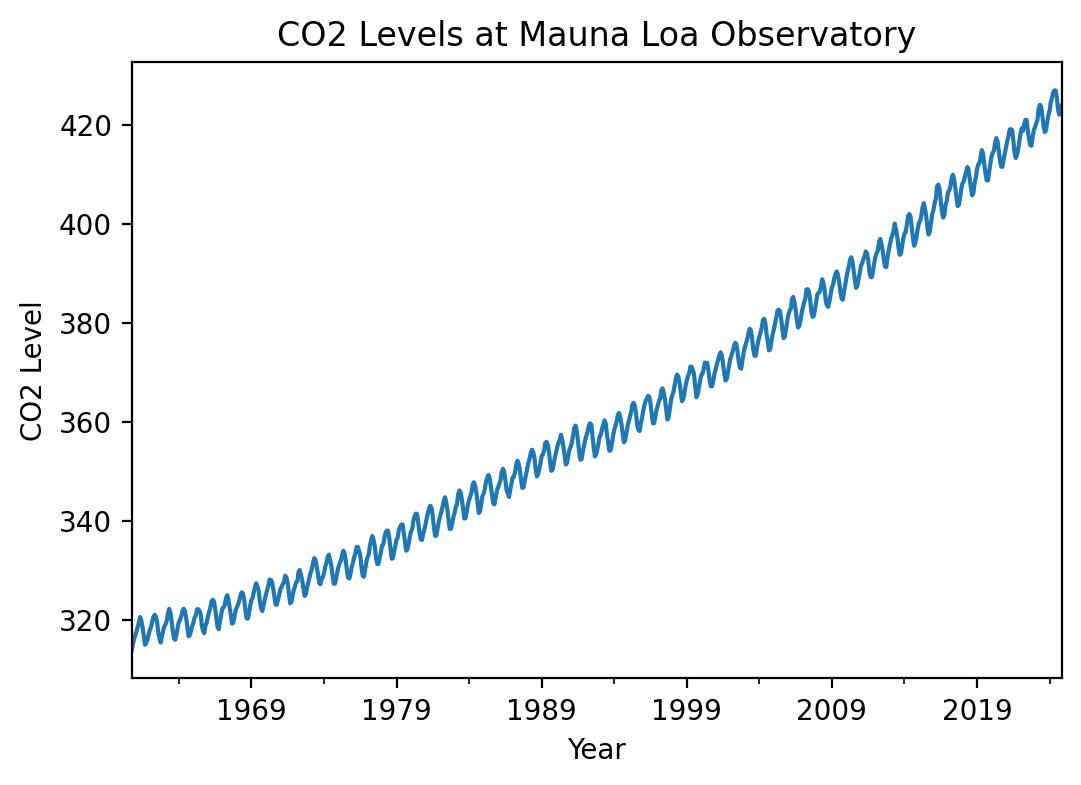

In [ ]:
df.average.plot(figsize=(6, 4), title='CO2 Levels at Mauna Loa Observatory')
plt.xlabel('Year')
plt.ylabel('CO2 Level')

In [ ]:
# Create X and y

# X = months since first measurement
X = np.array(range(len(df)))
y = df.average.values

Text(0, 0.5, 'CO2 Level')

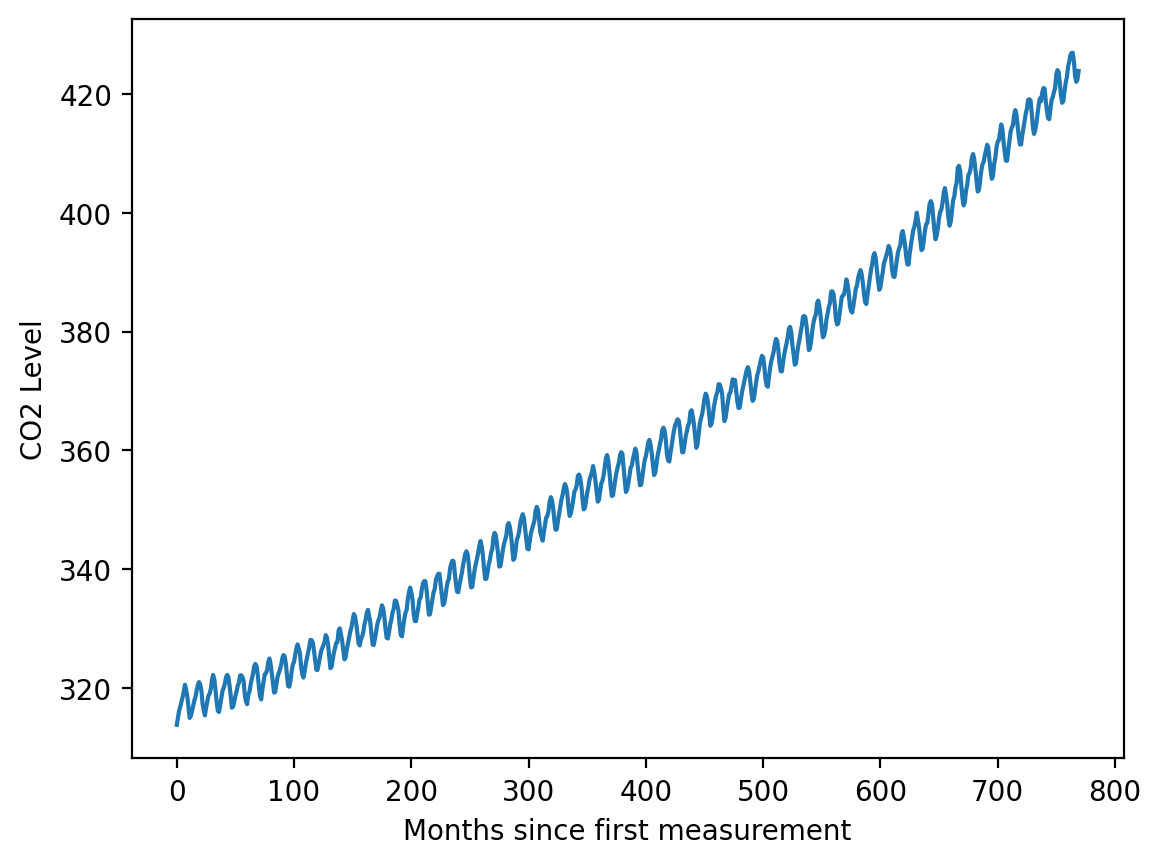

In [ ]:
plt.plot(X, y)
plt.xlabel('Months since first measurement')
plt.ylabel('CO2 Level')

In [ ]:
# Normalize X and y

s1 = StandardScaler()
s2 = StandardScaler()

X_norm = s1.fit_transform(X.reshape(-1, 1))
y_norm = s2.fit_transform(y.reshape(-1, 1))

In [ ]:
X_norm.mean(), X_norm.std()

(1.4764524379430653e-16, 1.0)

In [ ]:
df = pd.DataFrame({"x":X.flatten(), "transformed":X_norm.flatten()})
df

x  transformed
0      0    -1.729803
1      1    -1.725304
2      2    -1.720805
3      3    -1.716306
4      4    -1.711808
..   ...          ...
765  765     1.711808
766  766     1.716306
767  767     1.720805
768  768     1.725304
769  769     1.729803

[770 rows x 2 columns]

In [ ]:
df["re-transformed"] = s1.inverse_transform(df["transformed"].values.reshape(-1, 1))
df

x  transformed  re-transformed
0      0    -1.729803             0.0
1      1    -1.725304             1.0
2      2    -1.720805             2.0
3      3    -1.716306             3.0
4      4    -1.711808             4.0
..   ...          ...             ...
765  765     1.711808           765.0
766  766     1.716306           766.0
767  767     1.720805           767.0
768  768     1.725304           768.0
769  769     1.729803           769.0

[770 rows x 3 columns]

In [ ]:
df.mean()

x                 3.845000e+02
transformed       1.476452e-16
re-transformed    3.845000e+02
dtype: float64

In [ ]:
df.std()

x                 222.424144
transformed         1.000650
re-transformed    222.424144
dtype: float64

In [ ]:
x_test = np.array([800])
s1.transform(x_test.reshape(-1, 1))

array([[1.8692668]])

In [ ]:
y_norm.mean(), y_norm.std()

(4.429357313829196e-16, 1.0)

Text(0, 0.5, '(Normalized) CO2 Level')

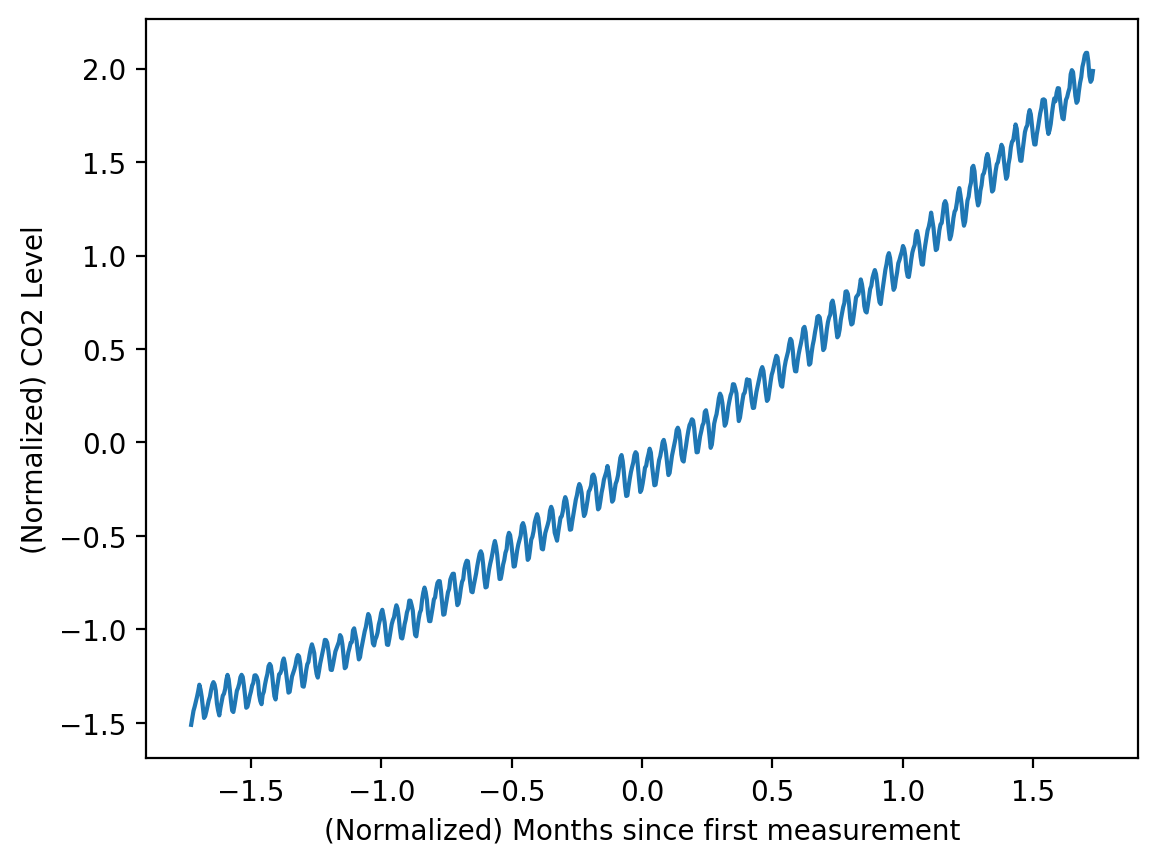

In [ ]:
plt.plot(X_norm, y_norm)
plt.xlabel('(Normalized) Months since first measurement')
plt.ylabel('(Normalized) CO2 Level')

In [ ]:
np.random.seed(42)
train_idx = np.random.choice(range(len(X_norm)), size=int(len(X_norm) * 0.7), replace=False)
test_idx = list(set(range(len(X_norm))) - set(train_idx))

X_train = X[train_idx]
y_train = y[train_idx]

X_test = X[test_idx]
y_test = y[test_idx]

X_norm_train = X_norm[train_idx]
y_norm_train = y_norm[train_idx]

X_norm_test = X_norm[test_idx]
y_norm_test = y_norm[test_idx]

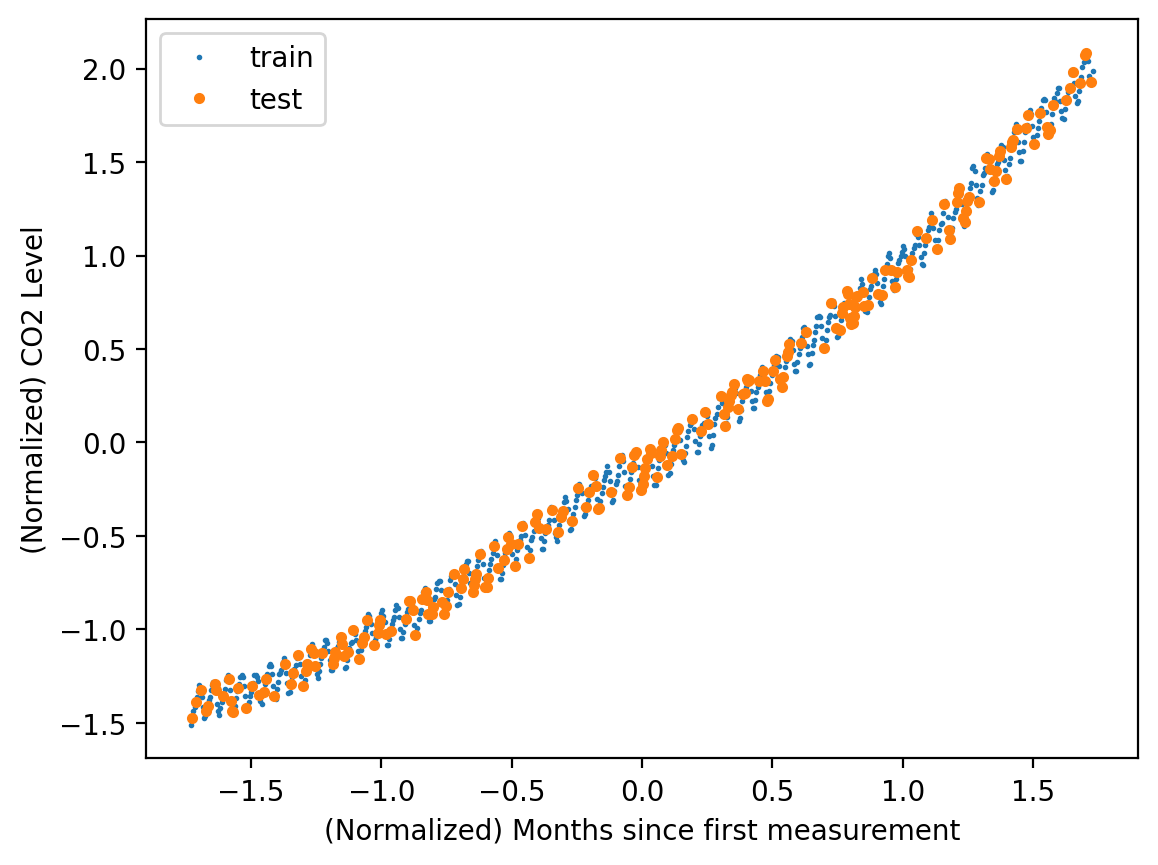

In [ ]:
plt.plot(X_norm_train, y_norm_train, 'o', label='train',markersize=1)
plt.plot(X_norm_test, y_norm_test, 'o', label='test', ms=3)
plt.xlabel('(Normalized) Months since first measurement')
plt.ylabel('(Normalized) CO2 Level')
plt.legend()

In [ ]:
errors= {}
X_lin_1d = np.linspace(X_norm.min(), X_norm.max(), 100).reshape(-1, 1)

In [ ]:
def plot_fit_predict(model, X_norm_train, y_norm_train, X_norm_test, y_norm_test, X_lin, title, plot=True):
    model.fit(X_norm_train, y_norm_train)

    y_hat_train = model.predict(X_norm_train).reshape(-1, 1)
    y_hat_test = model.predict(X_norm_test).reshape(-1, 1)

    # Transform back to original scale
    y_hat_train = s2.inverse_transform(y_hat_train)
    y_hat_test = s2.inverse_transform(y_hat_test)

    y_hat_lin = s2.inverse_transform(model.predict(X_lin).reshape(-1, 1))

    errors[title] = {"train": mean_squared_error(y_train, y_hat_train),
                     "test": mean_squared_error(y_test, y_hat_test)}

    if plot:
        plt.plot(X_train, y_train, 'o', label='train', markersize=1)
        plt.plot(X_test, y_test, 'o', label='test', ms=3)
        plt.plot(s1.inverse_transform(X_lin_1d), y_hat_lin, label='model')
        plt.xlabel('Months since first measurement')
        plt.ylabel('CO2 Levels')
        plt.legend()
        plt.title('{}\n Train MSE: {:.2f} | Test MSE: {:.2f}'.format(title, errors[title]["train"], errors[title]["test"]))

    return errors[title]

{'train': 21.94238554004257, 'test': 19.63765452274334}

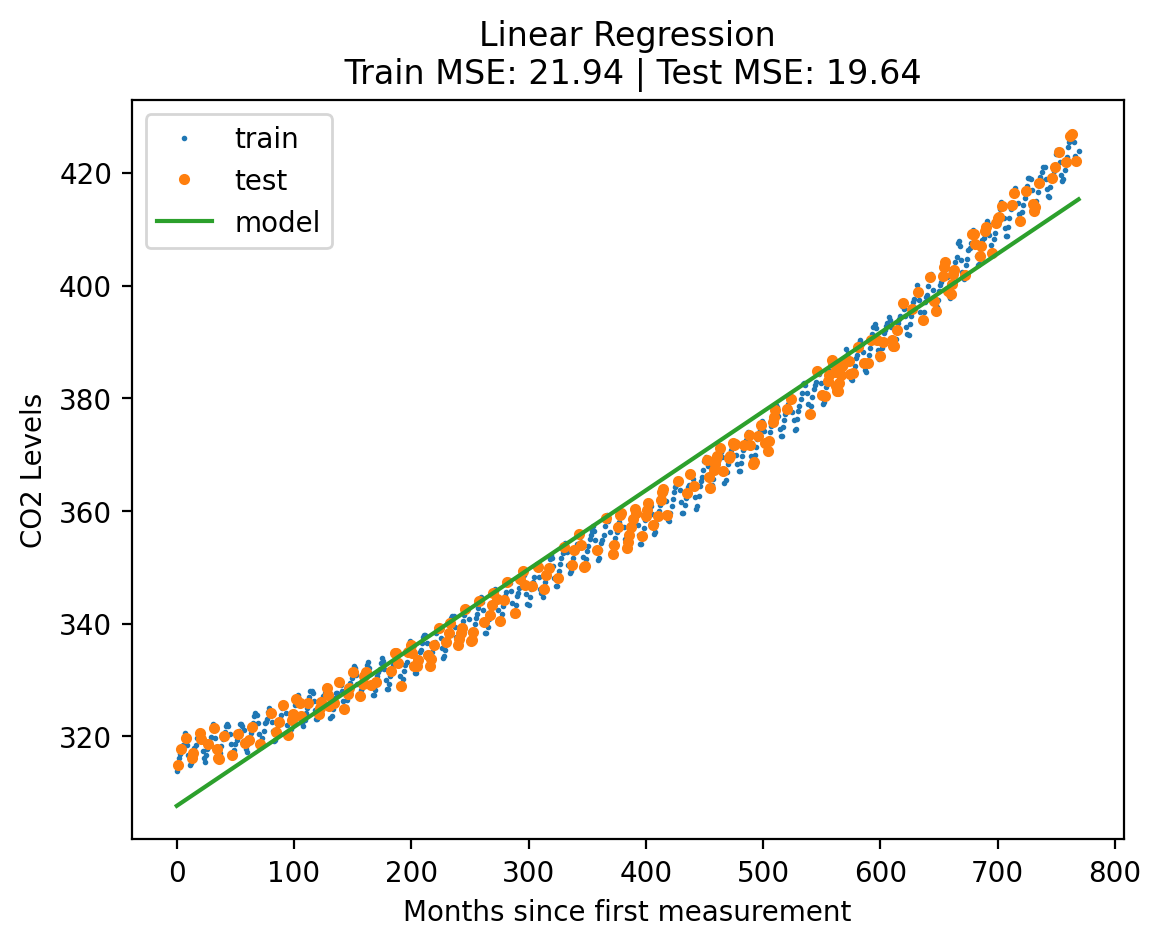

In [ ]:
model = LinearRegression()
plot_fit_predict(model, X_norm_train, y_norm_train, X_norm_test, y_norm_test, X_lin_1d, "Linear Regression")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'train': 4.668828731514309, 'test': 4.758349655176787}

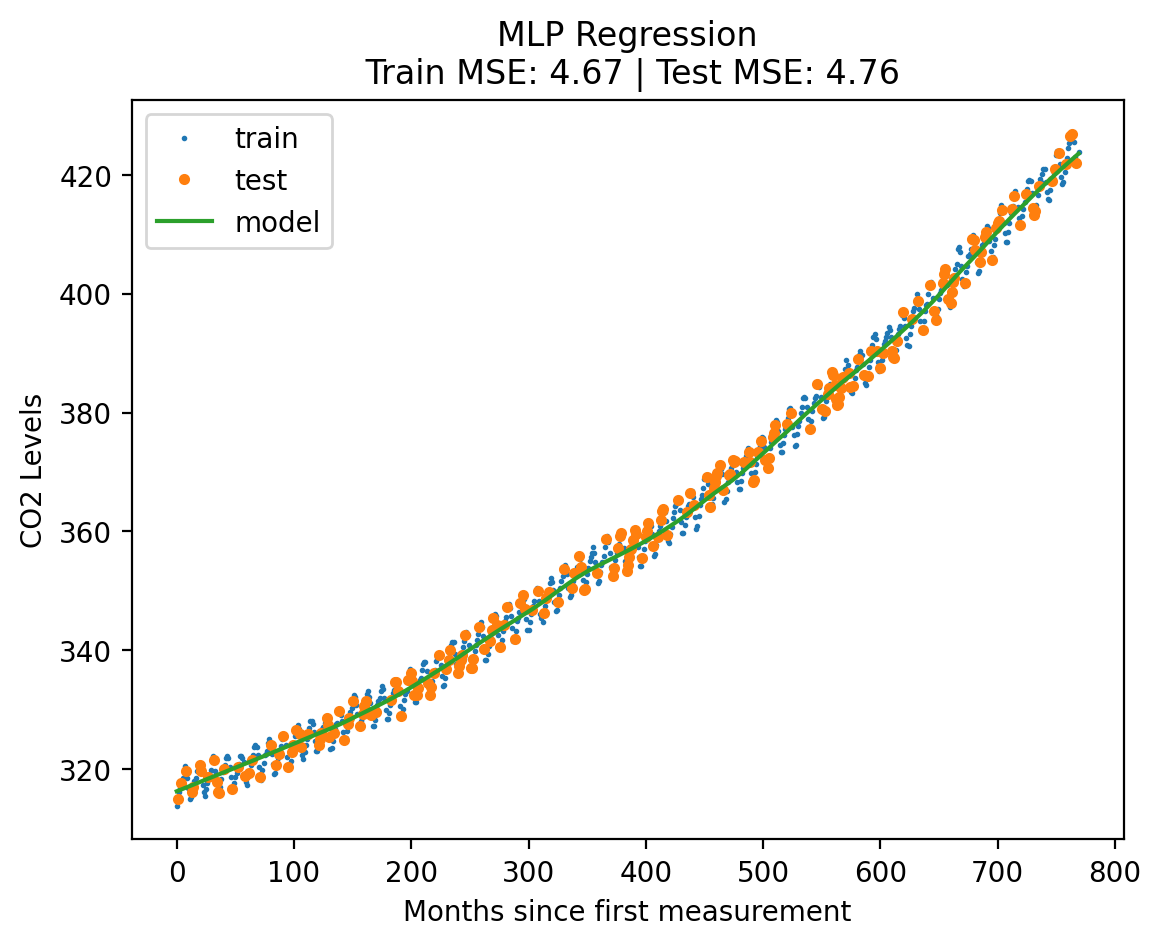

In [ ]:
# use sk-learn for MLP
mlp_model = MLPRegressor(hidden_layer_sizes=[128, 256, 512, 256, 128], max_iter = 10000)

plot_fit_predict(mlp_model, X_norm_train, y_norm_train, X_norm_test, y_norm_test, X_lin_1d, "MLP Regression")

In [ ]:
def create_poly_features(X, d):
    """
    X is (N, 1) array
    d is degree of polynomial
    returns normalized polynomial features of X
    """

    X_poly = np.zeros((len(X), d))
    X_poly[:, 0] = X[:, 0]
    for i in range(1, d):
        X_poly[:, i] = X[:, 0] ** (i + 1)

    # Normalize each column
    X_poly = StandardScaler().fit_transform(X_poly)
    return X_poly

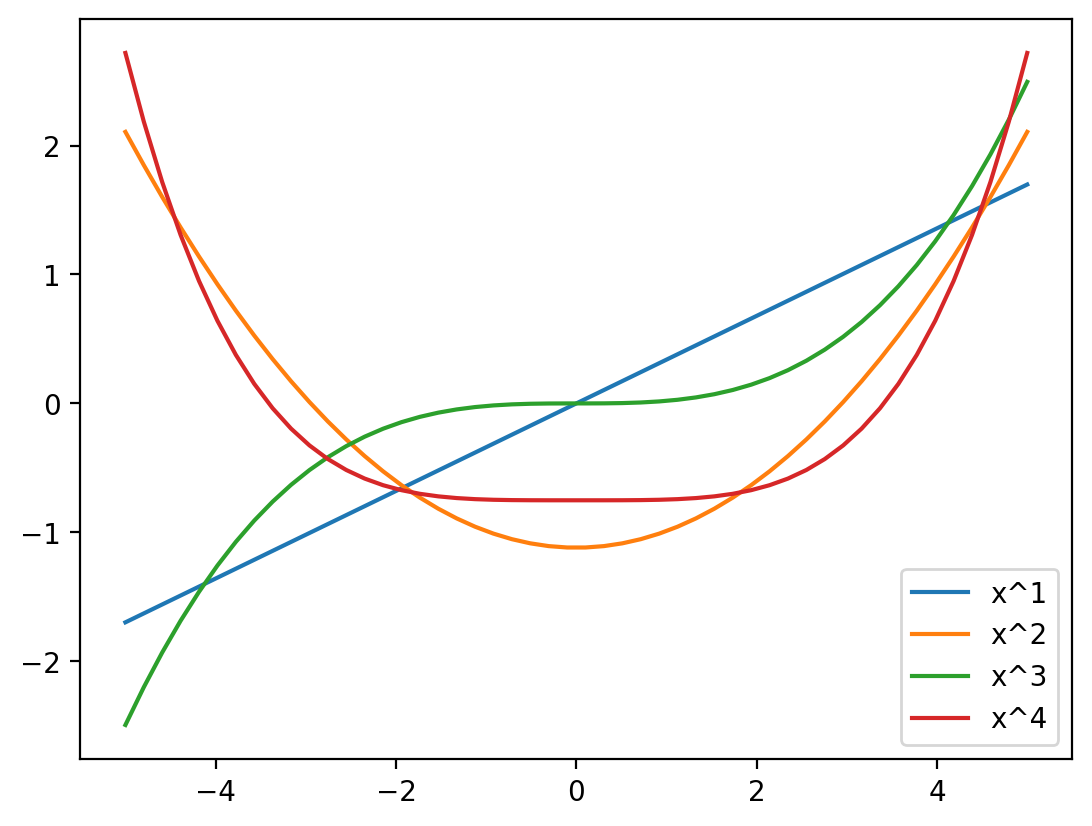

In [ ]:
xs = np.linspace(-5, 5, 50).reshape(-1, 1)
poly_f = create_poly_features(xs, 4)
for i in range(4):
    plt.plot(xs, poly_f[:, i], label='x^{}'.format(i+1))
plt.legend()

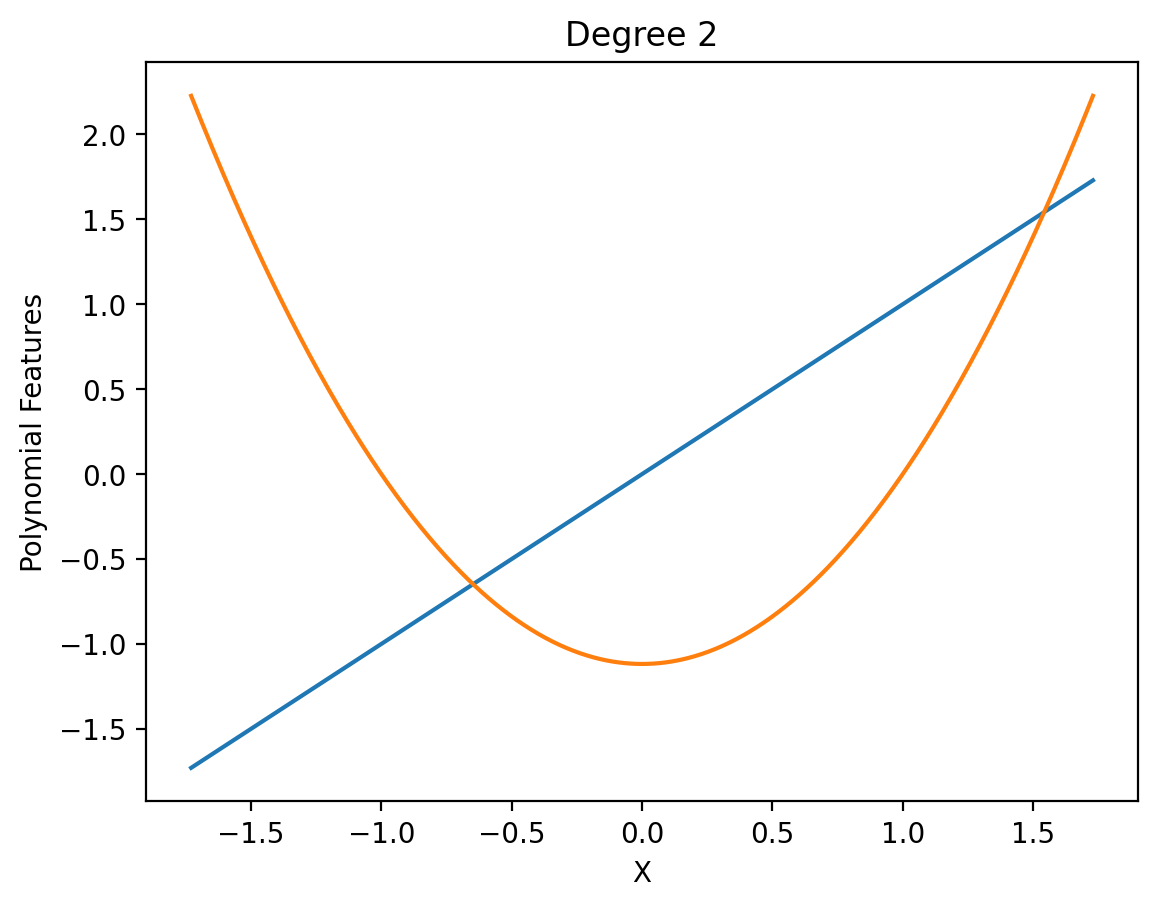

In [ ]:
def show_poly_features(degree):
    X_poly = create_poly_features(X_norm, degree)
    plt.plot(X_norm, X_poly)
    plt.xlabel('X')
    plt.ylabel('Polynomial Features')
    plt.title('Degree {}'.format(degree))

show_poly_features(2)

interactive(children=(IntSlider(value=5, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.show_poly_features(degree)>

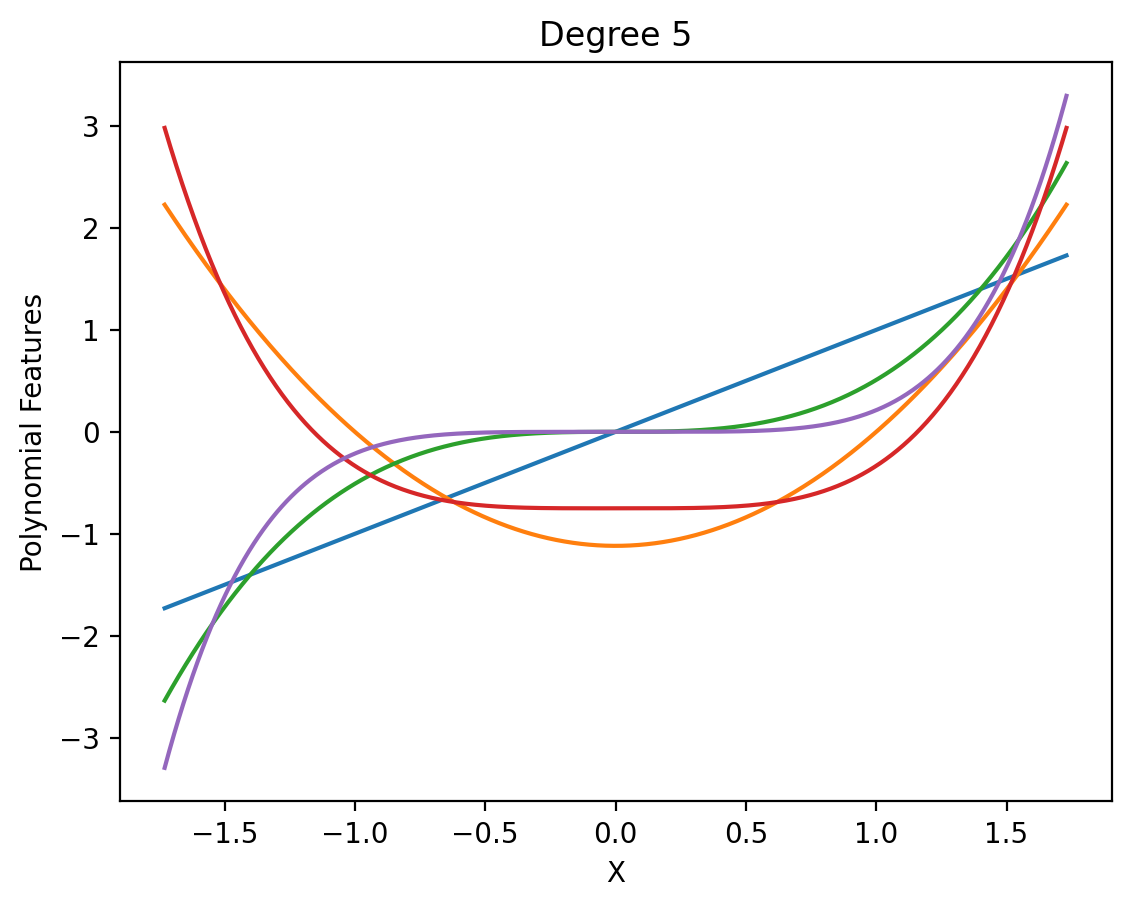

In [ ]:
interact(show_poly_features, degree=(1, 10, 1))

{'train': 4.944485815188723, 'test': 6.4520646175415095}

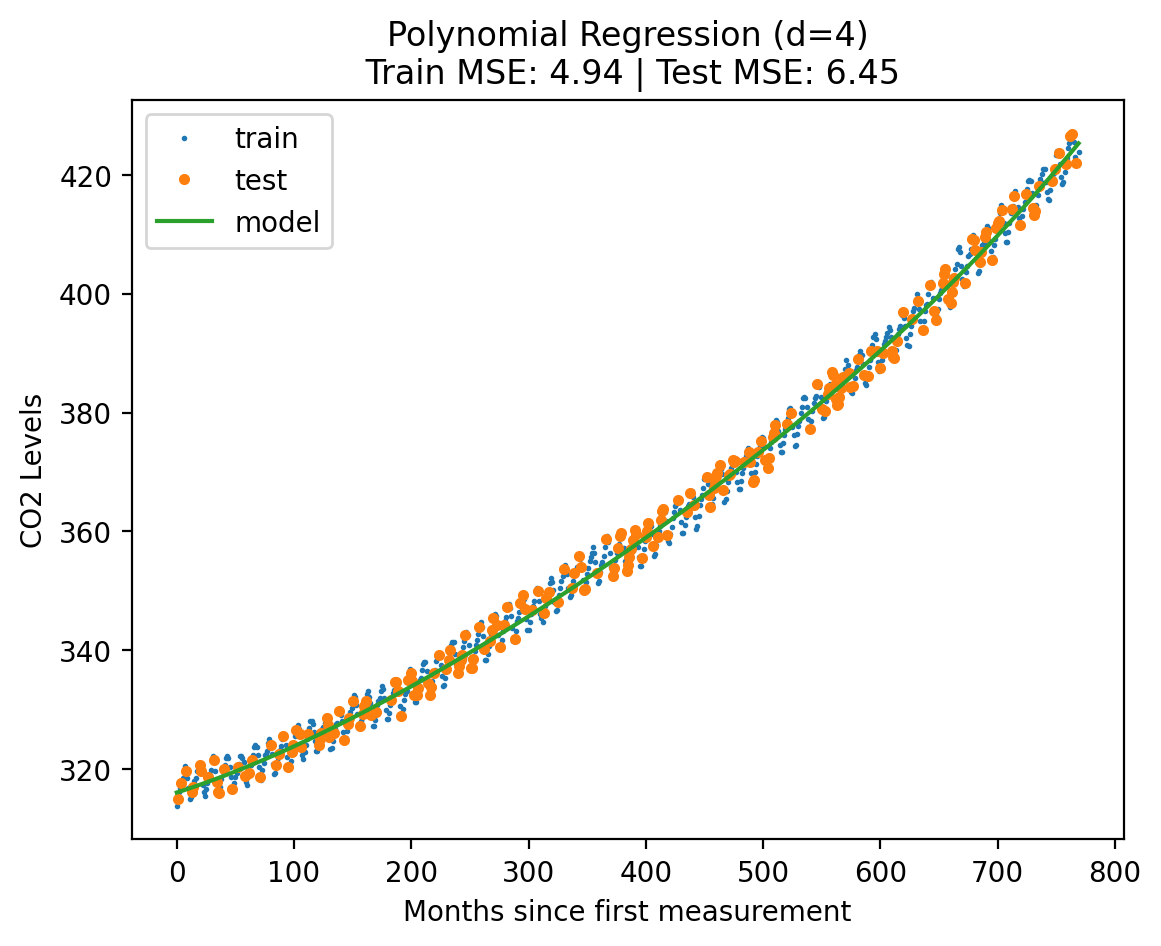

In [ ]:
model2 = LinearRegression()
degree = 4
Xf_norm_train = create_poly_features(X_norm_train.reshape(-1, 1), degree)
Xf_norm_test = create_poly_features(X_norm_test.reshape(-1, 1), degree)
X_lin_poly = create_poly_features(X_lin_1d, degree)

plot_fit_predict(model2, Xf_norm_train, y_norm_train, Xf_norm_test, y_norm_test, X_lin_poly, f"Polynomial Regression (d={degree})")

In [ ]:
model2.coef_, model2.intercept_

(array([[0.97865936, 0.10476802, 0.02282975, 0.02689036]]),
 array([-0.00727761]))

In [ ]:
X_lin_poly.shape

(100, 4)

In [ ]:
model2.coef_.shape

(1, 4)

In [ ]:
X_lin_1d.shape

(100, 1)

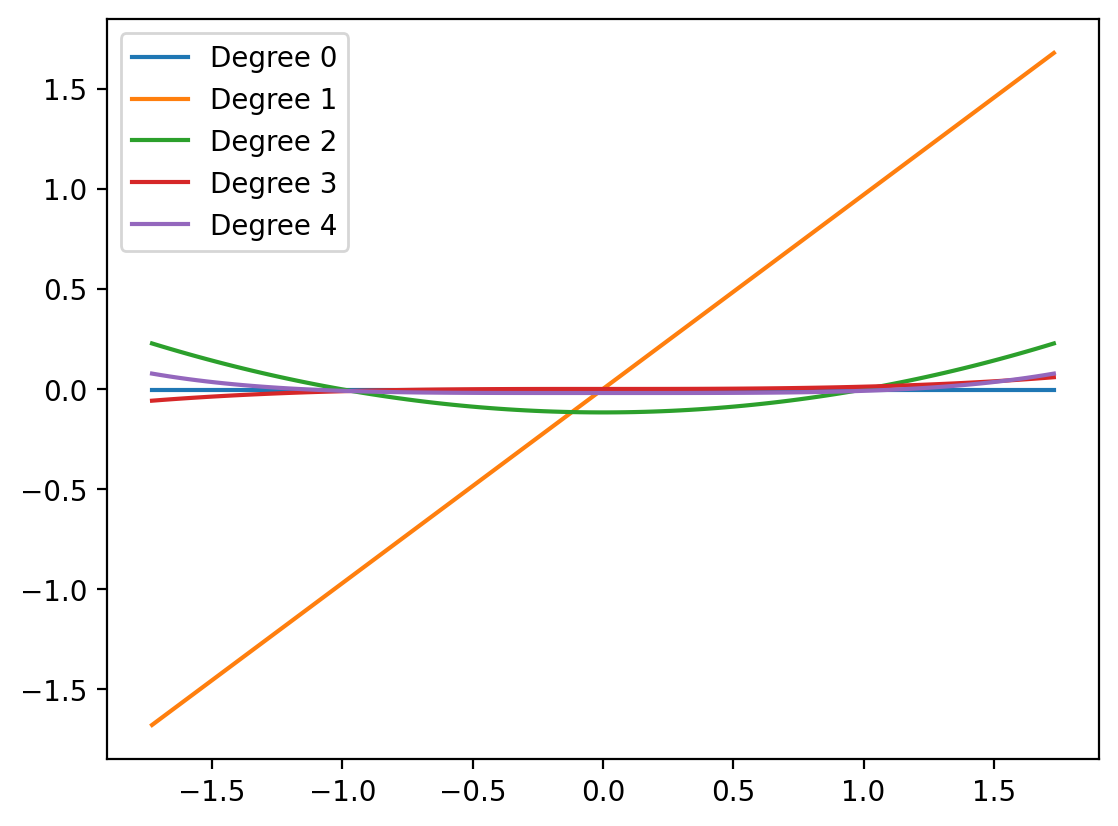

In [ ]:
plt.plot(X_lin_1d, model2.intercept_.repeat(len(X_lin_1d)), label='Degree 0')
plt.plot(X_lin_1d, X_lin_poly[:, 0:1]@model2.coef_[:, 0], label='Degree 1')
plt.plot(X_lin_1d, X_lin_poly[:, 1:2]@model2.coef_[:, 1], label='Degree 2')
plt.plot(X_lin_1d, X_lin_poly[:, 2:3]@model2.coef_[:, 2], label='Degree 3')
plt.plot(X_lin_1d, X_lin_poly[:, 3:4]@model2.coef_[:, 3], label='Degree 4')
plt.legend()

(100,) (100, 1)


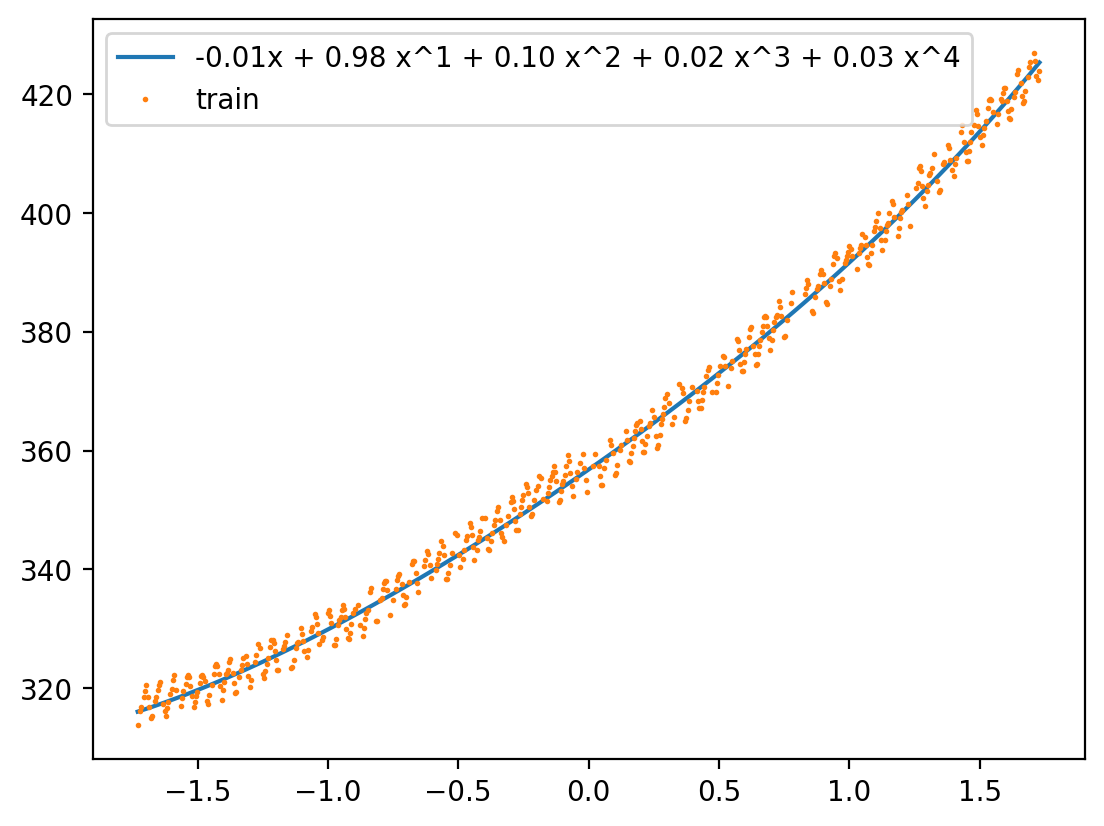

In [ ]:
def show_additive(model, X_lin_1d, max_degree):
    ys = model.intercept_.repeat(len(X_lin_1d))
    #plt.fill_between(X_lin_1d.squeeze(), s2.inverse_transform(ys.reshape(-1, 1)).squeeze(), alpha=0.1)
    print(ys.shape, X_lin_1d.shape)
    label = '{:0.2f}x'.format(model.intercept_[0])

    for i in range(1, max_degree + 1):
        yd = X_lin_poly[:, i-1:i]@model.coef_[:, i-1]
        ys = ys + yd
        label += ' + {:0.2f} x^{}'.format(model.coef_[:, i-1][0], i)
    ys = s2.inverse_transform(ys.reshape(-1, 1))
    plt.plot(X_lin_1d, ys, label = label)
    plt.plot(X_norm_train, y_train, 'o', label='train', markersize=1)
    plt.legend()

show_additive(model2, X_lin_1d, 4)

(100,) (100, 1)


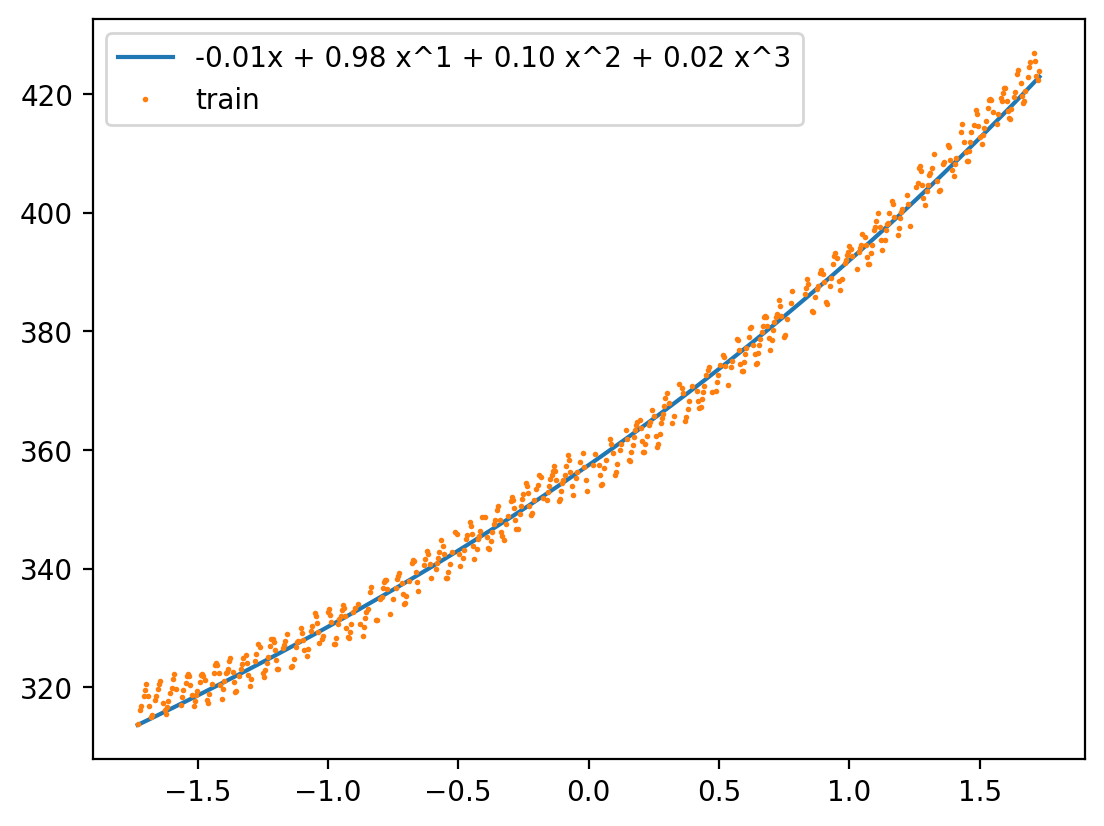

In [ ]:
def show_additive(model, X_lin_1d, max_degree):
    ys = model.intercept_.repeat(len(X_lin_1d))
    #plt.fill_between(X_lin_1d.squeeze(), s2.inverse_transform(ys.reshape(-1, 1)).squeeze(), alpha=0.1)
    print(ys.shape, X_lin_1d.shape)
    label = '{:0.2f}x'.format(model.intercept_[0])

    for i in range(1, max_degree + 1):
        yd = X_lin_poly[:, i-1:i]@model.coef_[:, i-1]
        ys = ys + yd
        label += ' + {:0.2f} x^{}'.format(model.coef_[:, i-1][0], i)
    ys = s2.inverse_transform(ys.reshape(-1, 1))
    plt.plot(X_lin_1d, ys, label = label)
    plt.plot(X_norm_train, y_train, 'o', label='train', markersize=1)
    plt.legend()

show_additive(model2, X_lin_1d, 3)

interactive(children=(IntSlider(value=2, description='max_degree', max=4, min=1), Output()), _dom_classes=('wi…

<function __main__.show_additive(model, X_lin_1d, max_degree)>

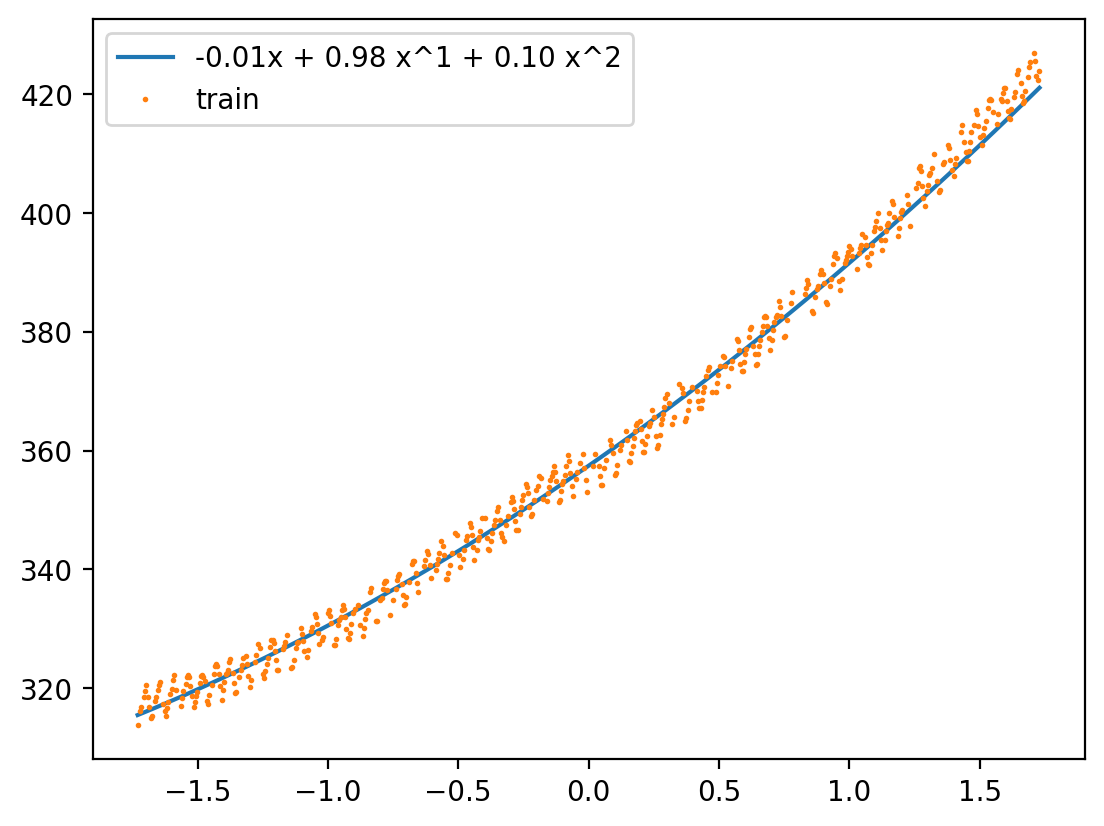

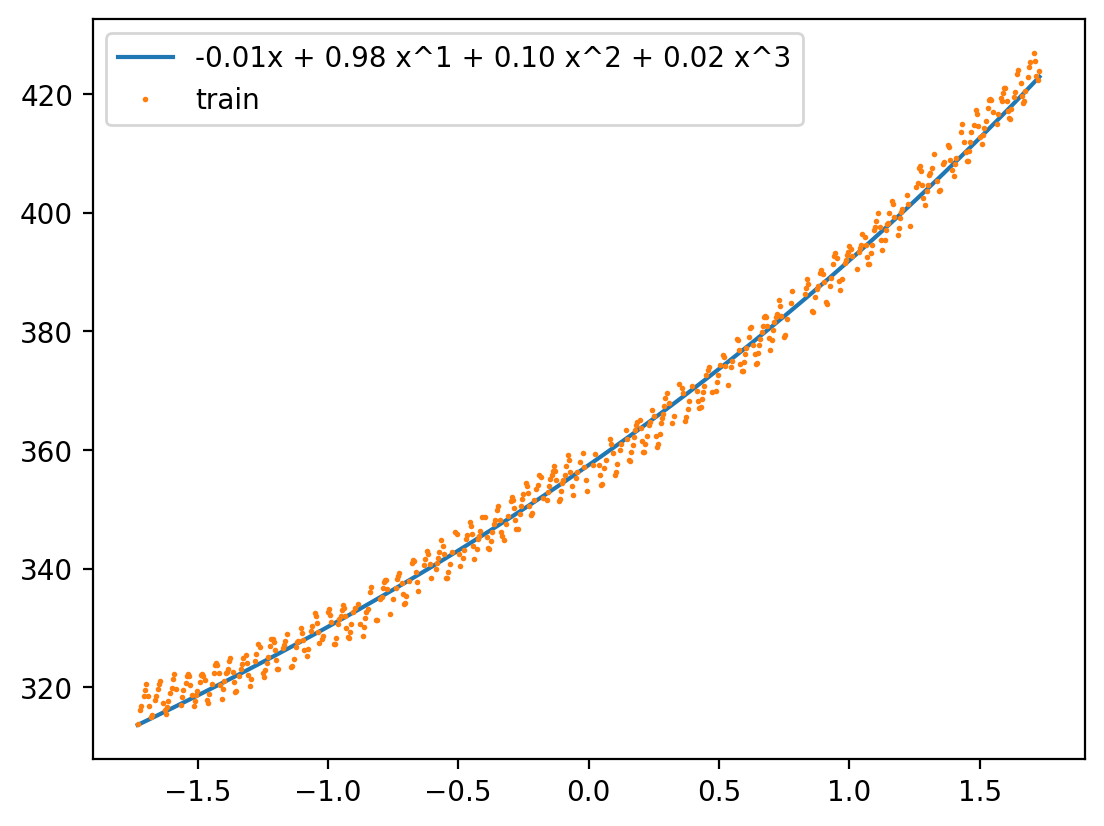

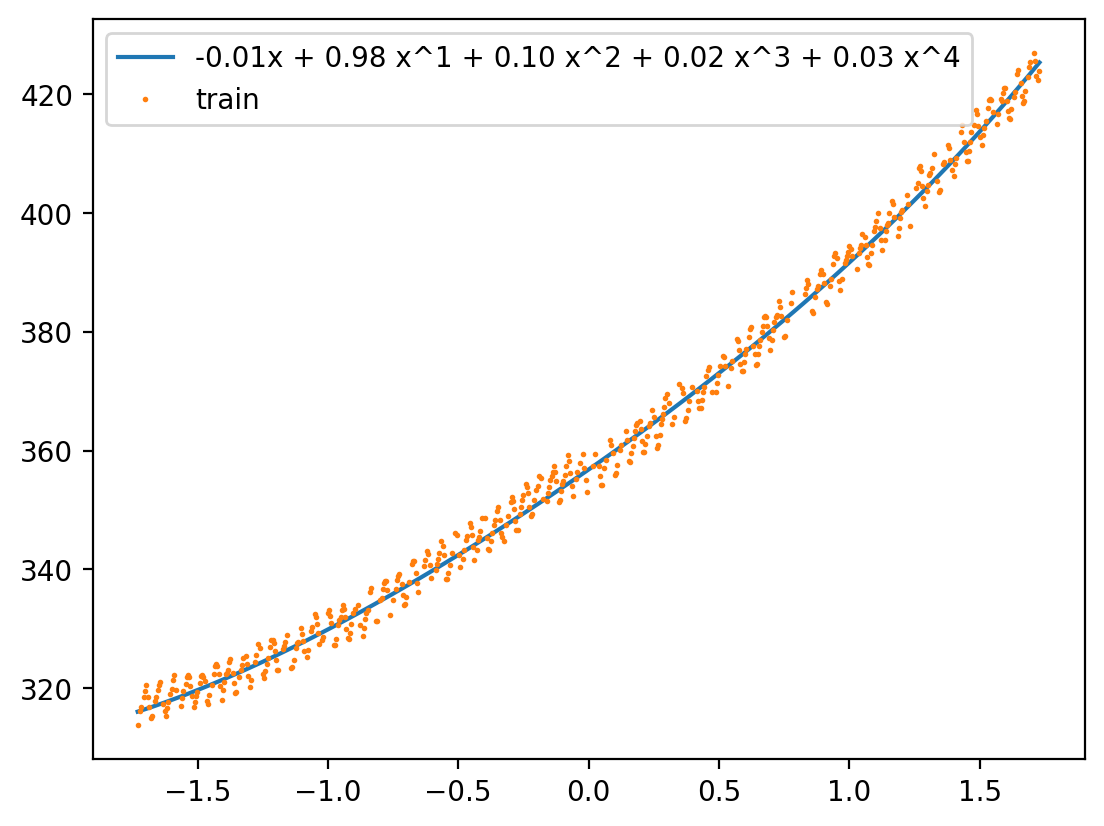

In [ ]:
from ipywidgets import interact, fixed
m = model2
interact(show_additive, model=fixed(m), X_lin_1d=fixed(X_lin_1d), max_degree=(1, len(m.coef_[0]), 1))

In [ ]:
for degree in range(1, 10):
    Xf_norm_train = create_poly_features(X_norm_train.reshape(-1, 1), degree)
    Xf_norm_test = create_poly_features(X_norm_test.reshape(-1, 1), degree)

    X_lin_poly = create_poly_features(X_lin_1d, degree)

    plot_fit_predict(model2, Xf_norm_train, y_norm_train, Xf_norm_test, y_norm_test, X_lin_poly, f"Polynomial Regression (d={degree})", plot=False)

In [ ]:
errors_df = pd.DataFrame(errors).T
errors_df

train       test
Linear Regression            21.942386  19.637655
MLP Regression                4.668829   4.758350
Polynomial Regression (d=4)   4.944486   6.452065
Polynomial Regression (d=1)  21.942386  21.270912
Polynomial Regression (d=2)   5.082855   6.800546
Polynomial Regression (d=3)   5.001551   6.667693
Polynomial Regression (d=5)   4.806050   6.538557
Polynomial Regression (d=6)   4.802758   6.533414
Polynomial Regression (d=7)   4.750649   6.650600
Polynomial Regression (d=8)   4.738092   6.676922
Polynomial Regression (d=9)   4.694906   6.701645

<Axes: title={'center': 'MSE for Train and Test Sets'}>

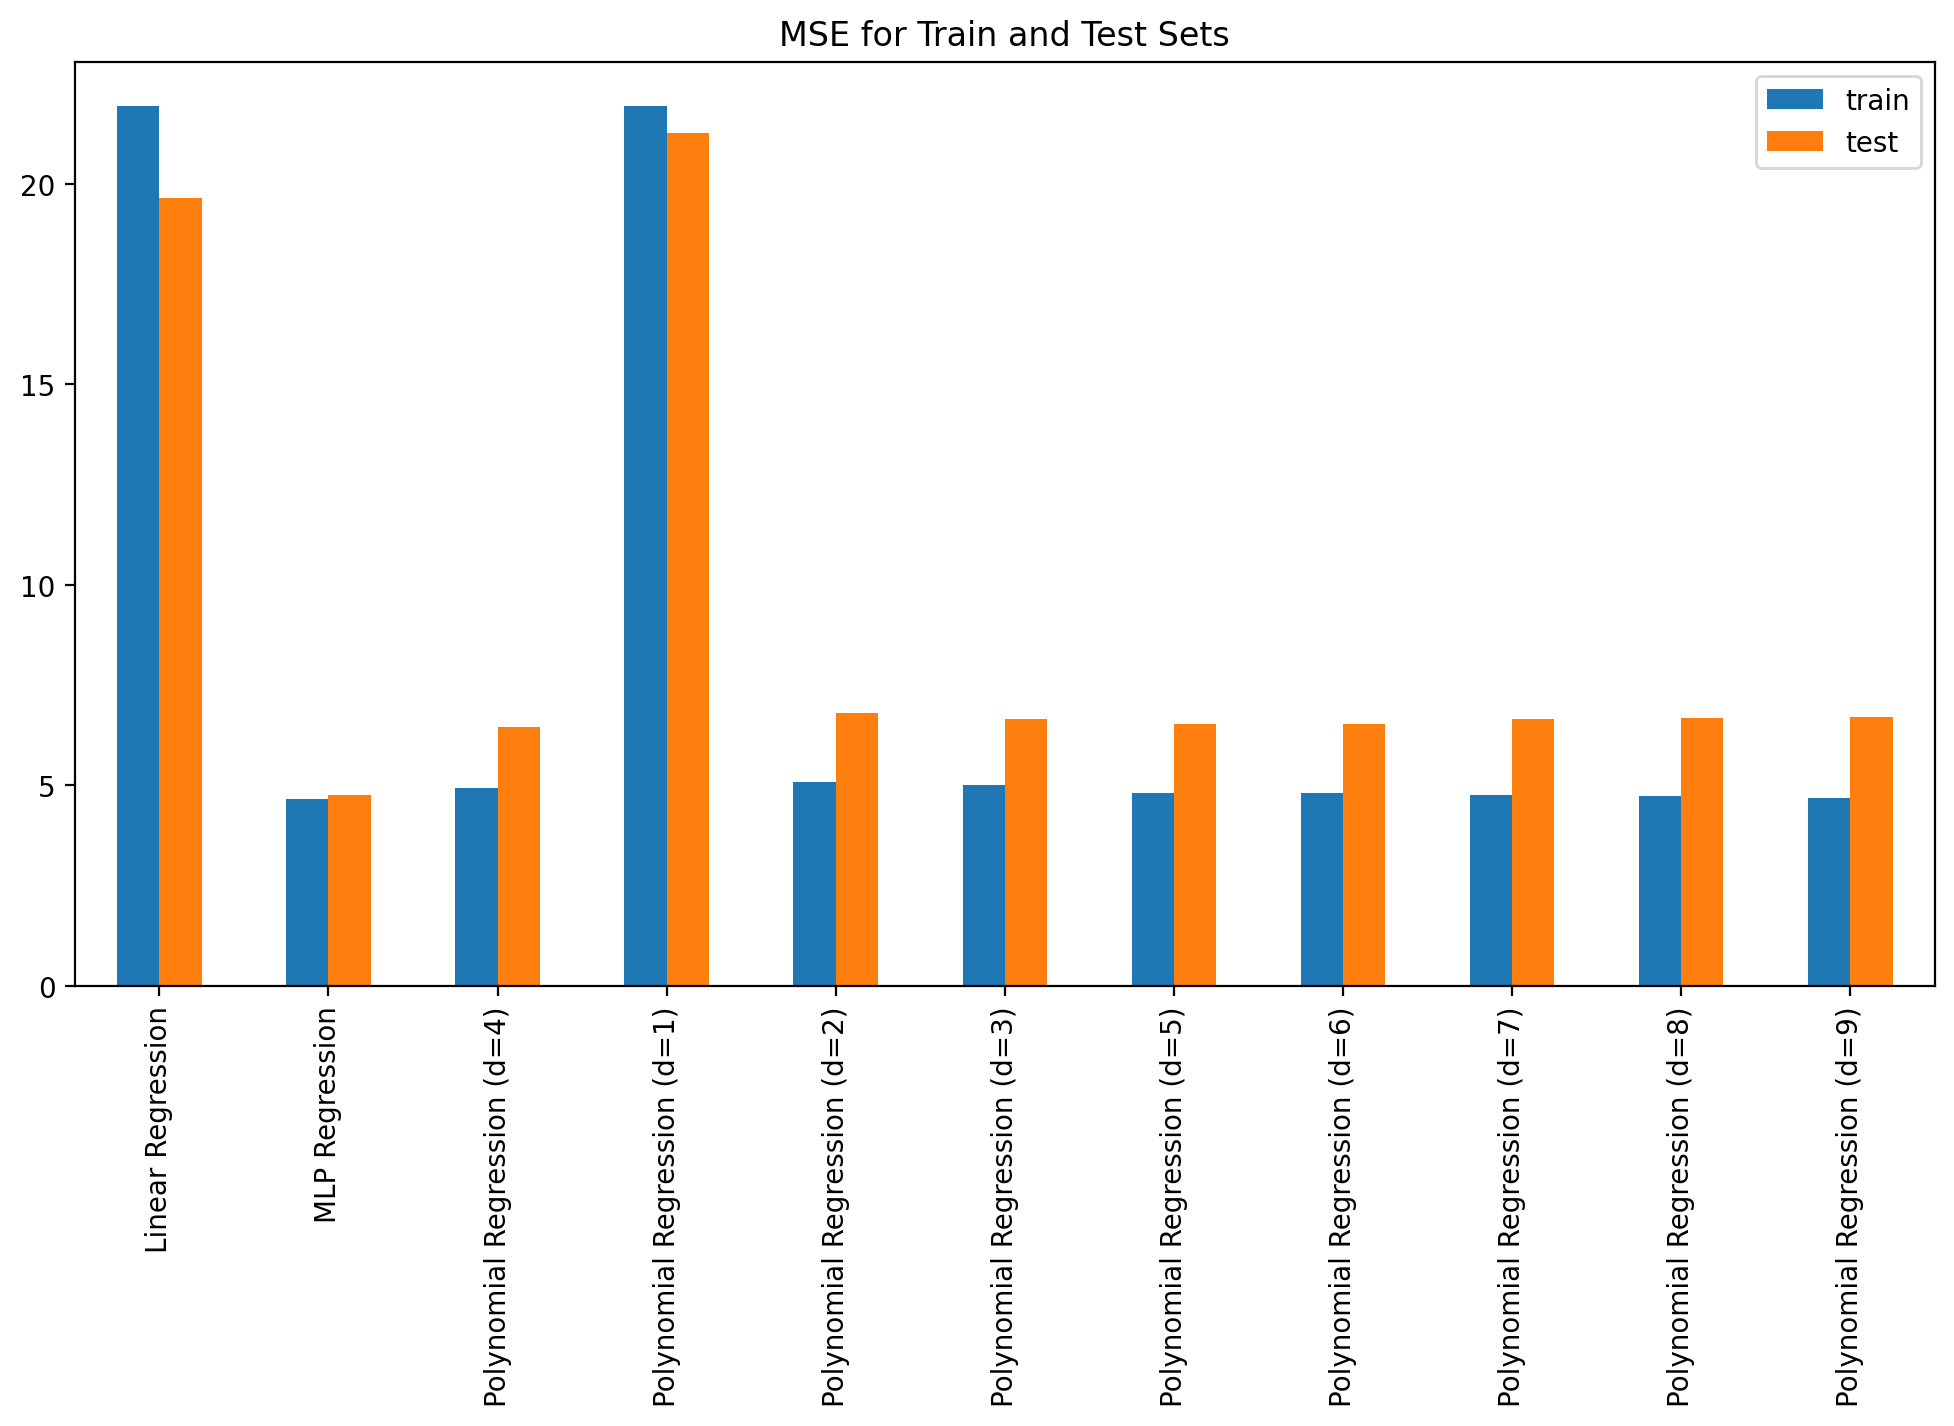

In [ ]:
errors_df.plot(kind='bar', figsize=(12, 6), title='MSE for Train and Test Sets')

In [ ]:
# bias variance tradeoff

errors_poly = {}

for degree in range(1, 20):
    Xf_norm_train = create_poly_features(X_norm_train.reshape(-1, 1), degree)
    Xf_norm_test = create_poly_features(X_norm_test.reshape(-1, 1), degree)

    X_lin_poly = create_poly_features(X_lin_1d, degree)

    plot_fit_predict(model2, Xf_norm_train, y_norm_train, Xf_norm_test, y_norm_test, X_lin_poly, degree, plot=False)

    # geting errors for polynomial regression only for plotting
    errors_poly[degree] = errors[degree]

Best degree: 4, Min error: 6.667693060359606


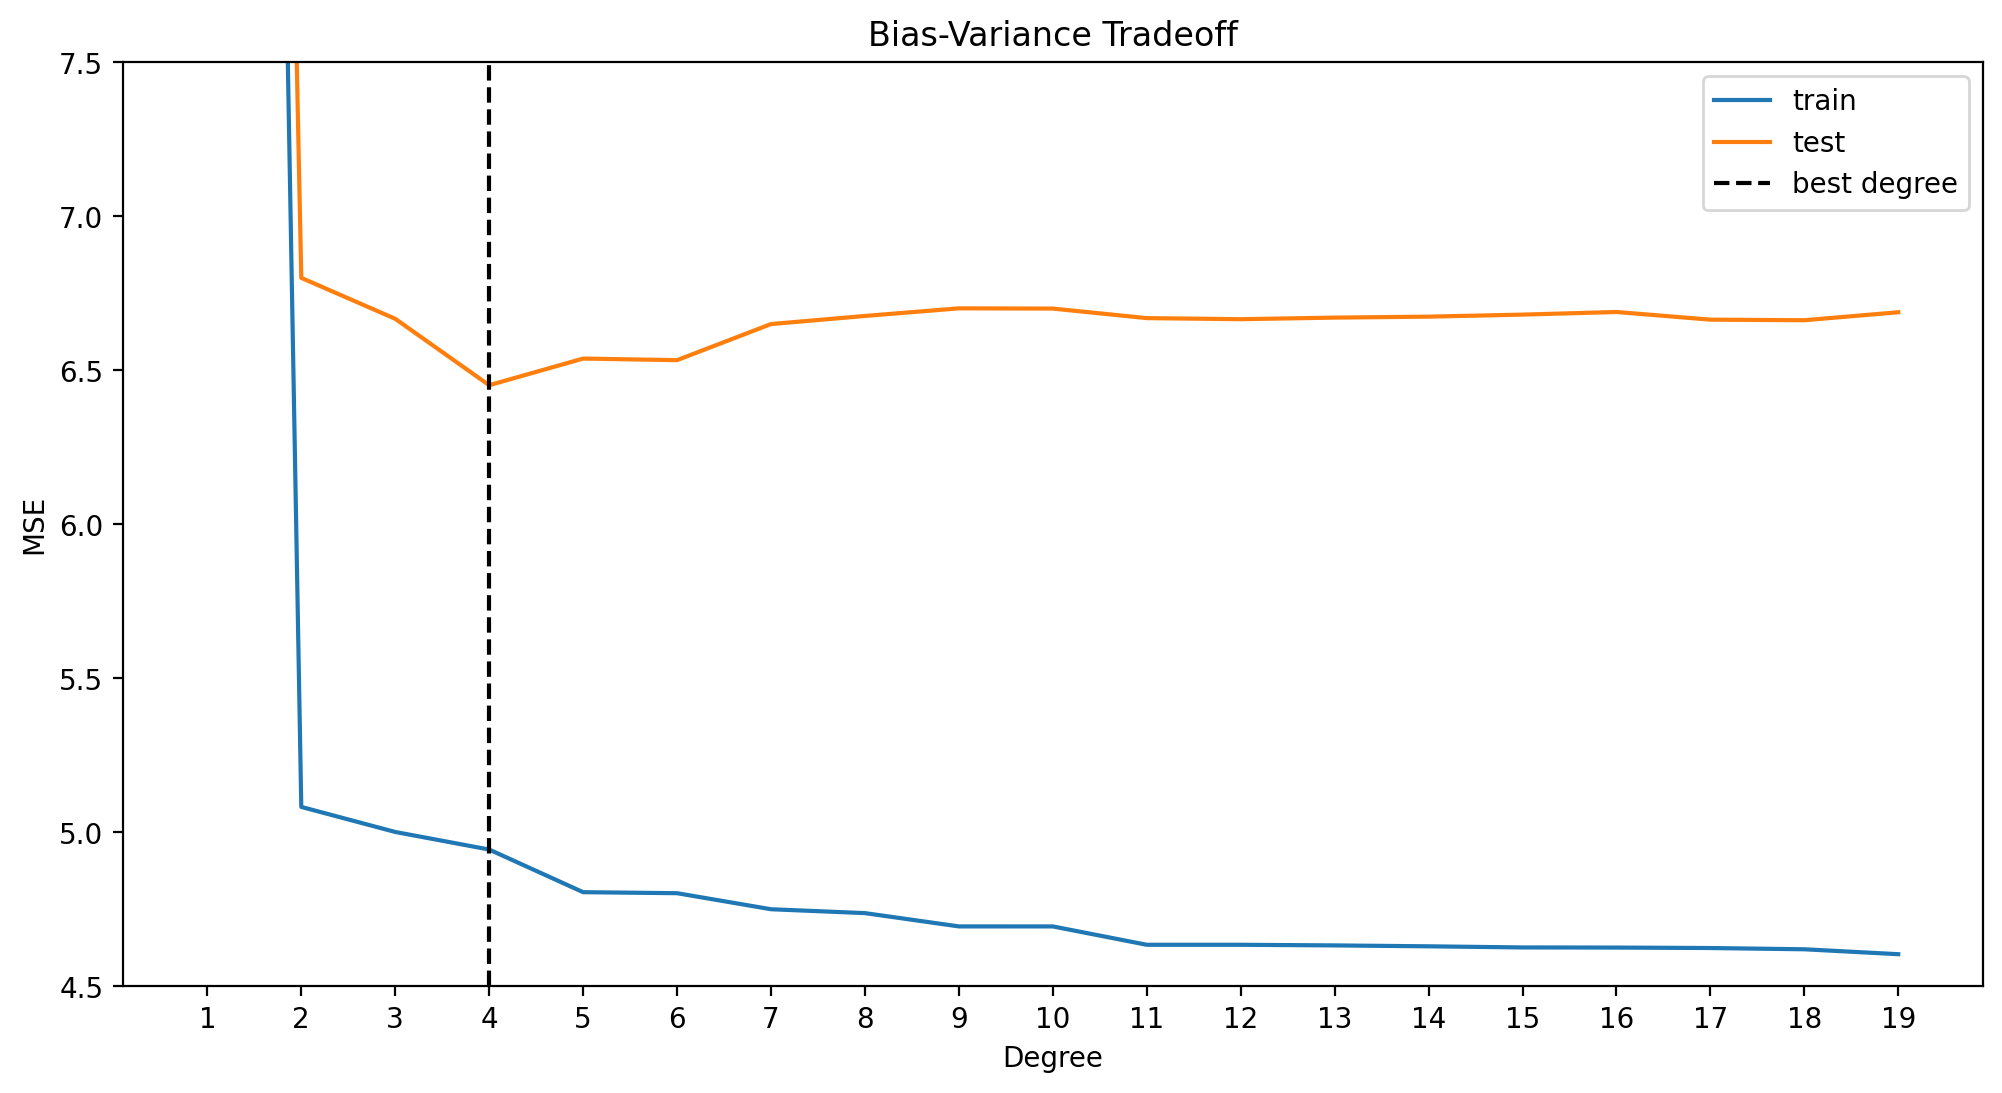

In [ ]:
errors_poly_df = pd.DataFrame(errors_poly).T
best_degree = np.argmin(errors_poly_df.test) + 1
min_error = errors_poly_df.test[best_degree - 1]    # index of df = degree - 1
print(f"Best degree: {best_degree}, Min error: {min_error}")

# set figure size
plt.figure(figsize=(12, 6))
plt.plot(errors_poly_df.index.values, errors_poly_df.train.values, label='train')
plt.plot(errors_poly_df.index.values, errors_poly_df.test.values, label='test')
plt.axvline(best_degree, color='black', linestyle='--', label='best degree')
plt.xticks(np.arange(min(errors_poly_df.index), max(errors_poly_df.index)+1, 1.0))
plt.ylim(4.5, 7.5)      # set y limit - to show the difference between train and test clearly
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

In [ ]:
# initiate ridge regression model
model_ridge = Ridge(alpha=0.3)

errors_ridge = {}

for degree in range(1, 20):
    Xf_norm_train = create_poly_features(X_norm_train.reshape(-1, 1), degree)
    Xf_norm_test = create_poly_features(X_norm_test.reshape(-1, 1), degree)

    X_lin_poly = create_poly_features(X_lin_1d, degree)

    plot_fit_predict(model_ridge, Xf_norm_train, y_norm_train, Xf_norm_test, y_norm_test, X_lin_poly, f'ridge_{degree}', plot=False)

    # geting errors for polynomial regression only for plotting
    errors_ridge[degree] = errors[f'ridge_{degree}']

Best degree: 4, Min error: 6.624241158773104


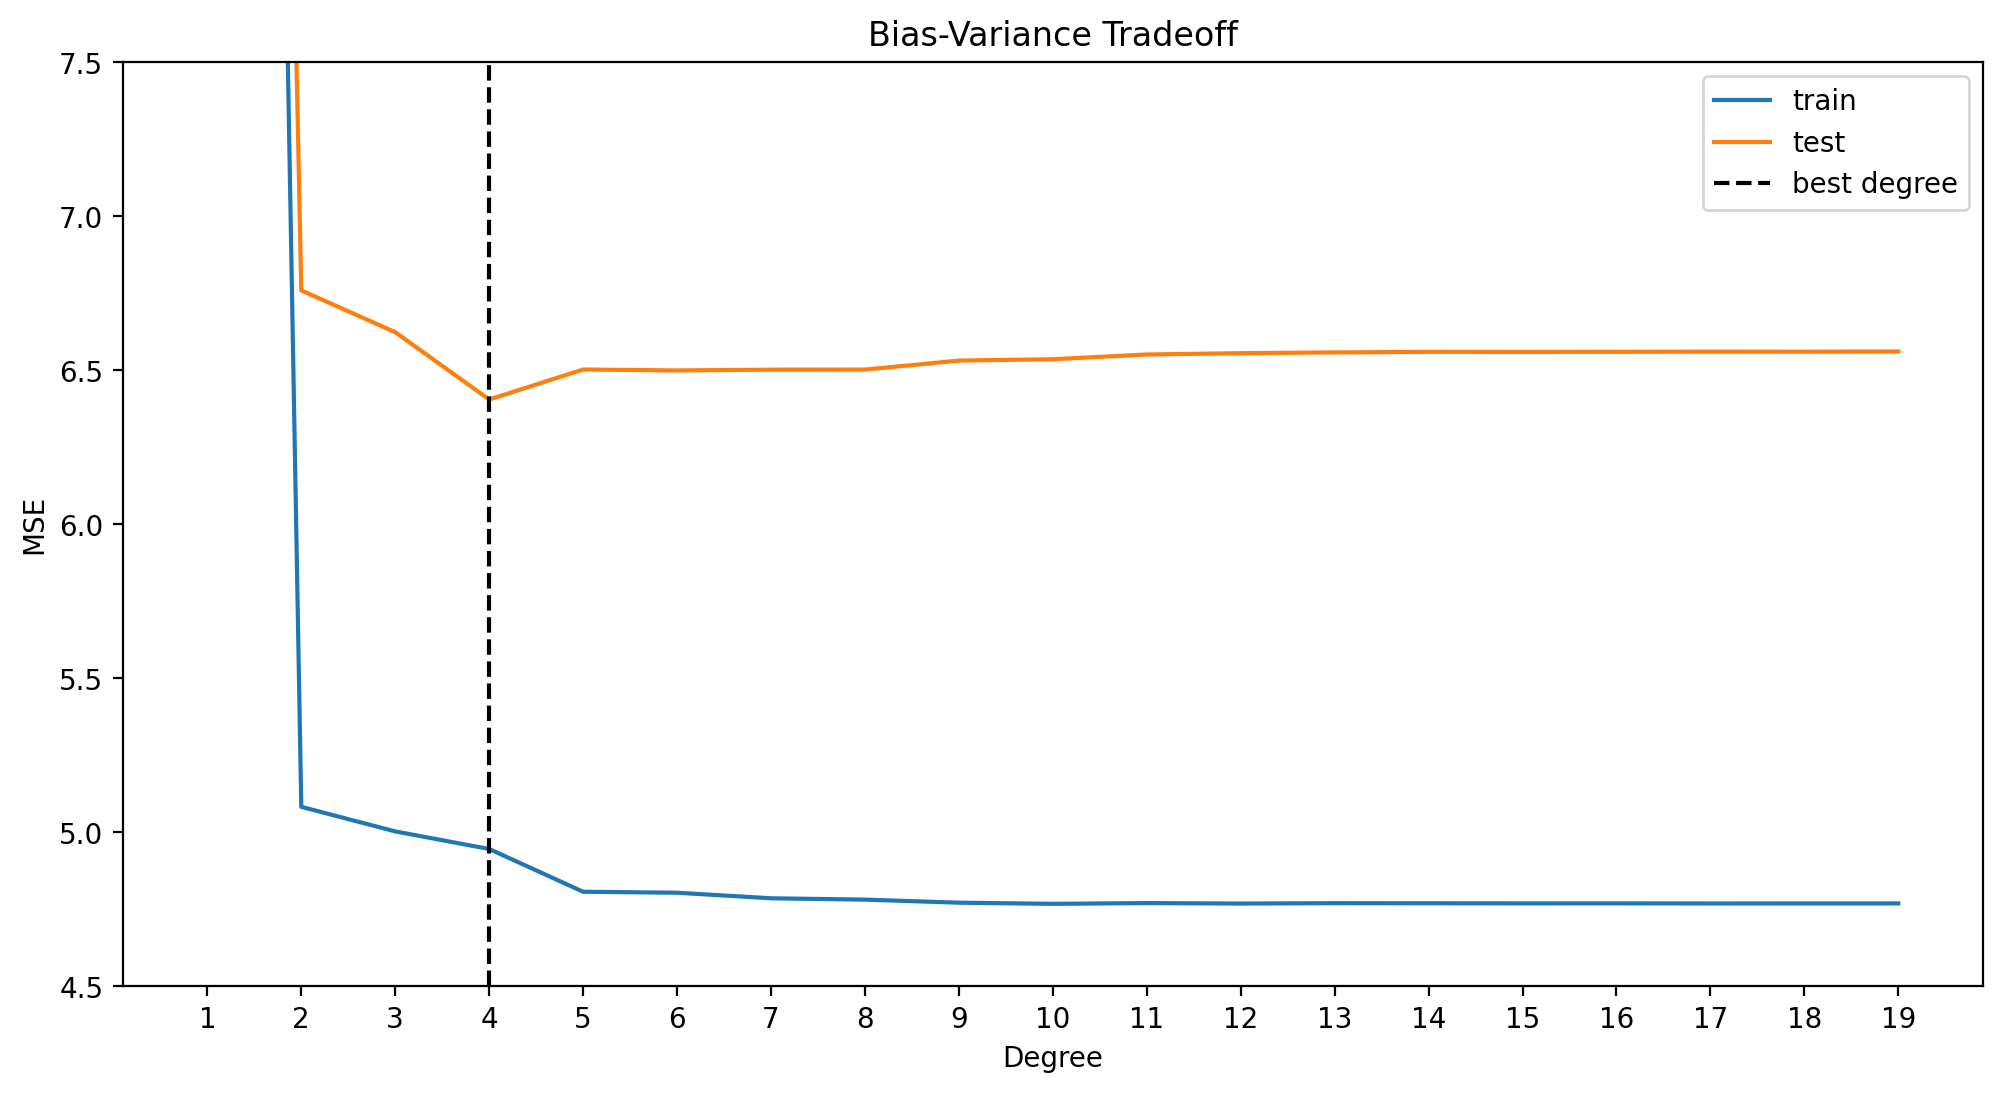

In [ ]:
errors_ridge_df = pd.DataFrame(errors_ridge).T
best_degree_ridge = np.argmin(errors_ridge_df.test) + 1
min_error = errors_ridge_df.test[best_degree_ridge - 1]    # index of df = degree - 1
print(f"Best degree: {best_degree_ridge}, Min error: {min_error}")

# set figure size
plt.figure(figsize=(12, 6))
plt.plot(errors_ridge_df.index.values, errors_ridge_df.train.values, label='train')
plt.plot(errors_ridge_df.index.values, errors_ridge_df.test.values, label='test')
plt.axvline(best_degree_ridge, color='black', linestyle='--', label='best degree')
plt.xticks(np.arange(min(errors_ridge_df.index), max(errors_ridge_df.index)+1, 1.0))
plt.ylim(4.5, 7.5)      # set y limit - to show the difference between train and test clearly
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

{'train': 4.769507738384791, 'test': 6.561665185519588}

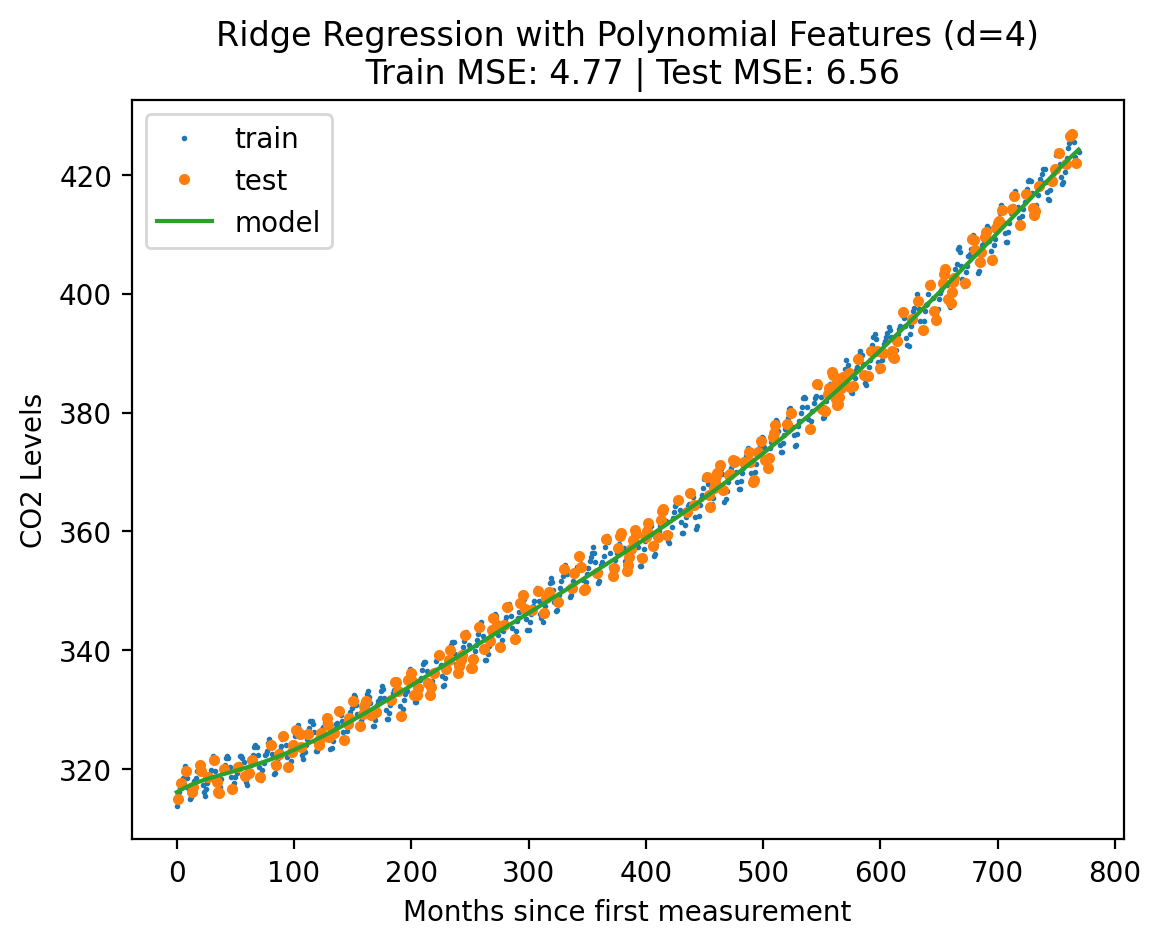

In [ ]:
plot_fit_predict(model_ridge, Xf_norm_train, y_norm_train, Xf_norm_test, y_norm_test, X_lin_poly, f"Ridge Regression with Polynomial Features (d={best_degree_ridge})", plot=True)

In [ ]:
def create_guassian_basis(X , d , std = 1):
    """
    X is (N, 1) array
    d is number of basis functions
    """
    means = np.linspace(X.min(), X.max(), d)
    X = np.repeat(X, d, axis=1)
    means = np.repeat(means.reshape(-1, 1), len(X), axis=1).T

    return np.exp(-(X - means) ** 2 / (2 * std ** 2))

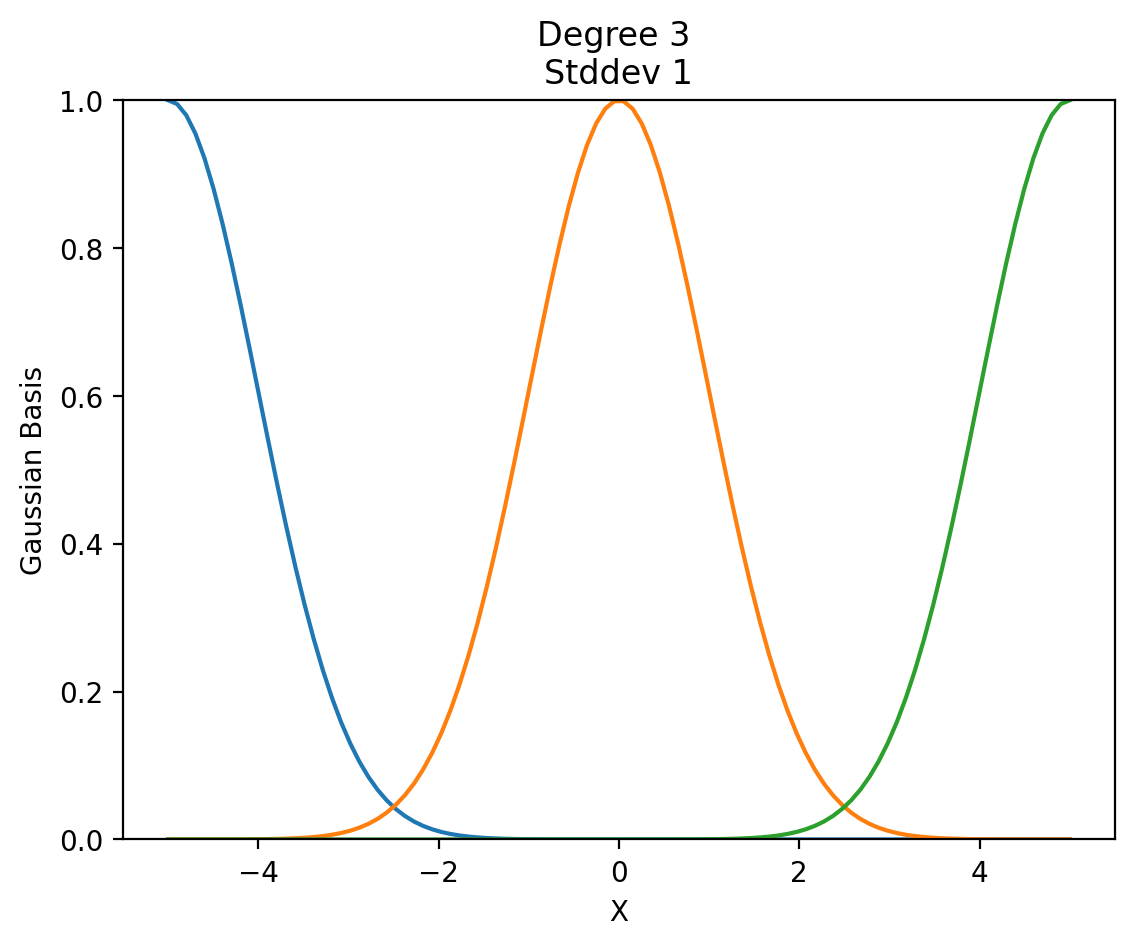

In [ ]:
def show_gaussian_basis(d, stdev):
    xs = np.linspace(-5, 5, 100).reshape(-1, 1)
    X_gauss = create_guassian_basis(xs, d, std=stdev)
    plt.plot(xs, X_gauss)
    plt.xlabel('X')
    plt.ylabel('Gaussian Basis')
    plt.title('Degree {} \nStddev {}'.format(d, stdev))
    plt.ylim(0, 1)

show_gaussian_basis(3, 1)

interactive(children=(IntSlider(value=5, description='d', max=10, min=1), FloatSlider(value=10.0, description=…

<function __main__.show_gaussian_basis(d, stdev)>

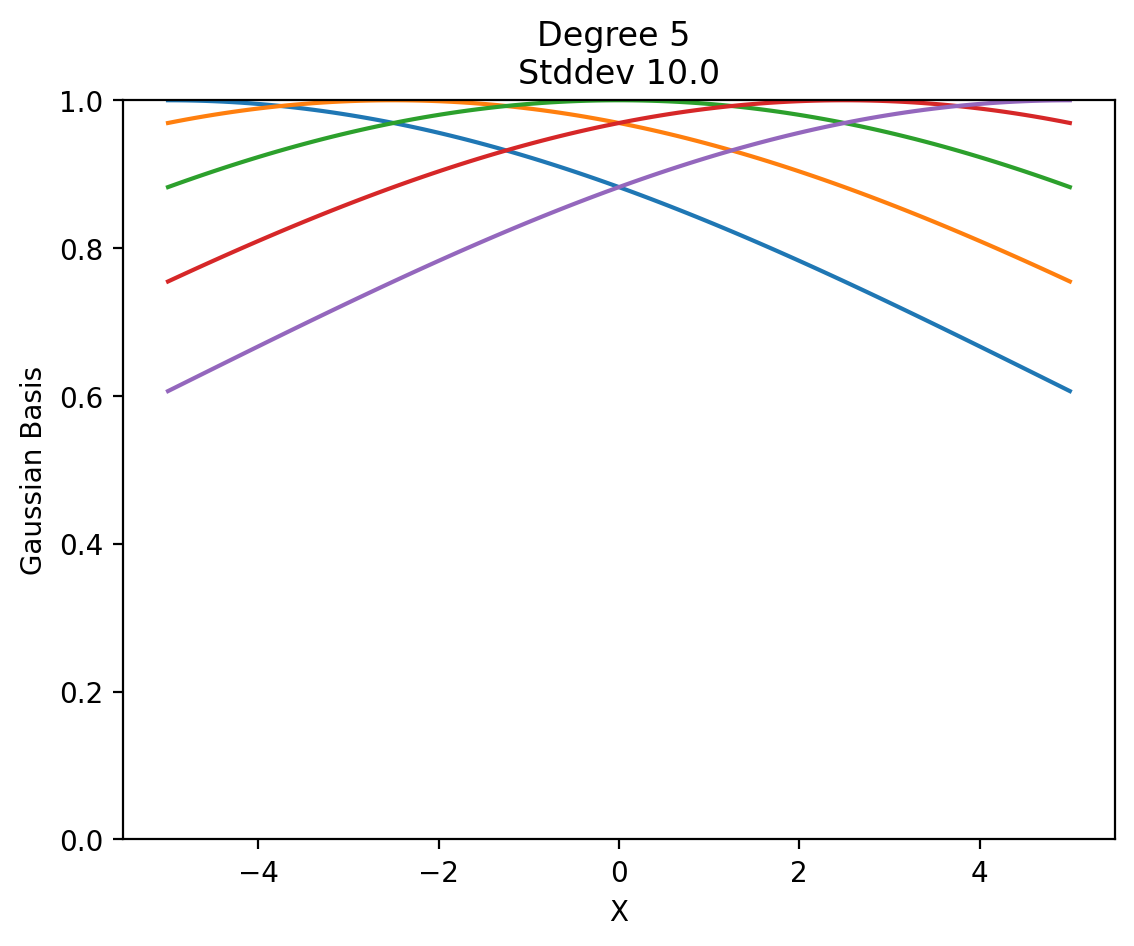

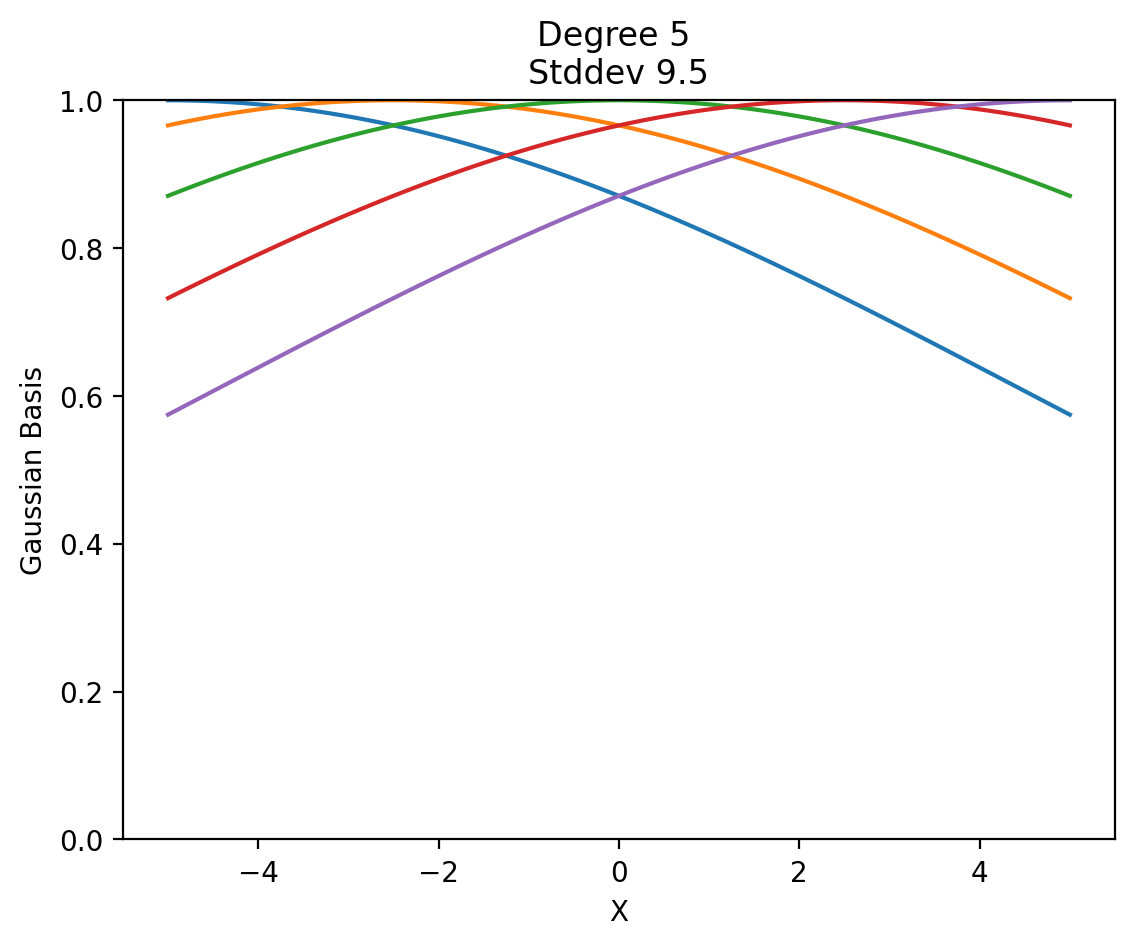

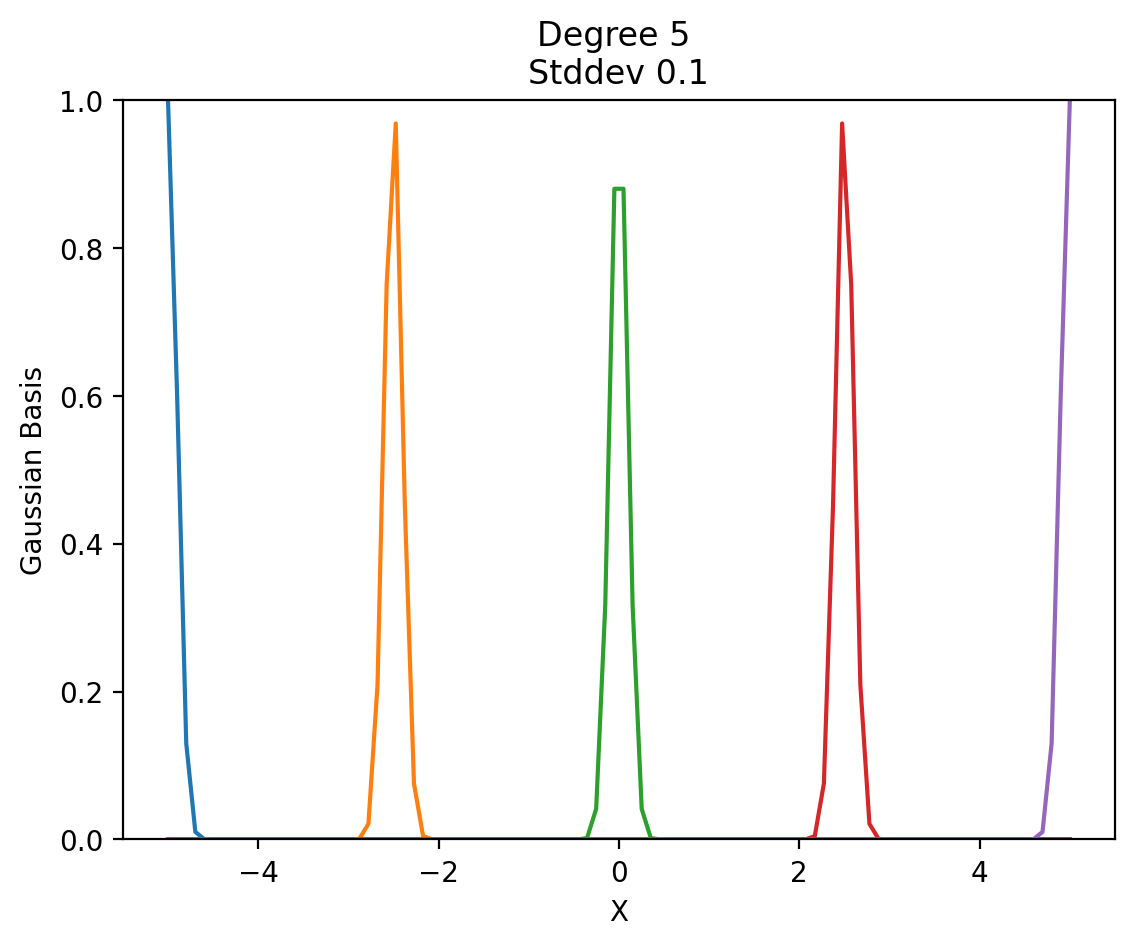

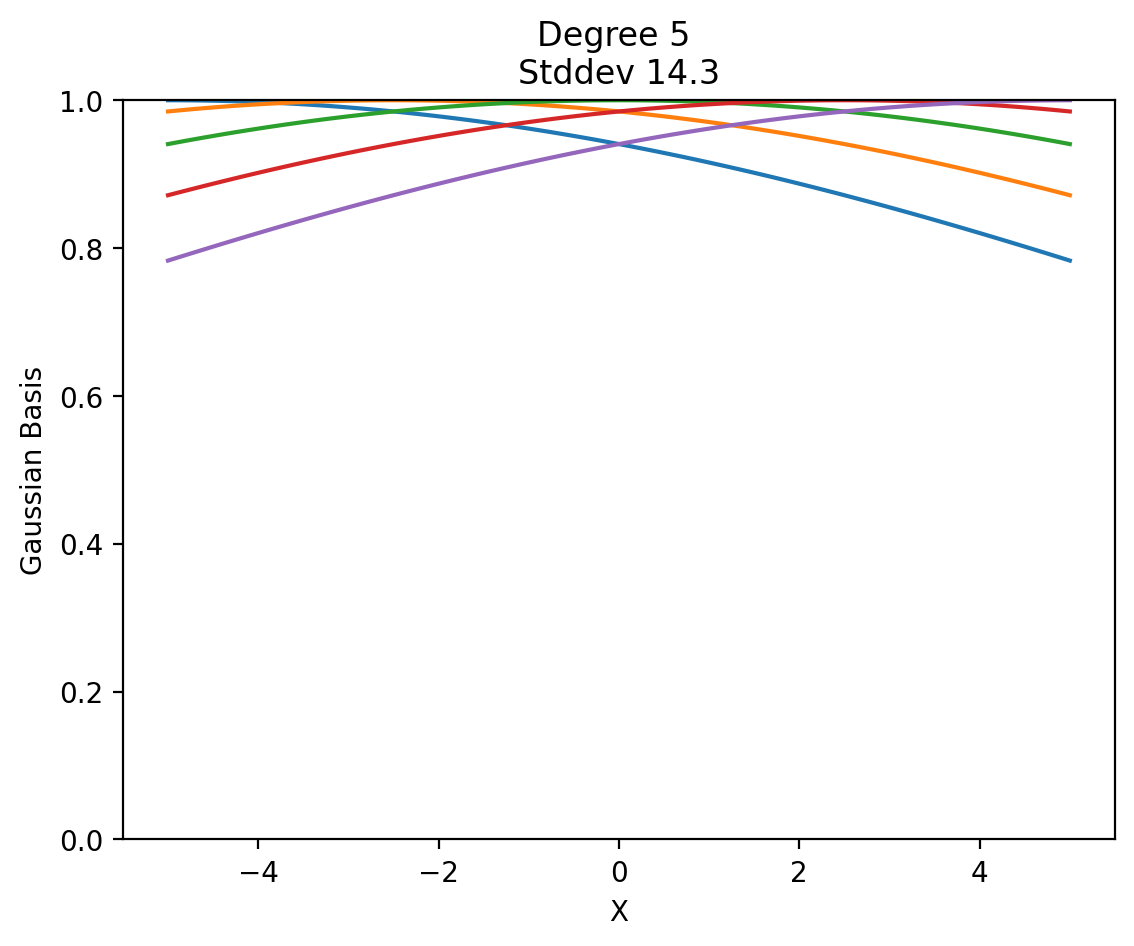

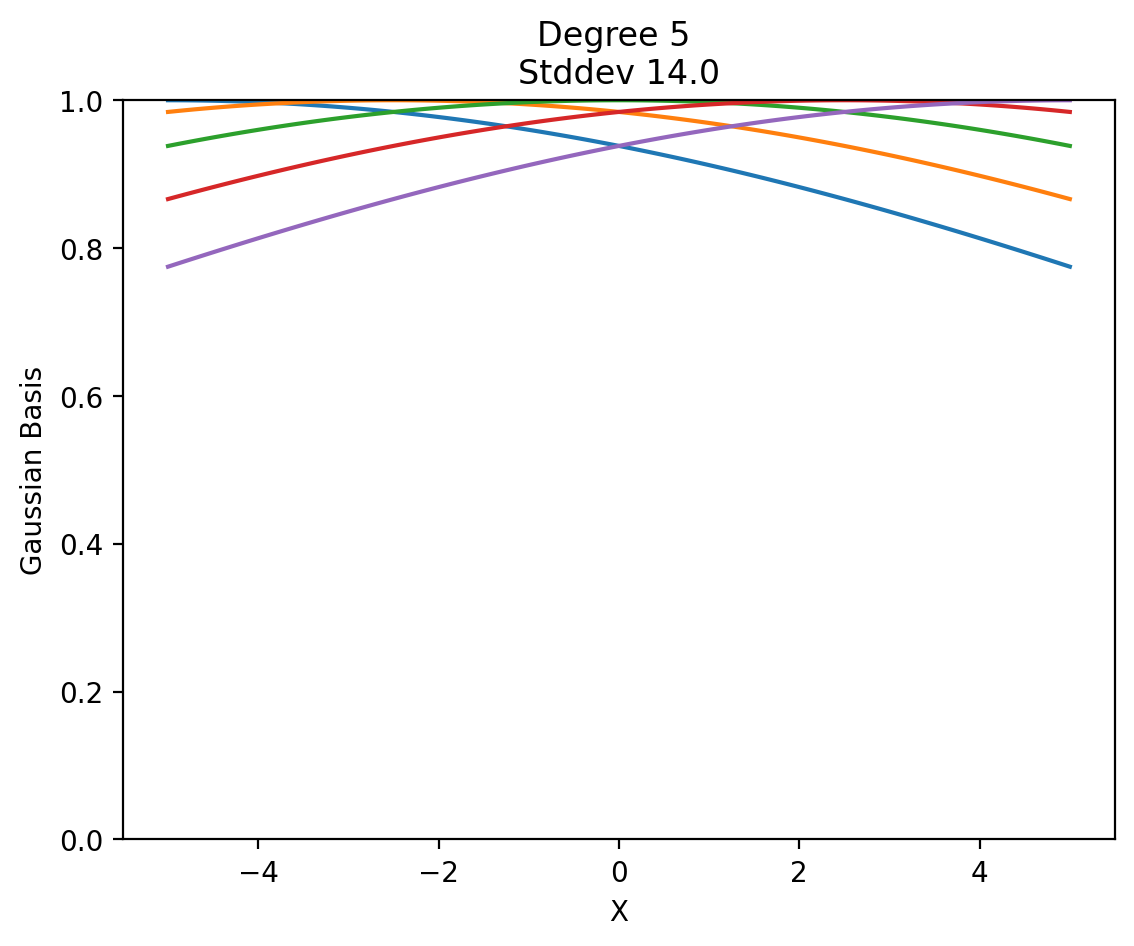

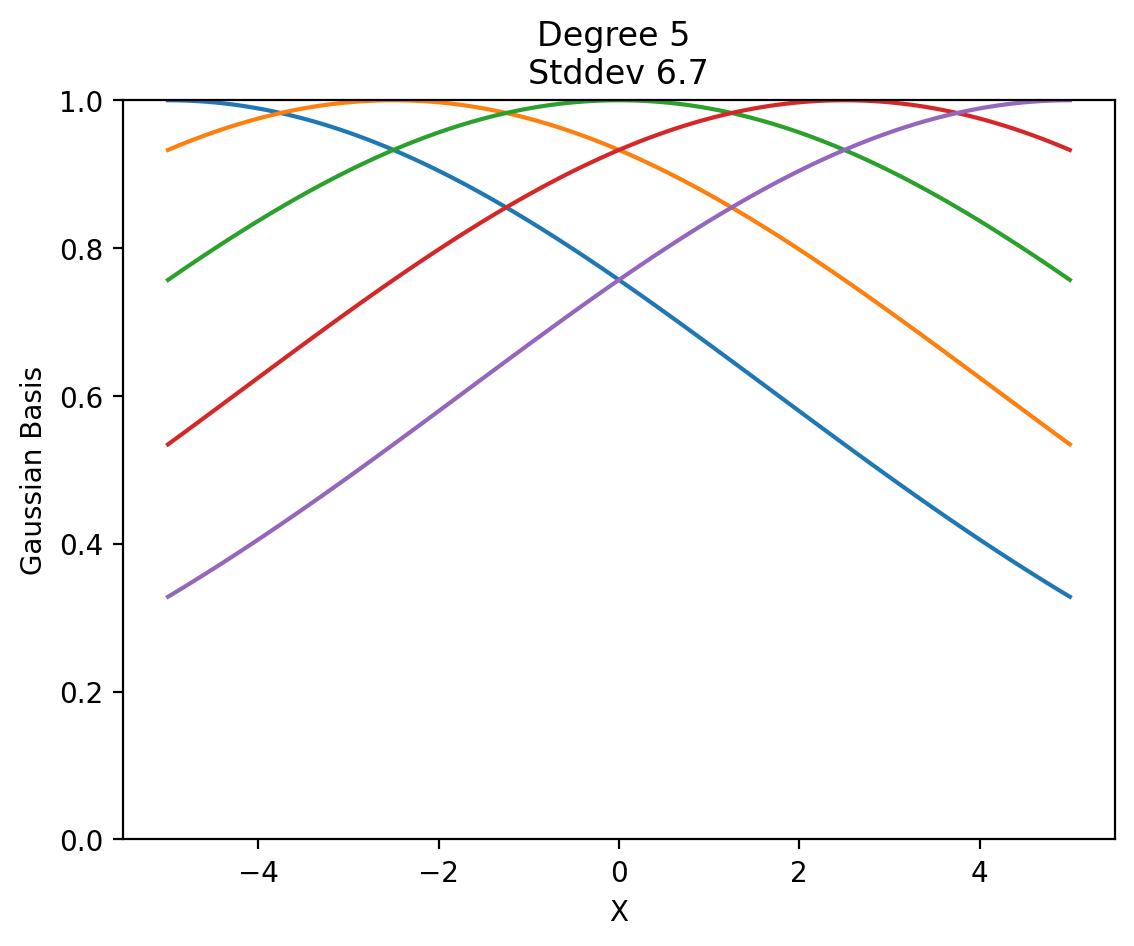

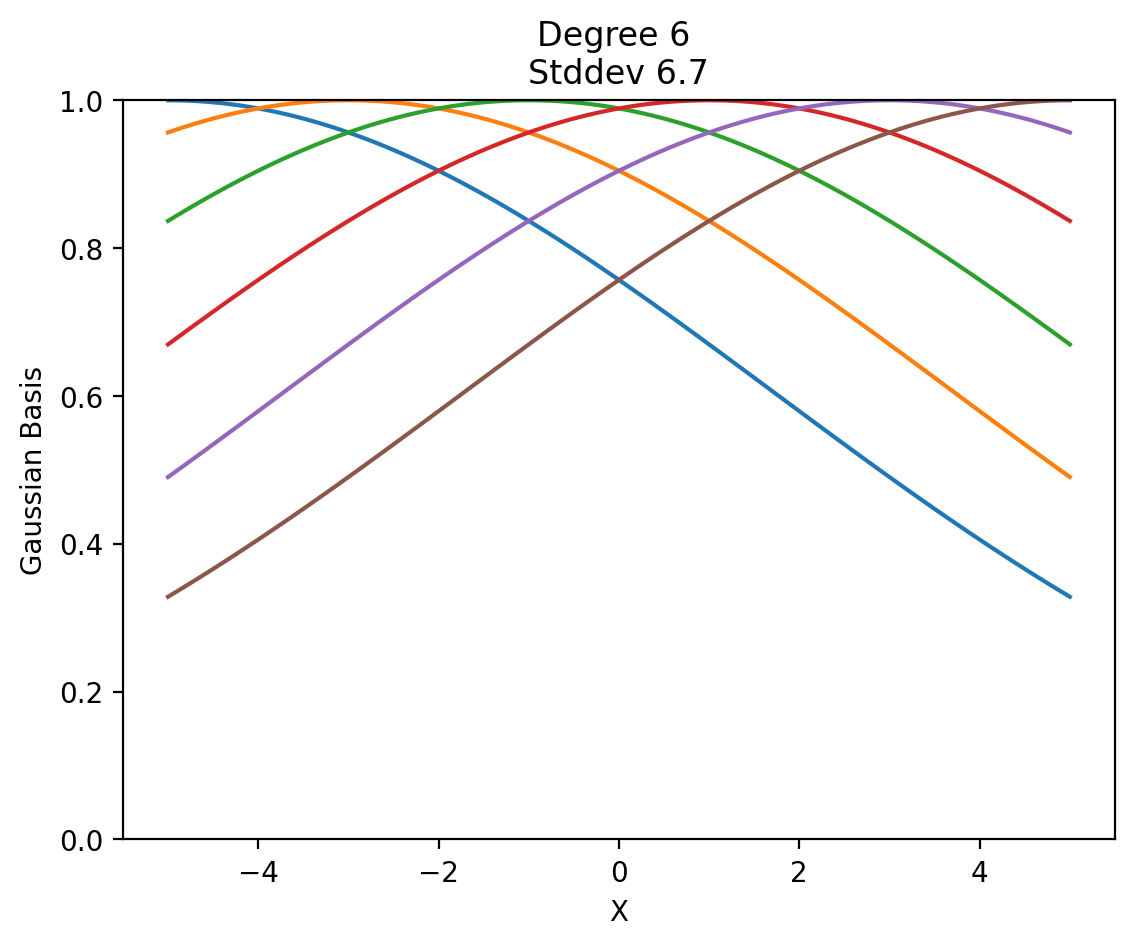

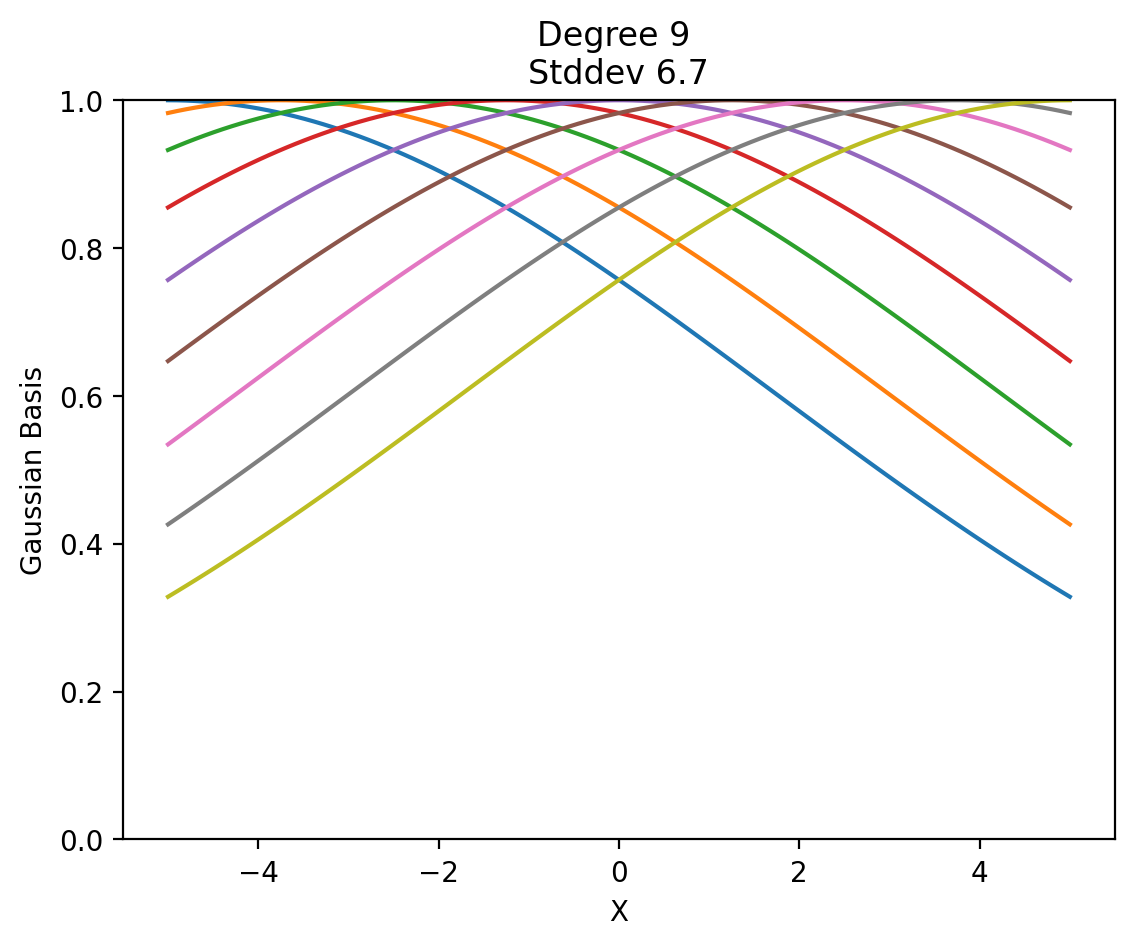

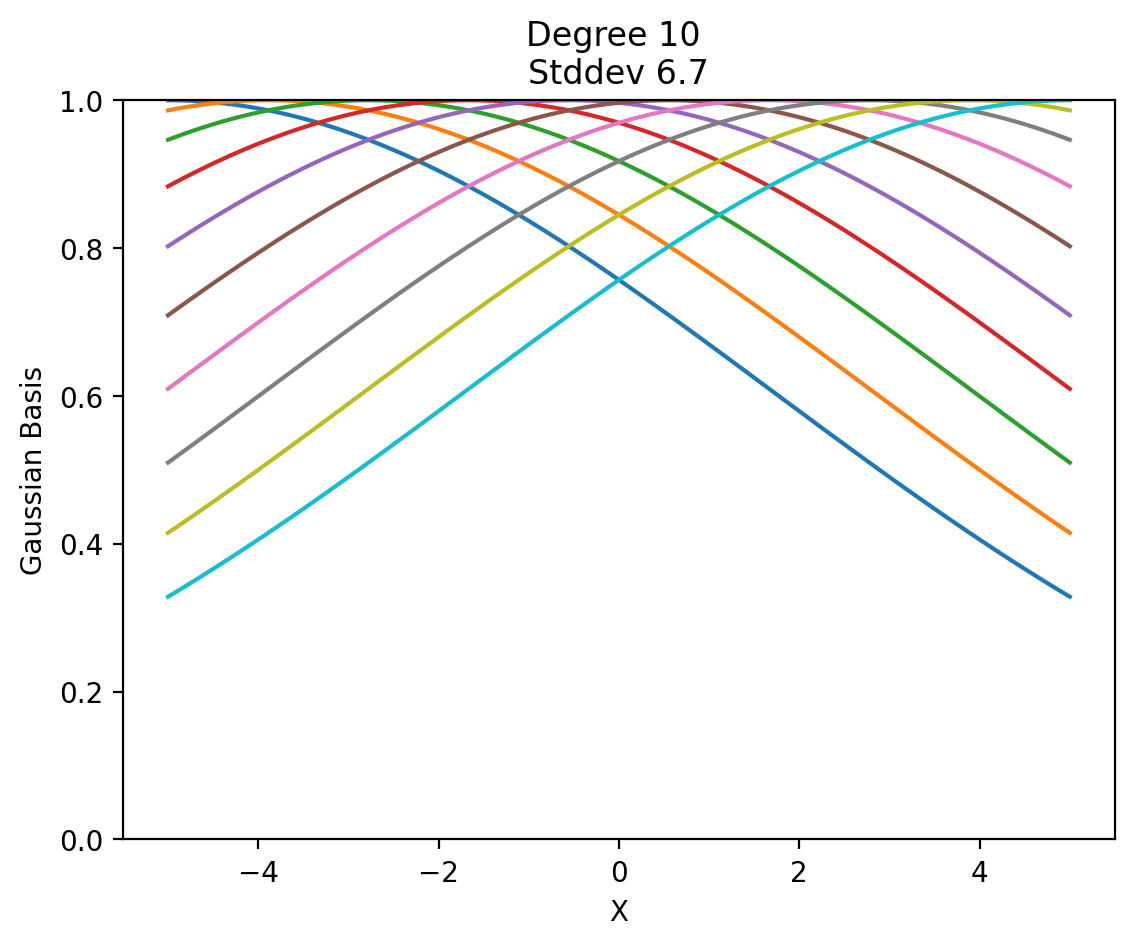

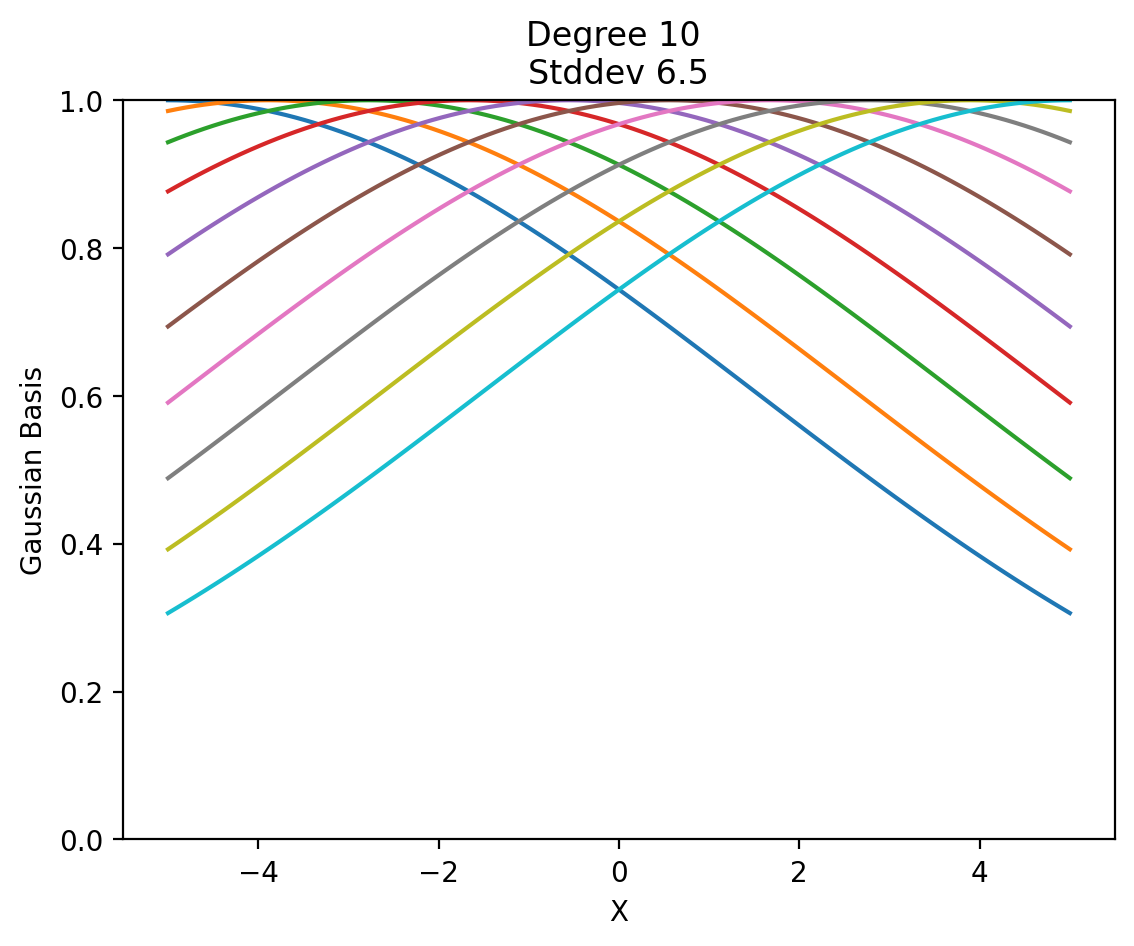

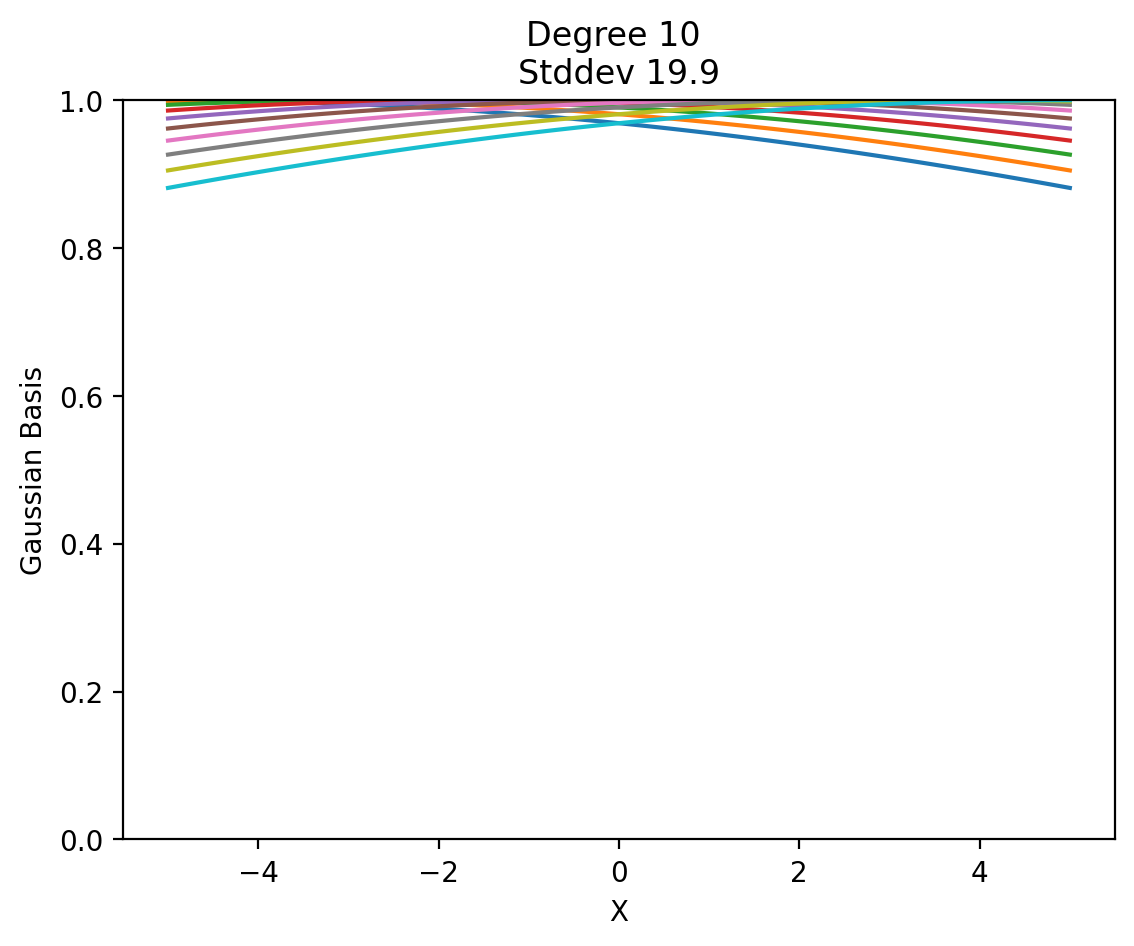

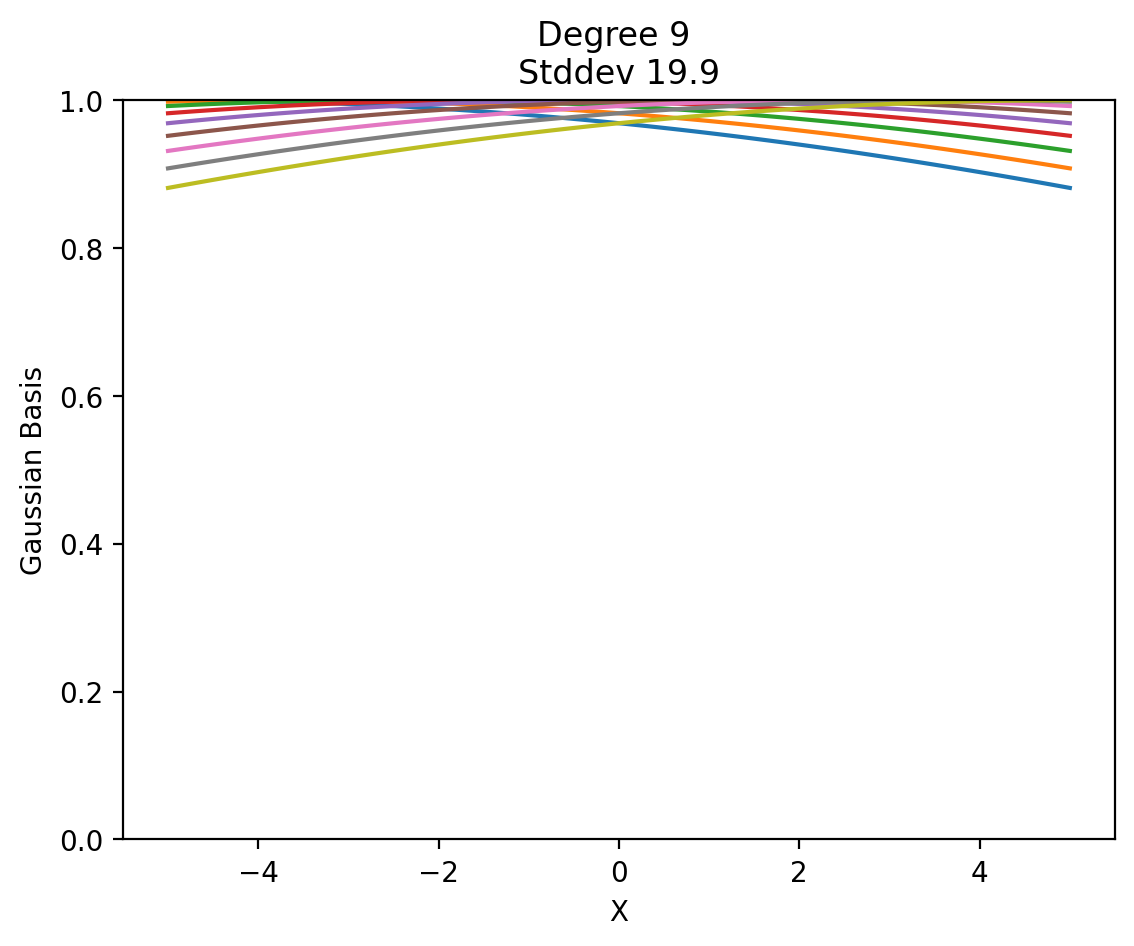

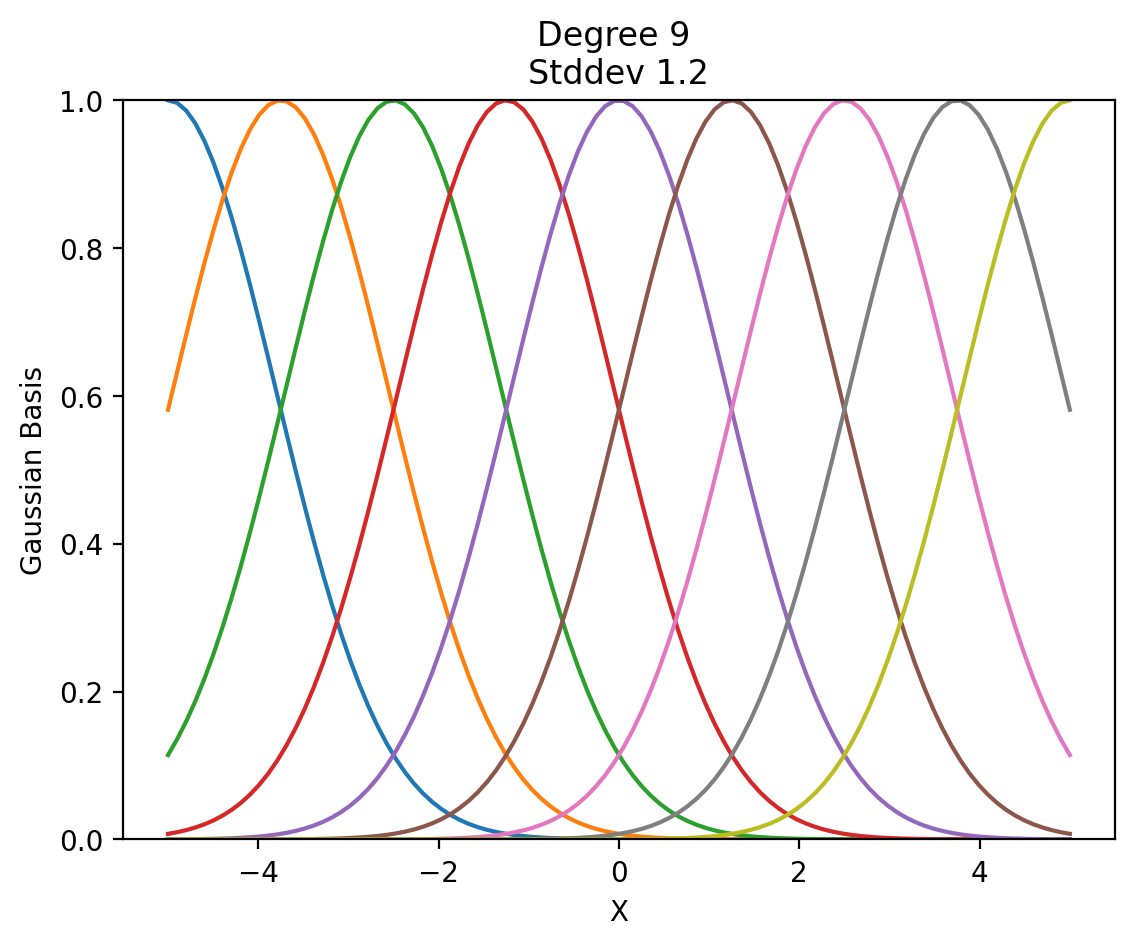

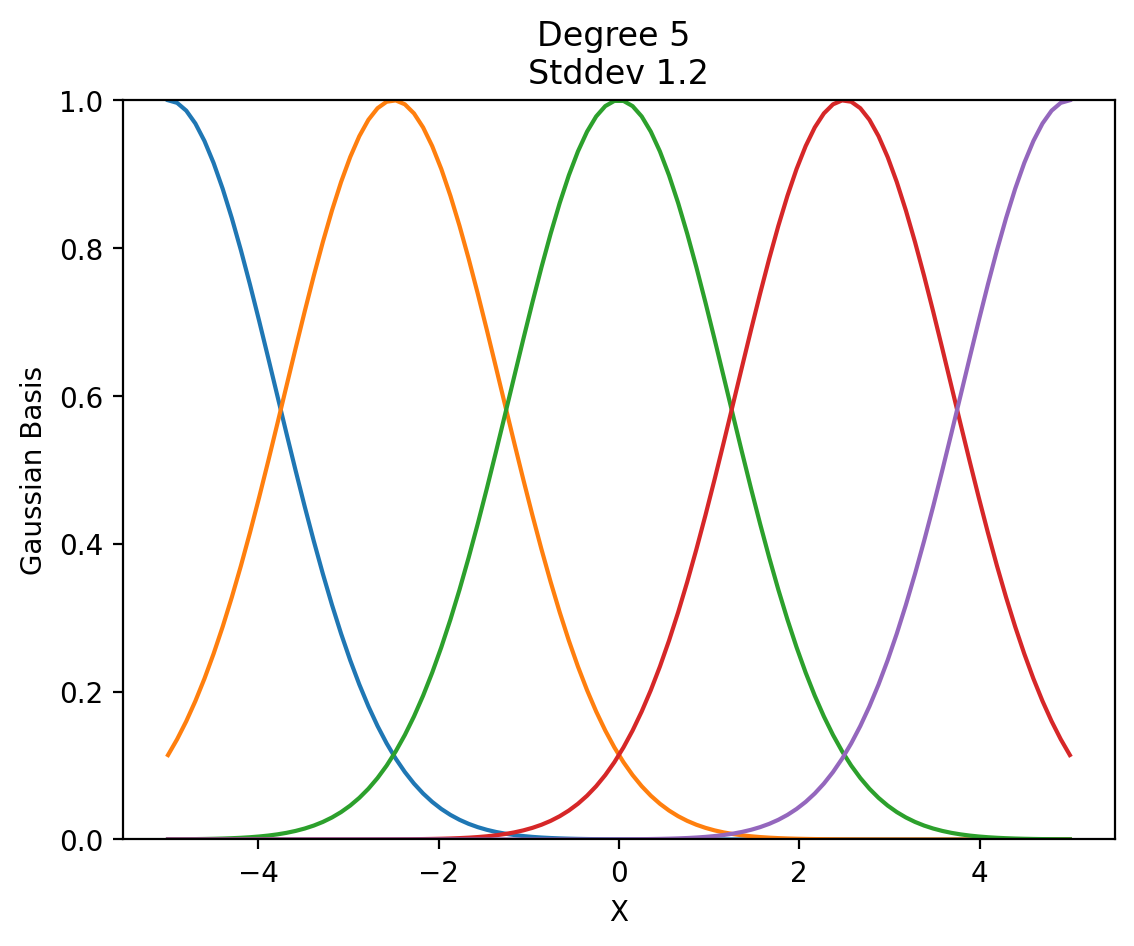

In [ ]:
interact(show_gaussian_basis, d=(1, 10, 1), stdev=(0.1, 20, 0.1))

{'train': 5.323544490376707, 'test': 5.546715312501938}

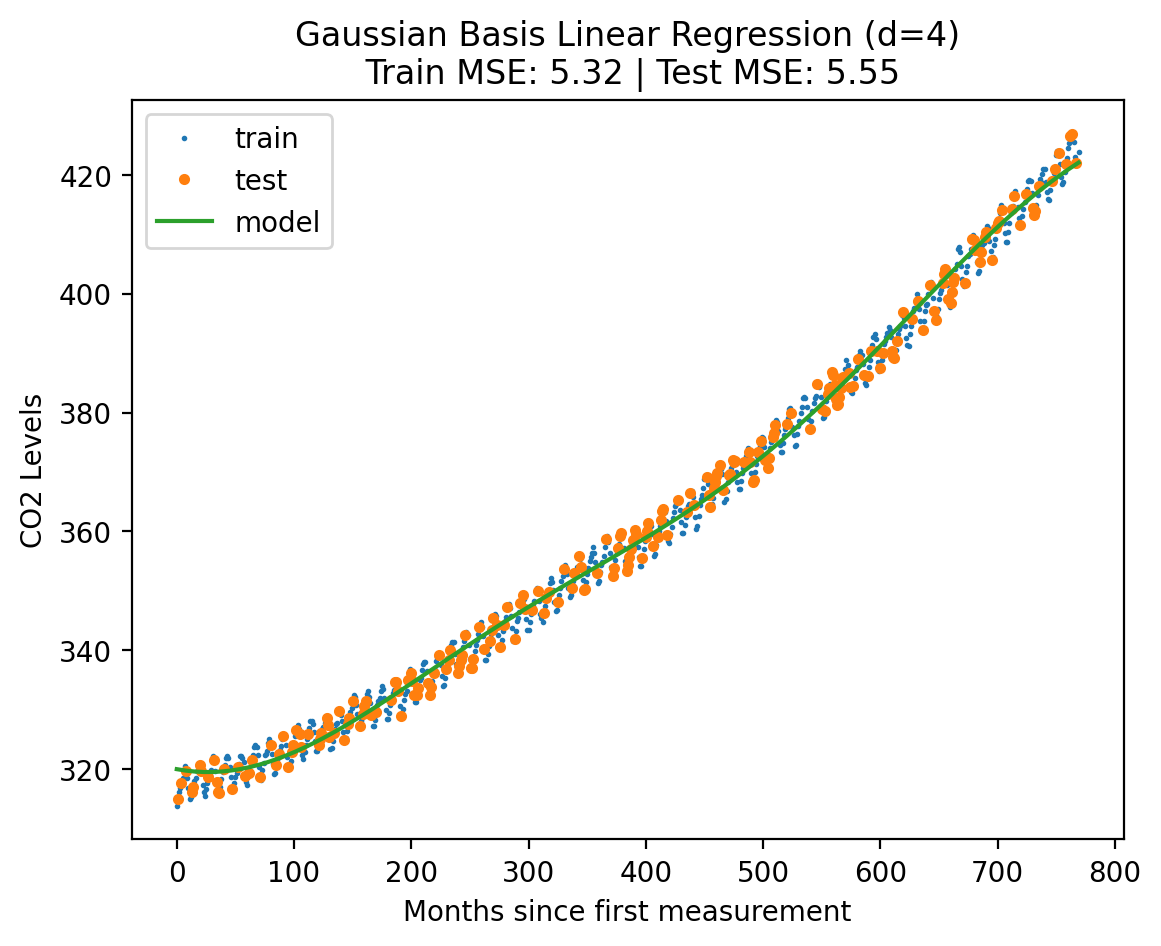

In [ ]:
model_gauss = LinearRegression()
degree = 4
Xf_norm_train = create_guassian_basis(X_norm_train.reshape(-1, 1), degree)
Xf_norm_test = create_guassian_basis(X_norm_test.reshape(-1, 1), degree)

X_lin_poly = create_guassian_basis(X_lin_1d, degree)


plot_fit_predict(model2, Xf_norm_train, y_norm_train, Xf_norm_test, y_norm_test, X_lin_poly, f"Gaussian Basis Linear Regression (d={degree})")

In [ ]:
errors.clear()

In [ ]:
for degree in range(3, 7):
    Xf_norm_train = create_guassian_basis(X_norm_train.reshape(-1, 1), degree)
    Xf_norm_test = create_guassian_basis(X_norm_test.reshape(-1, 1), degree)

    X_lin_poly = create_guassian_basis(X_lin_1d, degree)


    plot_fit_predict(model2, Xf_norm_train, y_norm_train, Xf_norm_test, y_norm_test, X_lin_poly, f"Gaussian Basis Linear Regression (d={degree})", plot=False)

In [ ]:
errors_df = pd.DataFrame(errors).T

<Axes: title={'center': 'MSE for Train and Test Sets'}>

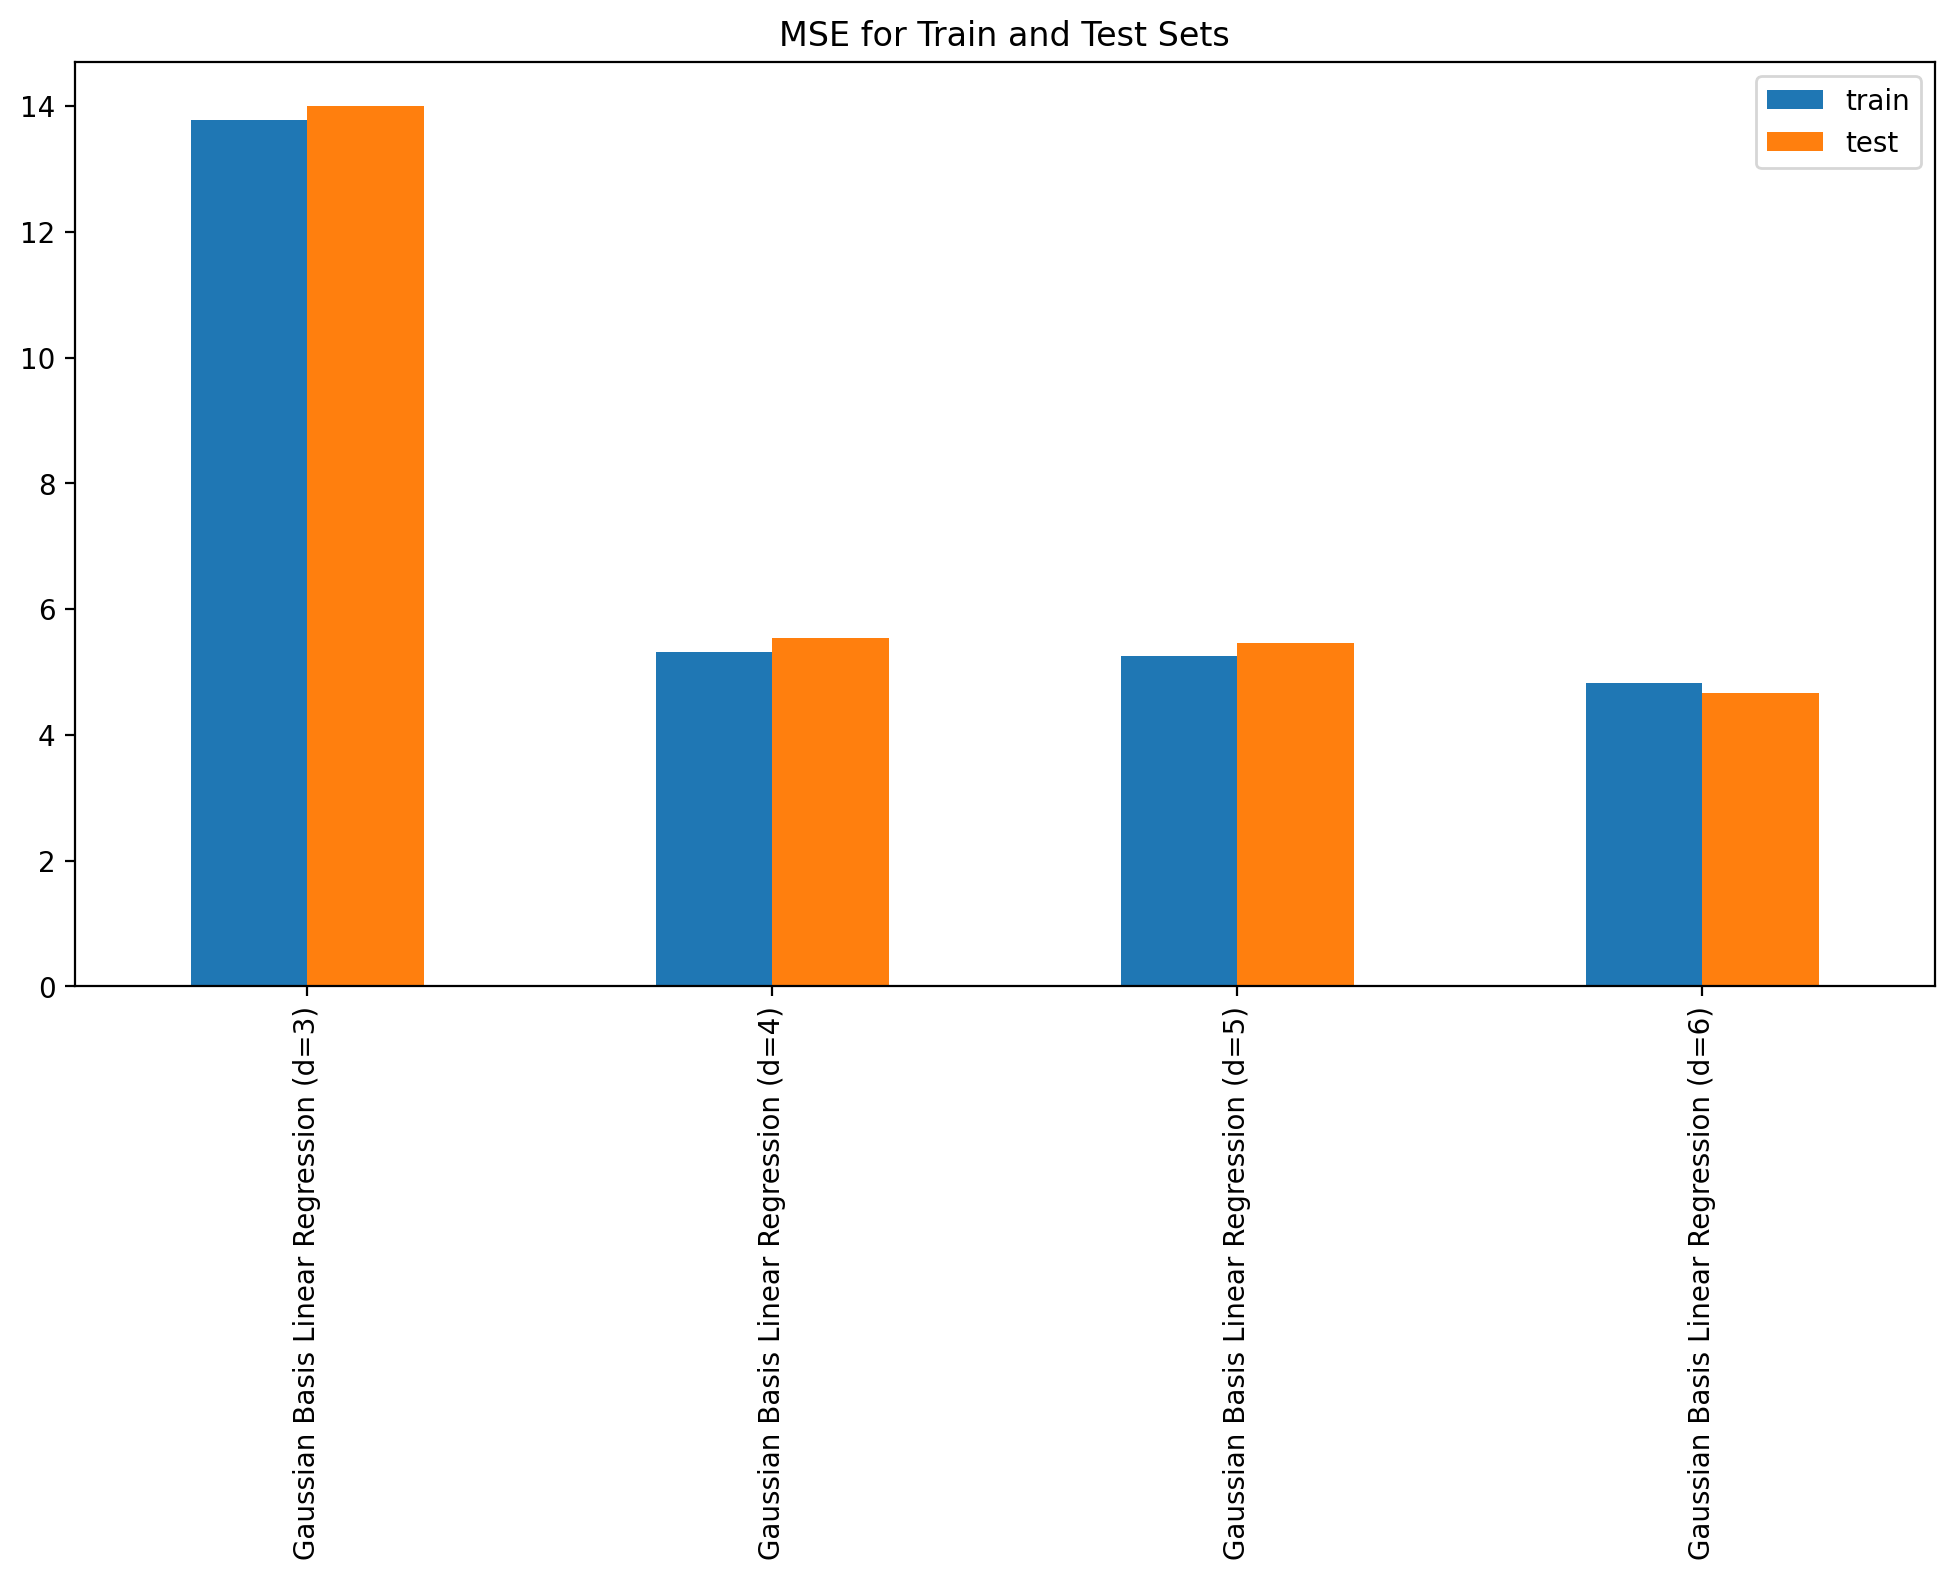

In [ ]:
errors_df.plot(kind='bar', figsize=(12, 6), title='MSE for Train and Test Sets')

In [ ]:
errors.clear()

In [ ]:
# Bias Variance Tradeoff wrt Sigma

num_gaussians = 3
for std in [0.1, 0.5, 1, 2, 5, 10]:
    Xf_norm_train = create_guassian_basis(X_norm_train.reshape(-1, 1), num_gaussians, std)
    Xf_norm_test = create_guassian_basis(X_norm_test.reshape(-1, 1), num_gaussians, std)

    X_lin_poly = create_guassian_basis(X_lin_1d, num_gaussians, std)

    plot_fit_predict(model2, Xf_norm_train, y_norm_train, Xf_norm_test, y_norm_test, X_lin_poly, f"Gaussian Basis Linear Regression (d=3, std={std})", plot=False)

Text(0.5, 1.0, 'Bias Variance Tradeoff wrt Sigma')

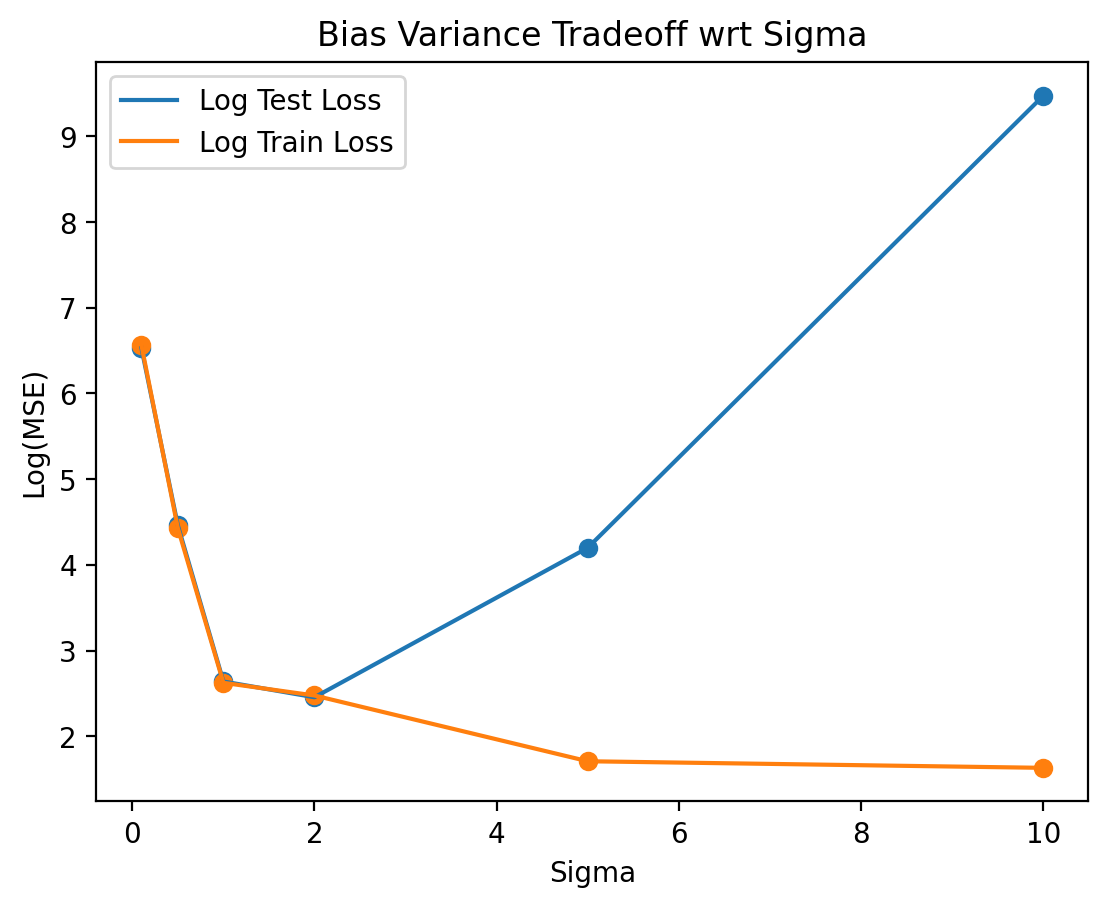

In [ ]:
# Plot the train and test errors for different values of sigma

errors_df = pd.DataFrame(errors).T

test_errors = errors_df.test.values
train_errors = errors_df.train.values

log_test_errors = np.log(test_errors)
log_train_errors = np.log(train_errors)

stds = [0.1, 0.5, 1, 2, 5, 10]

plt.plot(stds , log_test_errors, label='Log Test Loss')
plt.plot(stds , log_train_errors, label='Log Train Loss')
plt.scatter(stds, log_test_errors)
plt.scatter(stds, log_train_errors)
plt.legend()
plt.xlabel('Sigma')
plt.ylabel('Log(MSE)')
plt.title('Bias Variance Tradeoff wrt Sigma')

In [ ]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel

long_term_trend_kernel = 50.0**2 * RBF(length_scale=50.0)

seasonal_kernel = (
    2.0**2
    * RBF(length_scale=100.0)
    * ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds="fixed")
)

irregularities_kernel = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)

noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)

co2_kernel = (
    long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel
)
co2_kernel

50**2 * RBF(length_scale=50) + 2**2 * RBF(length_scale=100) * ExpSineSquared(length_scale=1, periodicity=1) + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01)

In [ ]:
# Using GP for the interpolation problem

from sklearn.gaussian_process import GaussianProcessRegressor

def plot_fit_gp(X_norm_train, y_norm_train, X_norm_test, y_norm_test, X_lin, title, plot=True):

    gaussian_process = GaussianProcessRegressor(
        kernel=co2_kernel,n_restarts_optimizer=9
    )

    gaussian_process.fit(X_norm_train, y_norm_train)

    y_hat_train, std_prediction_train = gaussian_process.predict(X_norm_train, return_std=True)
    y_hat_test , std_prediction_test = gaussian_process.predict(X_norm_test, return_std=True)

    y_hat_train = y_hat_train.reshape(-1, 1)
    y_hat_test = y_hat_test.reshape(-1, 1)

    # Transform back to original scale
    y_hat_train = s2.inverse_transform(y_hat_train)
    y_hat_test = s2.inverse_transform(y_hat_test)

    y_hat_lin , std_prediction_lin = gaussian_process.predict(X_lin , return_std=True)
    y_hat_lin = y_hat_lin.reshape(-1, 1)
    y_hat_lin = s2.inverse_transform(y_hat_lin)

    errors[title] = {"train": mean_squared_error(y_train, y_hat_train),
                     "test": mean_squared_error(y_test, y_hat_test)}

    if plot:
        plt.plot(X_train, y_train, 'o', label='train',markersize=1)
        plt.plot(X_test, y_test, 'o', label='test', ms=3)
        plt.plot(s1.inverse_transform(X_lin_1d), y_hat_lin, label='model')
        plt.fill_between(s1.inverse_transform(X_lin_1d).reshape(-1),
                         (y_hat_lin - 1.96*std_prediction_lin.reshape(-1,1)).reshape(-1),
                         (y_hat_lin + 1.96*std_prediction_lin.reshape(-1,1)).reshape(-1), alpha=0.5 , label='95% Confidence interval')
        plt.xlabel('Months since first measurement')
        plt.ylabel('CO2 Levels')
        plt.legend()

        plt.title('{}\n Train MSE: {:.2f} | Test MSE: {:.2f}'.format(title, errors[title]["train"], errors[title]["test"]))

    return errors[title]

[ 1.98685661 -0.5530572   2.59075415]


Text(0.5, 1.0, 'Fourier Featurization of X manually')

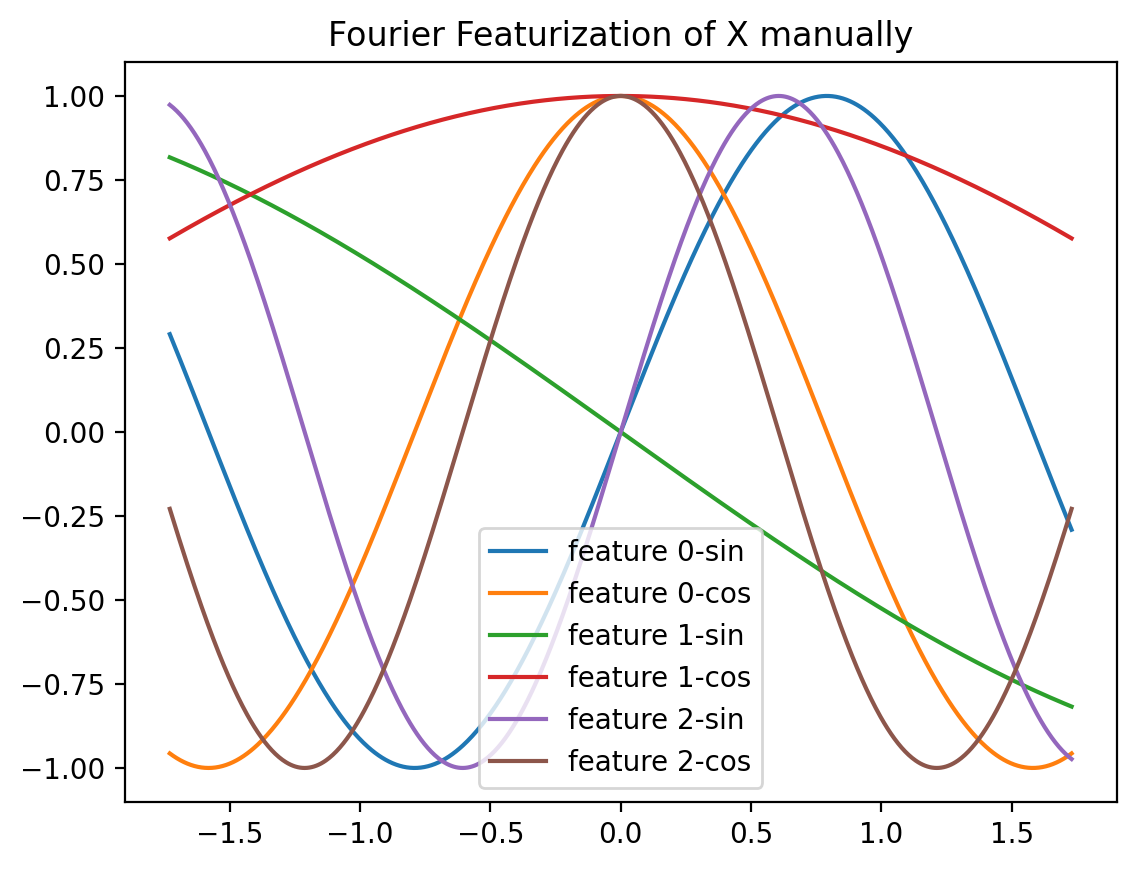

In [ ]:
np.random.seed(42)
sigma = 4
NUM_features = 3
fs = sigma*np.random.randn(NUM_features)
print(fs)

for i in range(NUM_features):
    plt.plot(X_norm, np.sin(fs[i]*X_norm), label=f'feature {i}-sin')
    plt.plot(X_norm, np.cos(fs[i]*X_norm), label=f'feature {i}-cos')
plt.legend()
plt.title('Fourier Featurization of X manually')

In [ ]:
# Explicit implementation of RFF

def create_random_features(X, gamma, NUM_features):
    """
    X is (N, 1) array
    gamma is a scalar
    NUM_features is a scalar
    """

    X_rff = np.zeros((len(X), 2*NUM_features + 1))
    X_rff[:, 0] = X[:, 0]
    for i in range(NUM_features):
        b = np.random.randn()
        X_rff[:, i+1] = np.sin(2*np.pi*gamma*b*X[:, 0])
        X_rff[:, i + NUM_features+1] = np.cos(2*np.pi*gamma*b*X[:, 0])

    # Normalize each column
    X_rff = StandardScaler().fit_transform(X_rff)
    return X_rff

In [ ]:
# Sklearn's implementation of RFF

from sklearn.kernel_approximation import RBFSampler

Text(0.5, 1.0, 'Fourier Featurization using RBFSampler (sklearn)')

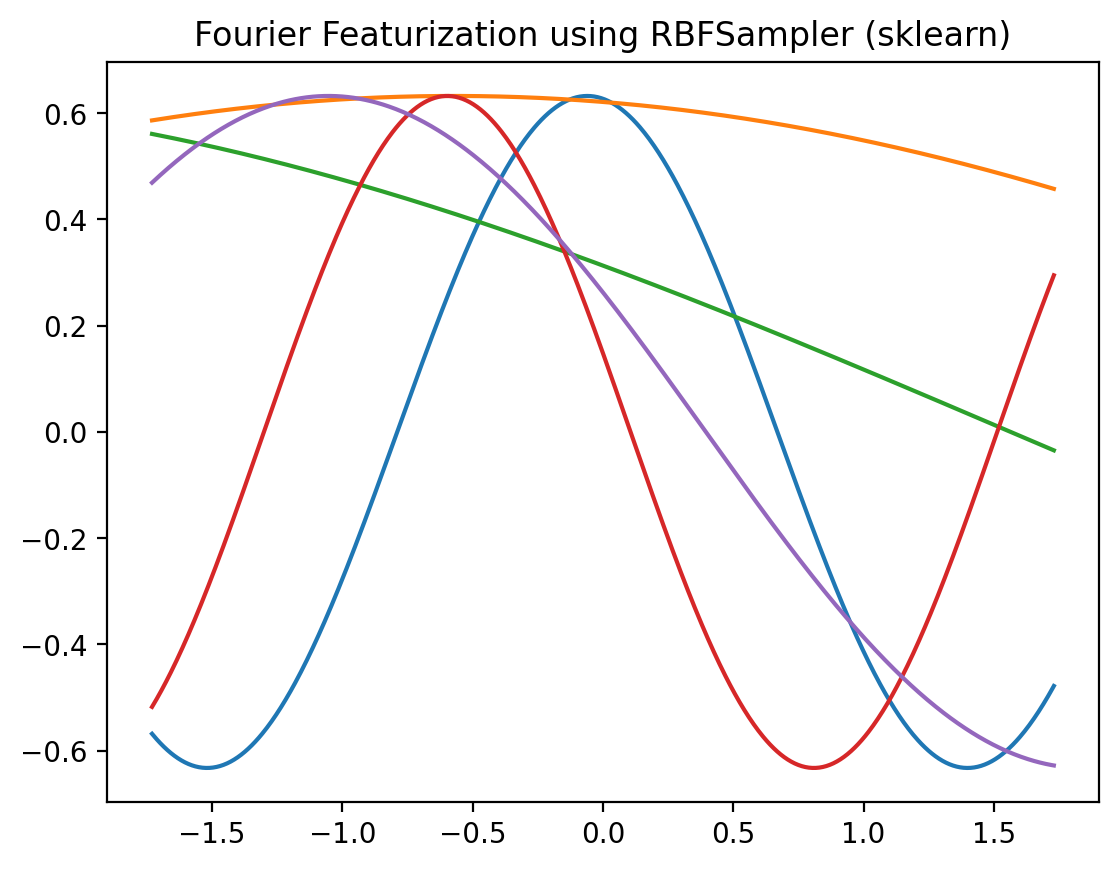

In [ ]:
r= RBFSampler(n_components=5)
plt.plot(X_norm, r.fit_transform(X_norm.reshape(-1,1)))
plt.title('Fourier Featurization using RBFSampler (sklearn)')

Text(0.5, 1.0, 'Fourier Featurization using RBFSampler (sklearn)')

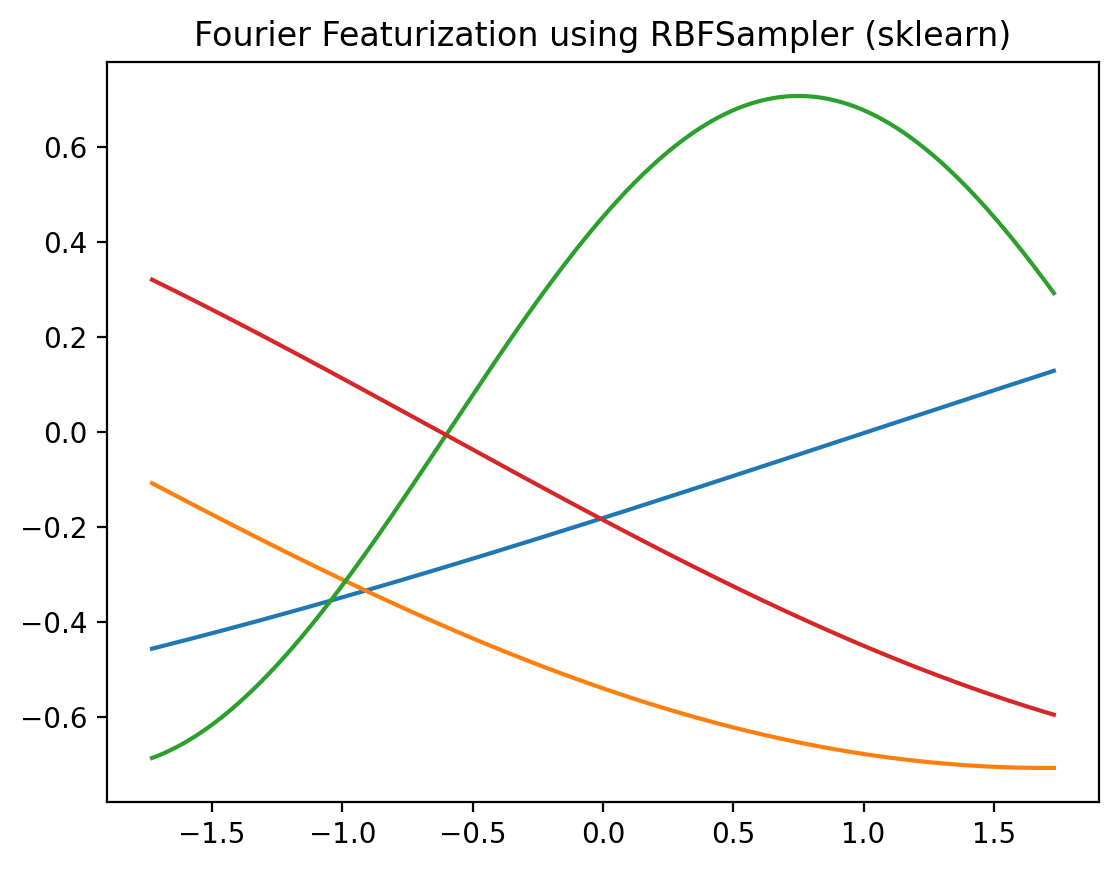

In [ ]:
r = RBFSampler(n_components=4, gamma=0.1)
plt.plot(X_norm, r.fit_transform(X_norm.reshape(-1,1)))
plt.title('Fourier Featurization using RBFSampler (sklearn)')

Text(0.5, 1.0, 'Fourier Featurization using RBFSampler (sklearn)')

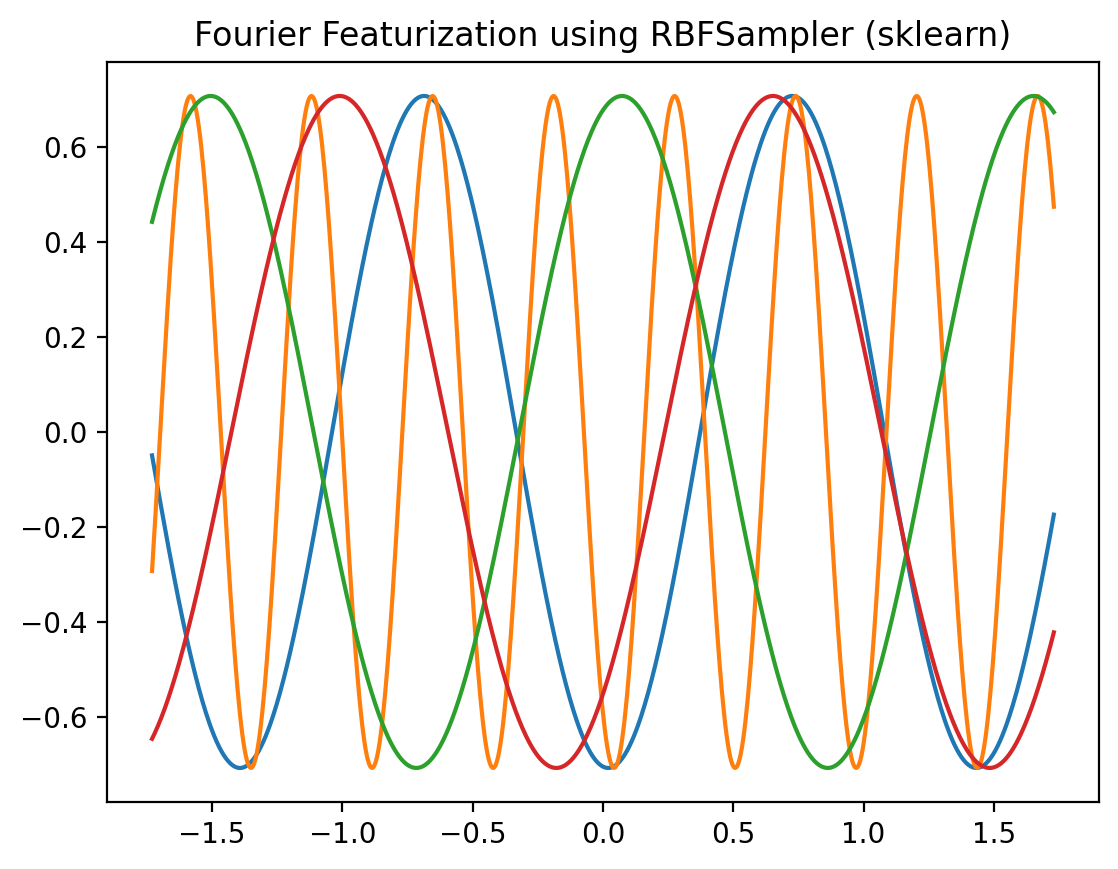

In [ ]:
r = RBFSampler(n_components=4, gamma=20)
plt.plot(X_norm, r.fit_transform(X_norm.reshape(-1,1)))
plt.title('Fourier Featurization using RBFSampler (sklearn)')

In [ ]:
# Implicit implementation of RFF using sklearn

def create_rff(X, gamma, NUM_features):
    # Random Fourier Features
    # https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.RBFSampler.html
    rbf_feature = RBFSampler(gamma=gamma, n_components=NUM_features, random_state=1)
    X_features = rbf_feature.fit_transform(X)
    return X_features

{'train': 4.658663782788618, 'test': 4.634500478822817}

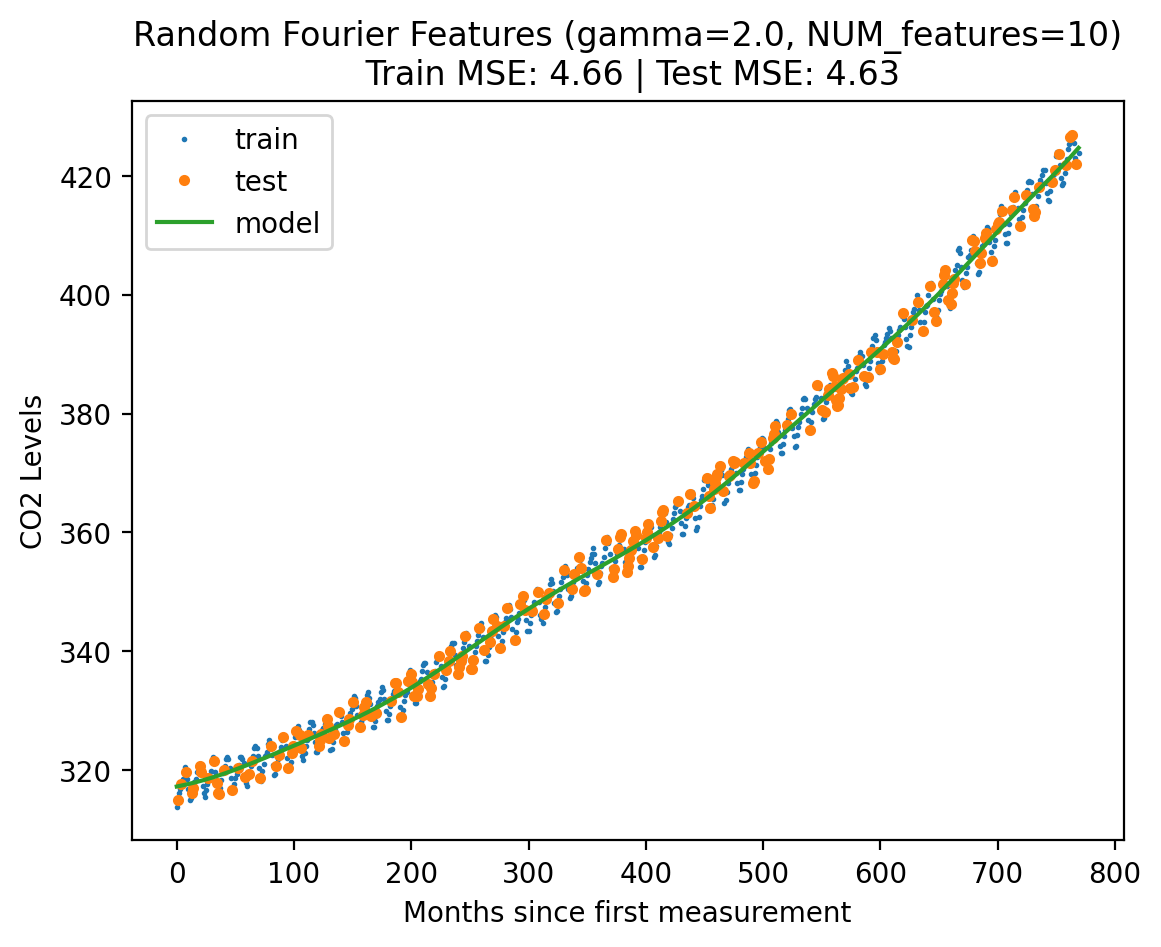

In [ ]:
model3 = LinearRegression()
gamma = 2.0
NUM_features = 10

Xf_norm_train = create_rff(X_norm_train.reshape(-1, 1), gamma, NUM_features)
Xf_norm_test = create_rff(X_norm_test.reshape(-1, 1), gamma, NUM_features)

X_lin_rff = create_rff(X_lin_1d, gamma, NUM_features)

plot_fit_predict(model3, Xf_norm_train, y_norm_train, Xf_norm_test, y_norm_test, X_lin_rff, f"Random Fourier Features (gamma={gamma}, NUM_features={NUM_features})")

In [ ]:
model4 = LinearRegression()

# NUM_features_values = [1, 2, 3, 4, 5, 10, 20, 50, 100]
gamma_values = [0.01, 0.1, 1, 2, 5, 10]

errors_rff = {}

for gamma in gamma_values:
    # gamma = 2.0
    NUM_features_ = 100
    Xf_norm_train = create_rff(X_norm_train.reshape(-1, 1), gamma, NUM_features_)
    Xf_norm_test = create_rff(X_norm_test.reshape(-1, 1), gamma, NUM_features_)

    X_lin_rff = create_rff(X_lin_1d, gamma, NUM_features_)

    plot_fit_predict(model4, Xf_norm_train, y_norm_train, Xf_norm_test, y_norm_test, X_lin_rff, gamma, plot=False)

    errors_rff[gamma] = errors[gamma]

<Axes: >

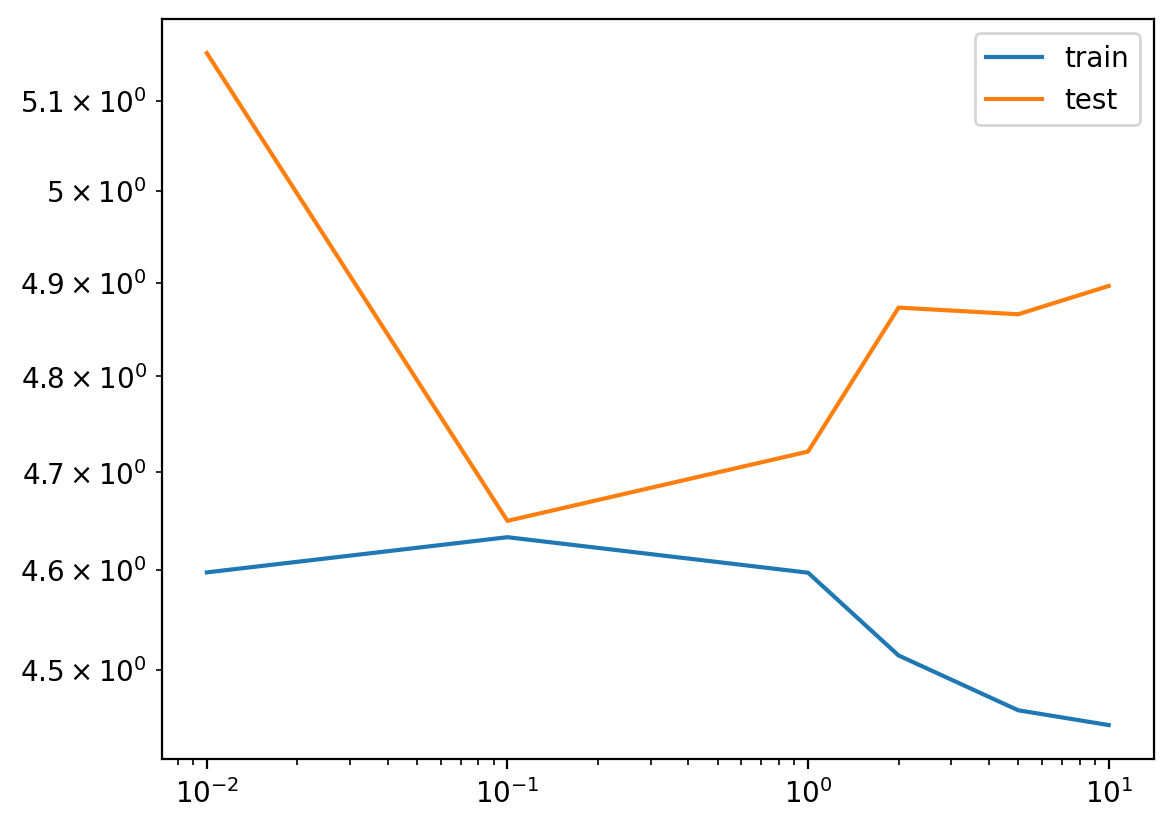

In [ ]:
pd.DataFrame(errors_rff).T.plot(logy=True, logx=True)

In [ ]:
X_norm_train = X_norm[:int(len(X_norm)*0.7)]
X_norm_test = X_norm[int(len(X_norm)*0.7):]

y_norm_train = y_norm[:int(len(y_norm)*0.7)]
y_norm_test = y_norm[int(len(y_norm)*0.7):]

X_train = X[:int(len(X)*0.7)]
X_test = X[int(len(X)*0.7):]

y_train = y[:int(len(y)*0.7)]
y_test = y[int(len(y)*0.7):]

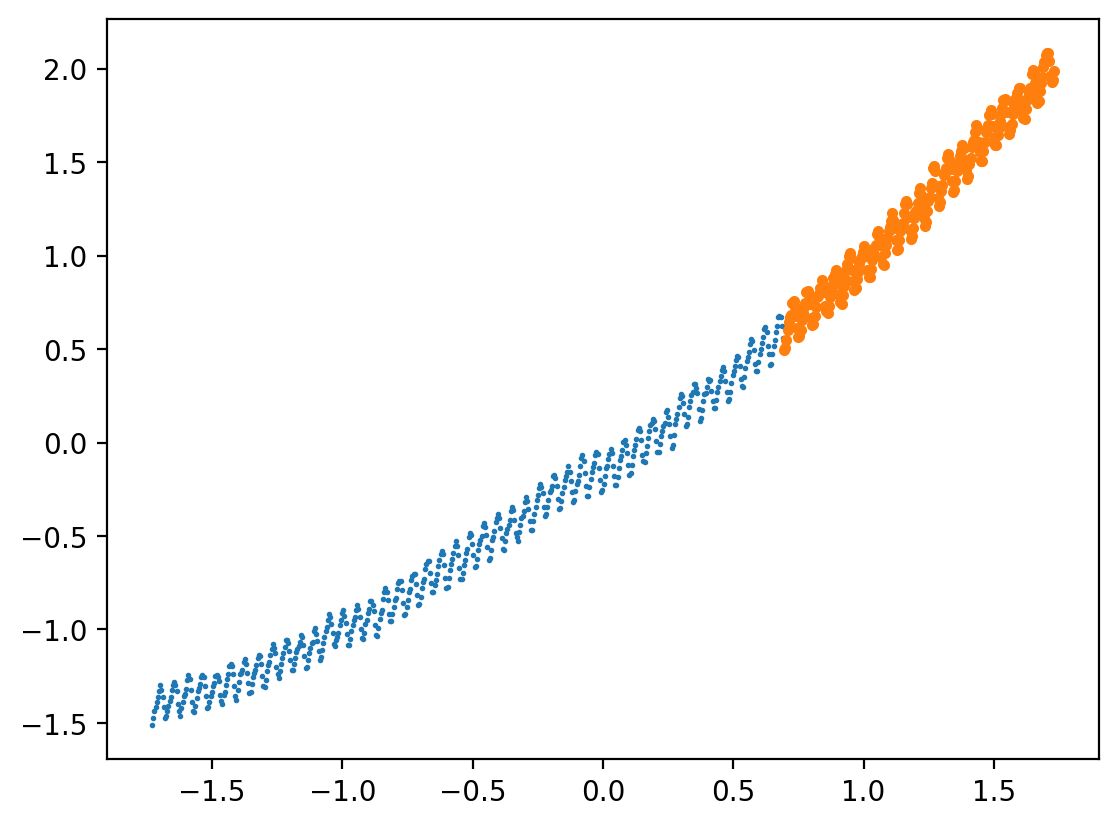

In [ ]:
plt.plot(X_norm_train, y_norm_train, 'o', label='train',markersize=1)
plt.plot(X_norm_test, y_norm_test, 'o', label='test', ms=3)

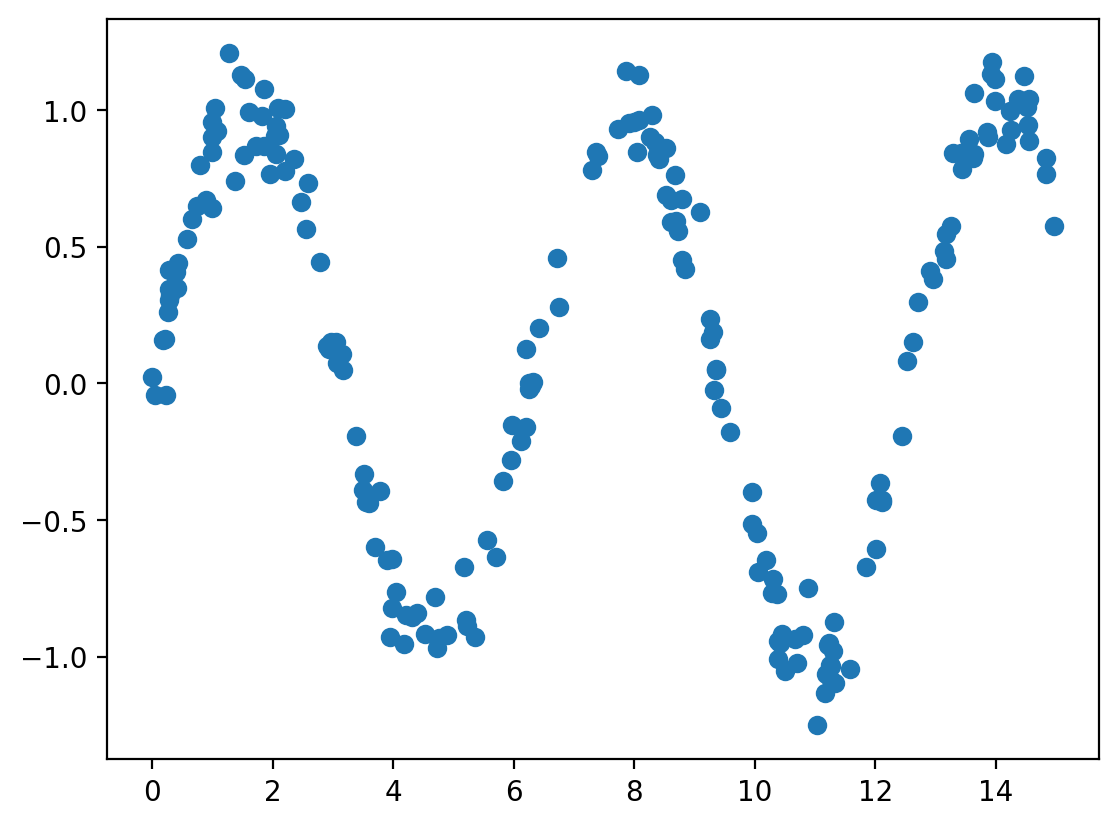

In [ ]:
# Generate some data
rng = np.random.RandomState(1)
x = 15 * rng.rand(200)
y = np.sin(x) + 0.1 * rng.randn(200)
df = pd.DataFrame({'x': x, 'y': y})

# plot the data
plt.scatter(df.x, df.y)
plt.show()

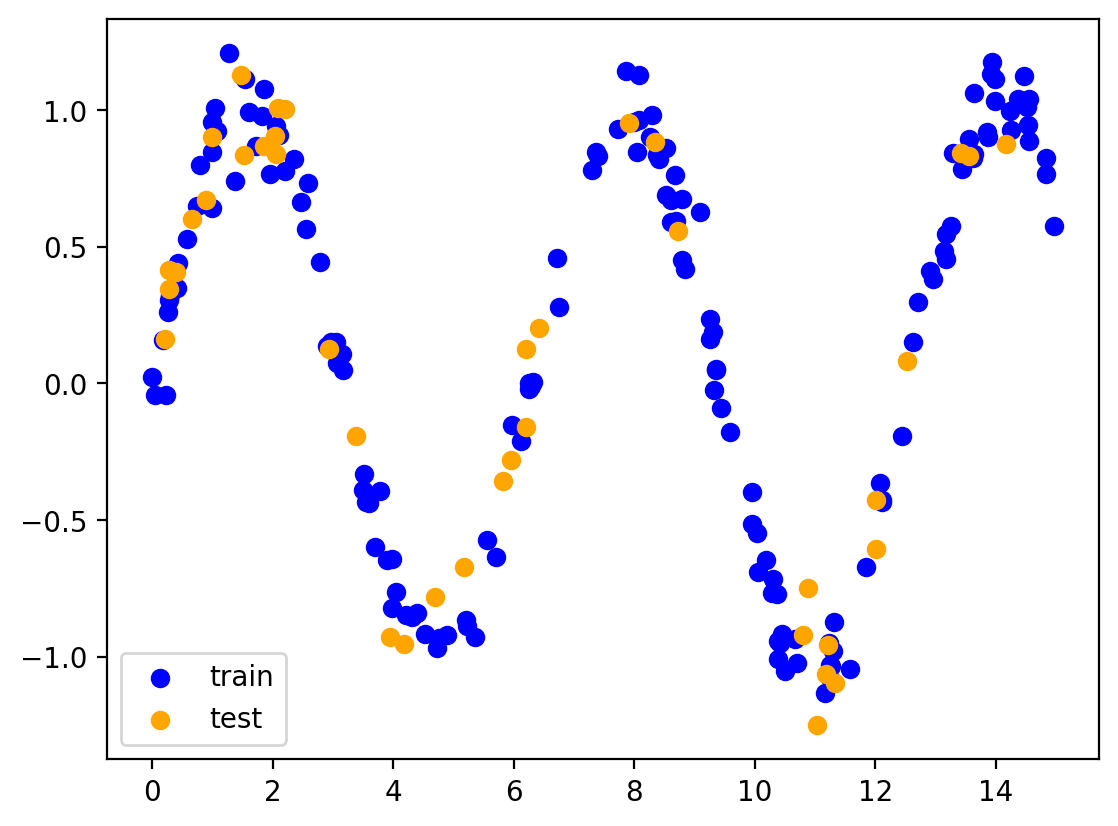

In [ ]:
# Train test split
train = df.sample(frac=0.8, random_state=1)
test = df.drop(train.index)

plt.scatter(train.x, train.y, color='blue', label='train')
plt.scatter(test.x, test.y, color='orange', label='test')
plt.legend()
plt.show()

In [ ]:
def plot_predictions(train, test, yhat_train, yhat_test):

    # add yhat_train to train and yhat_test to test
    train['yhat'] = yhat_train
    test['yhat'] = yhat_test

    # sort train and test by x
    train = train.sort_values(by='x')
    test = test.sort_values(by='x')

    # Train and test error
    train_rmse = np.sqrt(np.mean((train.yhat - train.y)**2))
    test_rmse = np.sqrt(np.mean((test.yhat - test.y)**2))

    plt.scatter(train.x, train.y, color='blue', label='train')
    plt.scatter(test.x, test.y, color='orange', label='test')
    plt.plot(train.x, train.yhat, color='red', label='train prediction')
    plt.plot(test.x, test.yhat, color='green', label='test prediction')
    plt.title('Train RMSE: {:.3f}, Test RMSE: {:.3f}'.format(train_rmse, test_rmse))
    plt.legend()
    plt.show()

    return train_rmse, test_rmse

In [ ]:
# Hyperparameter tuning using grid search and showing bias variance tradeoff
def hyperparameter_tuning(params, train, test, model):
    train_rmse = []
    test_rmse = []

    for d in params:
        yhat_train, yhat_test = model(d, train, test)
        train_rmse.append(np.sqrt(np.mean((yhat_train - train.y)**2)))
        test_rmse.append(np.sqrt(np.mean((yhat_test - test.y)**2)))

    plt.plot(params, train_rmse, label='train')
    plt.plot(params, test_rmse, label='test')
    plt.xlabel('params')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

    optimal_param = params[np.argmin(test_rmse)]

    return optimal_param

In [ ]:
rmse_dict = {}

In [ ]:
# use sk-learn for MLP
mlp_model = MLPRegressor(hidden_layer_sizes=[128, 256, 512, 256, 128], max_iter = 10000)
mlp_model.fit(np.array(train.x).reshape(-1, 1), train.y)

MLPRegressor(hidden_layer_sizes=[128, 256, 512, 256, 128], max_iter=10000)

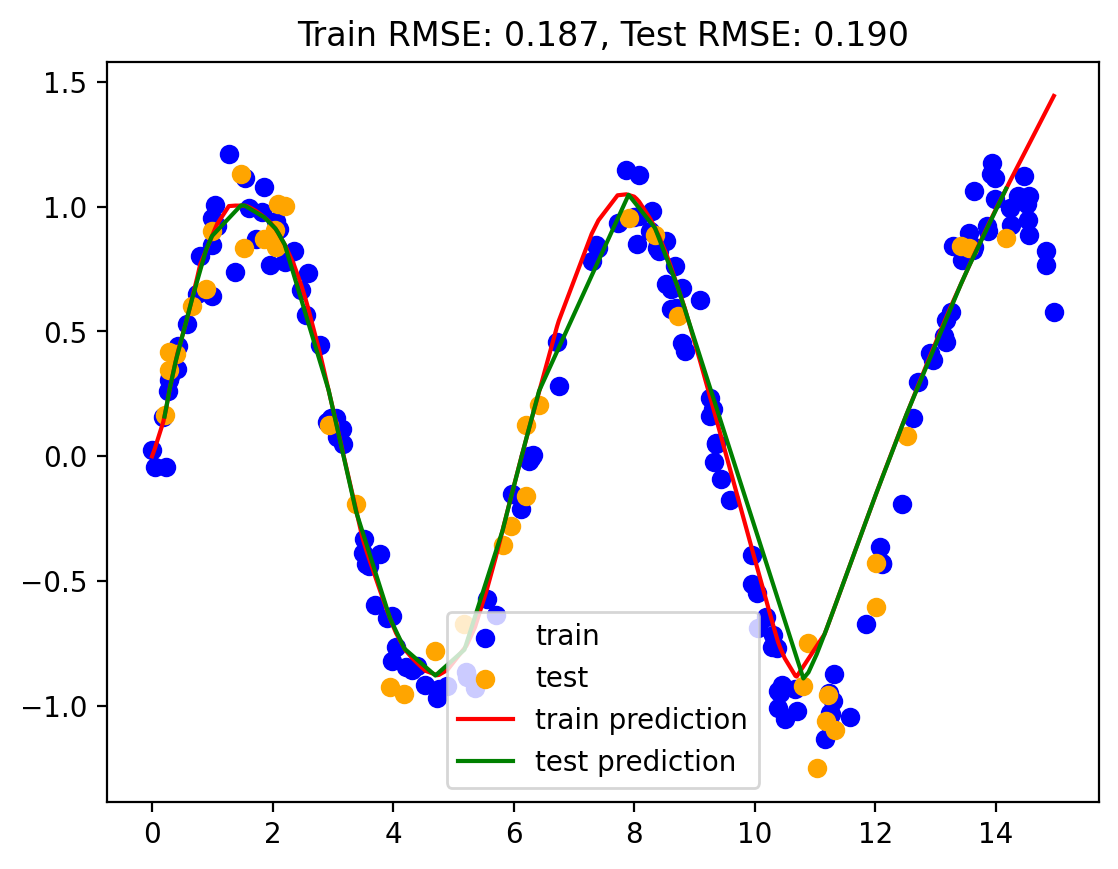

In [ ]:
yhat_train = mlp_model.predict(np.array(train.x).reshape(-1, 1))
yhat_test = mlp_model.predict(np.array(test.x).reshape(-1, 1))
train_rmse, test_rmse = plot_predictions(train, test, yhat_train, yhat_test)
rmse_dict['MLP'] = (train_rmse, test_rmse)

In [ ]:
lr1 = LinearRegression()
lr1.fit(np.array(train.x).reshape(-1, 1), train.y)

LinearRegression()

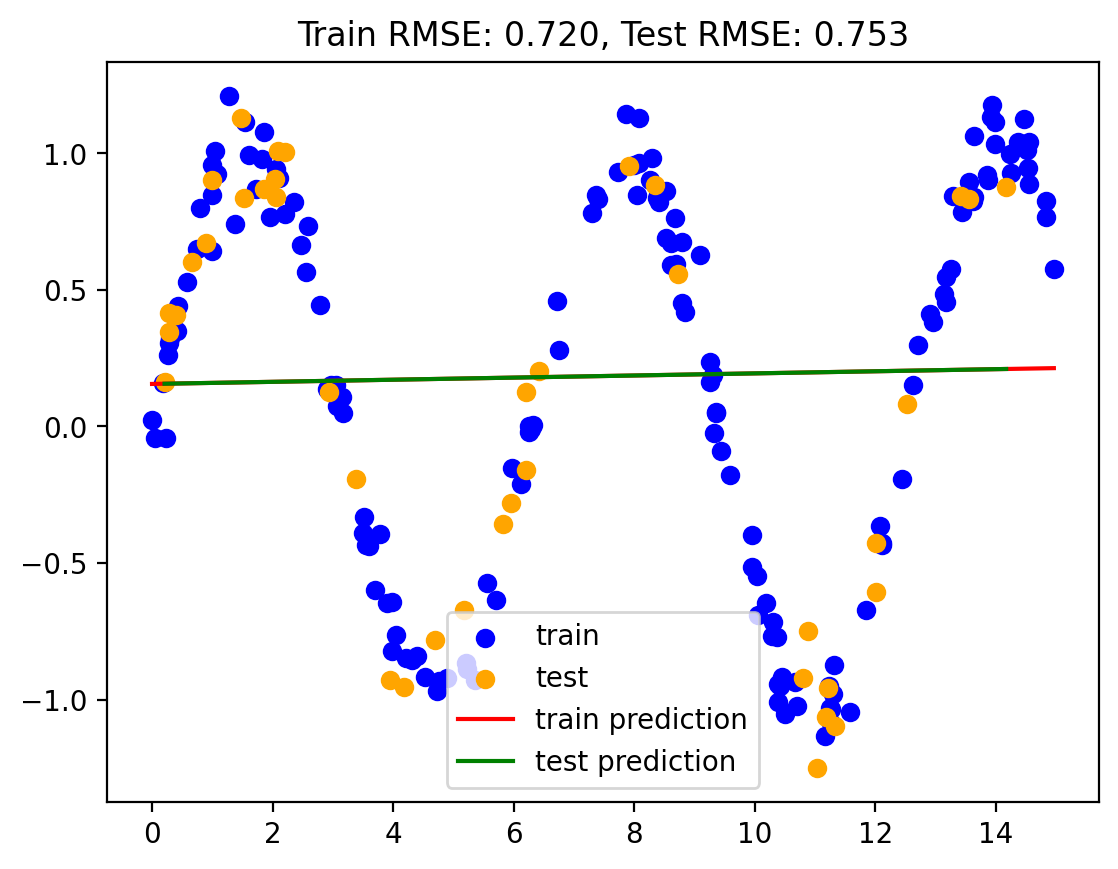

In [ ]:
yhat_train = lr1.predict(np.array(train.x).reshape(-1, 1))
yhat_test = lr1.predict(np.array(test.x).reshape(-1, 1))
train_rmse, test_rmse = plot_predictions(train, test, yhat_train, yhat_test)
rmse_dict['Vanilla LR'] = (train_rmse, test_rmse)

In [ ]:
def poly_regression(d, train, test):
    lr = LinearRegression()
    pf = PolynomialFeatures(degree=d)

    X_train = pf.fit_transform(train.x.values.reshape(-1, 1))
    X_test = pf.fit_transform(test.x.values.reshape(-1, 1))

    lr.fit(X_train, train.y)

    yhat_train = lr.predict(X_train)
    yhat_test = lr.predict(X_test)

    return yhat_train, yhat_test

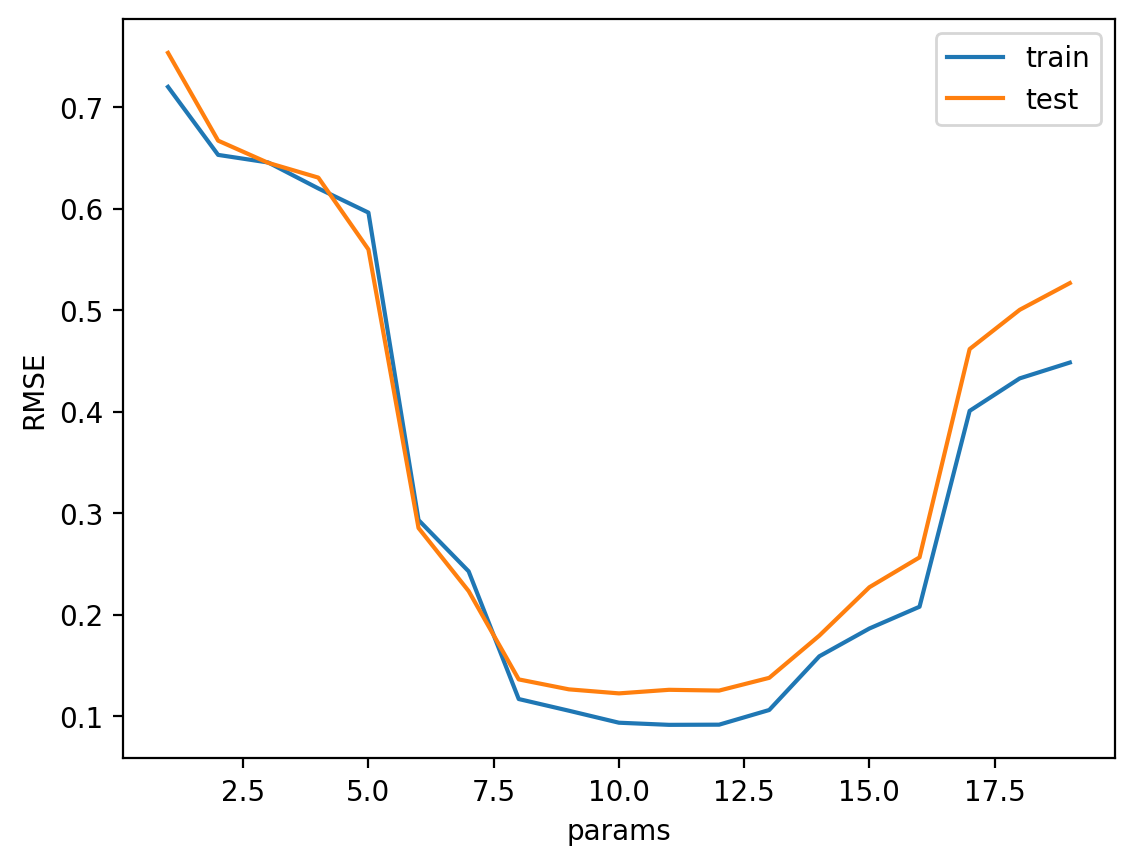

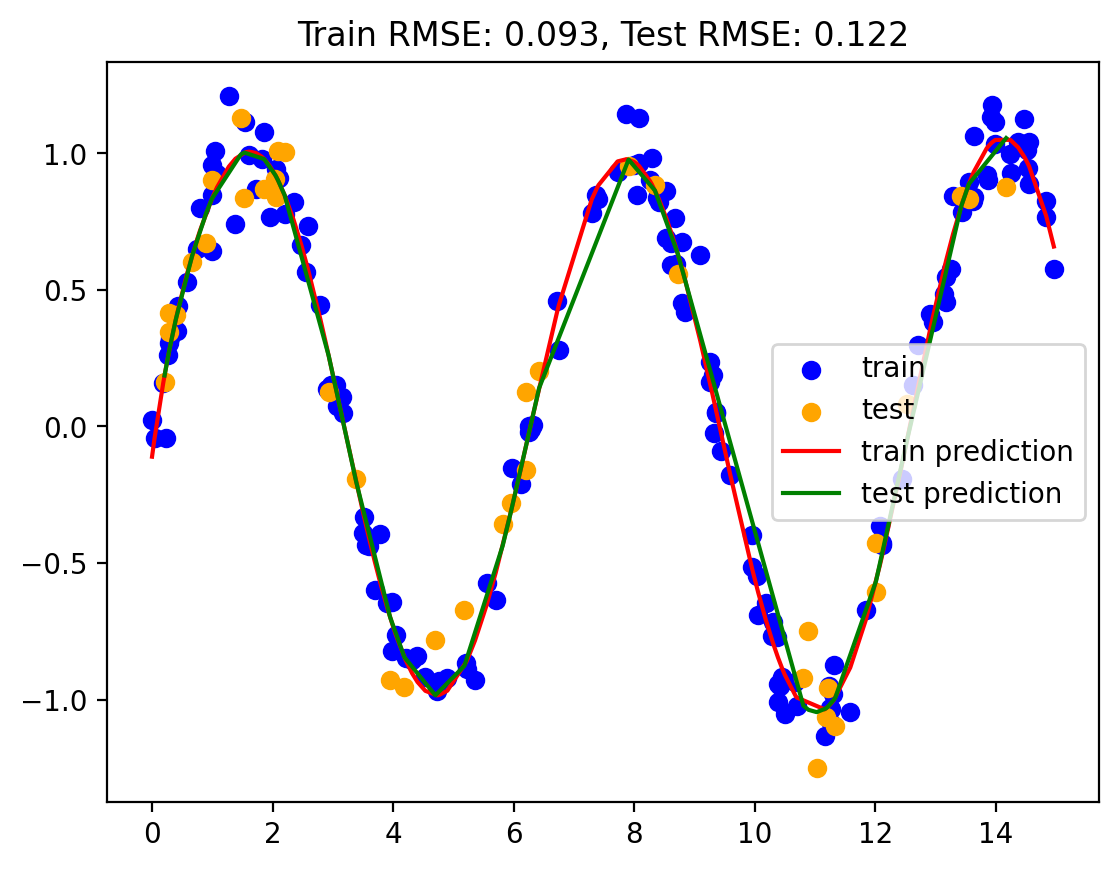

Best degree:  10


In [ ]:
# Hyperparameter tuning using grid search and showing bias variance tradeoff
degrees = range(1, 20)
best_degree = hyperparameter_tuning(degrees, train, test, poly_regression)
yhat_train, yhat_test = poly_regression(best_degree, train, test)
train_rmse, test_rmse = plot_predictions(train, test, yhat_train, yhat_test)
rmse_dict['Polynomial Regression'] = (train_rmse, test_rmse)
print("Best degree: ", best_degree)

In [ ]:
def sine_basis_regression(num_basis, train, test):
    lr = LinearRegression()
    for i in range(1, num_basis+1):
        train[f"sine_{i}"] = np.sin(i*train.x)
        train[f"cosine_{i}"] = np.cos(i*train.x)
        test[f"sine_{i}"] = np.sin(i*test.x)
        test[f"cosine_{i}"] = np.cos(i*test.x)

    X_train = train.drop(['y'], axis=1)
    X_test = test.drop(['y'], axis=1)

    lr.fit(X_train, train.y)

    yhat_train = lr.predict(X_train)
    yhat_test = lr.predict(X_test)

    return yhat_train, yhat_test

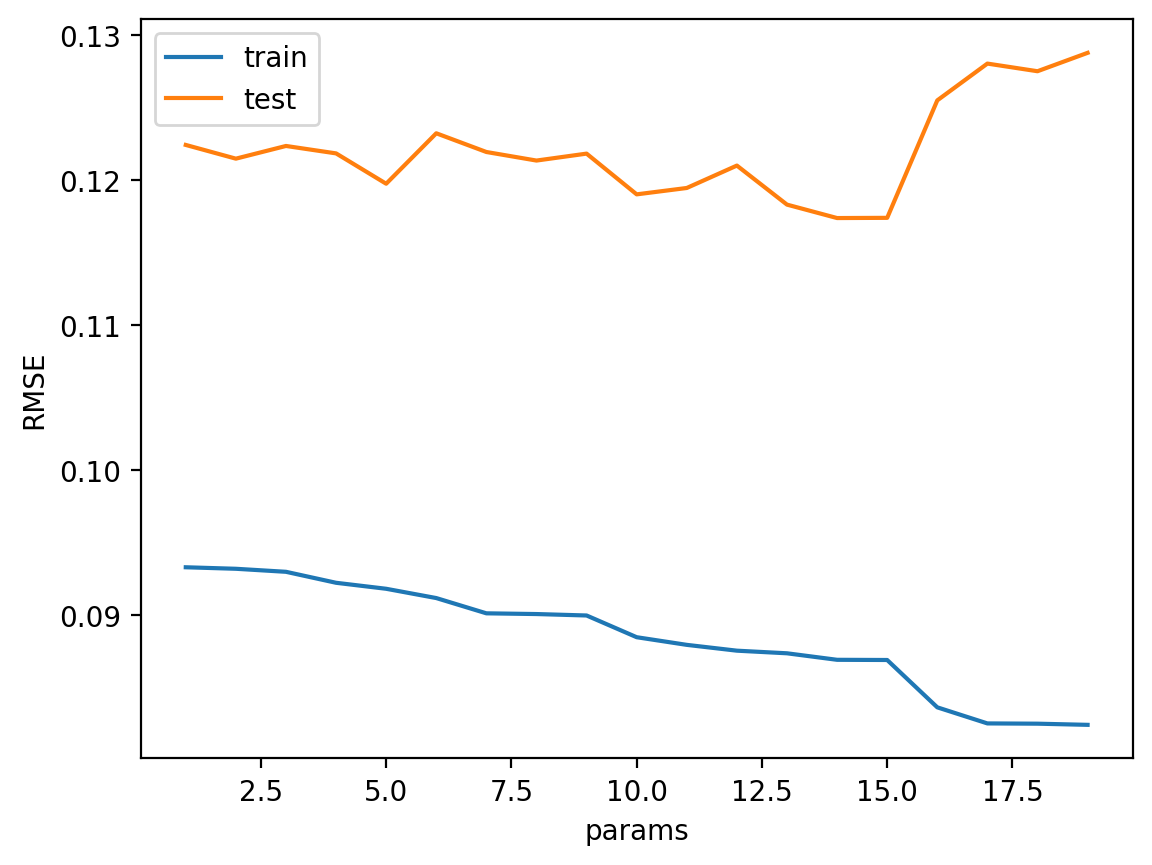

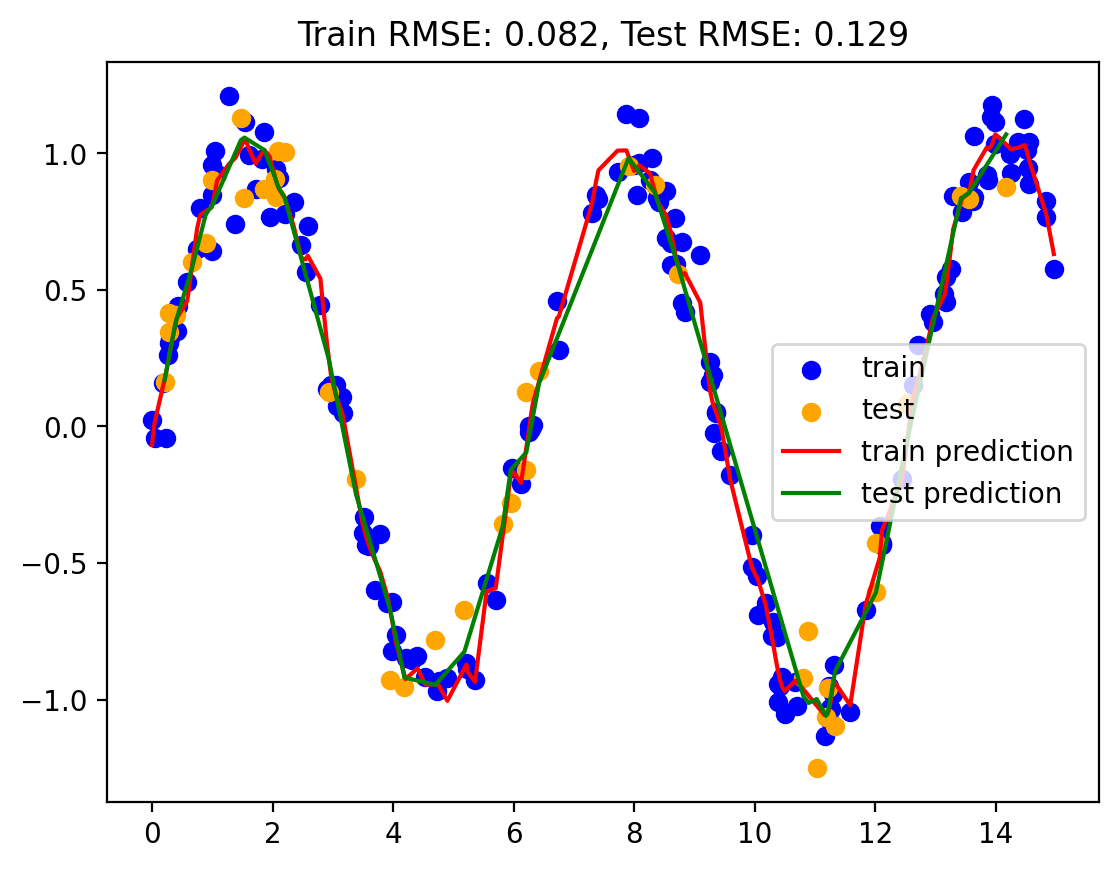

Best number of basis:  14


In [ ]:
basis = range(1, 20)
best_num_basis = hyperparameter_tuning(basis, train, test, sine_basis_regression)
yhat_train, yhat_test = sine_basis_regression(best_num_basis, train, test)
train_rmse, test_rmse = plot_predictions(train, test, yhat_train, yhat_test)
rmse_dict['Sine Basis Regression'] = (train_rmse, test_rmse)
print("Best number of basis: ", best_num_basis)

In [ ]:
# Source: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Gaussian-basis-functions

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """
    Uniformly spaced Gaussian features for one-dimensional input

    Constructor with N centers and width_factor as hyperparameters
    N comes from the number of basis functions
    width_factor is the width of each basis function
    """

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

Best number of basis:  13


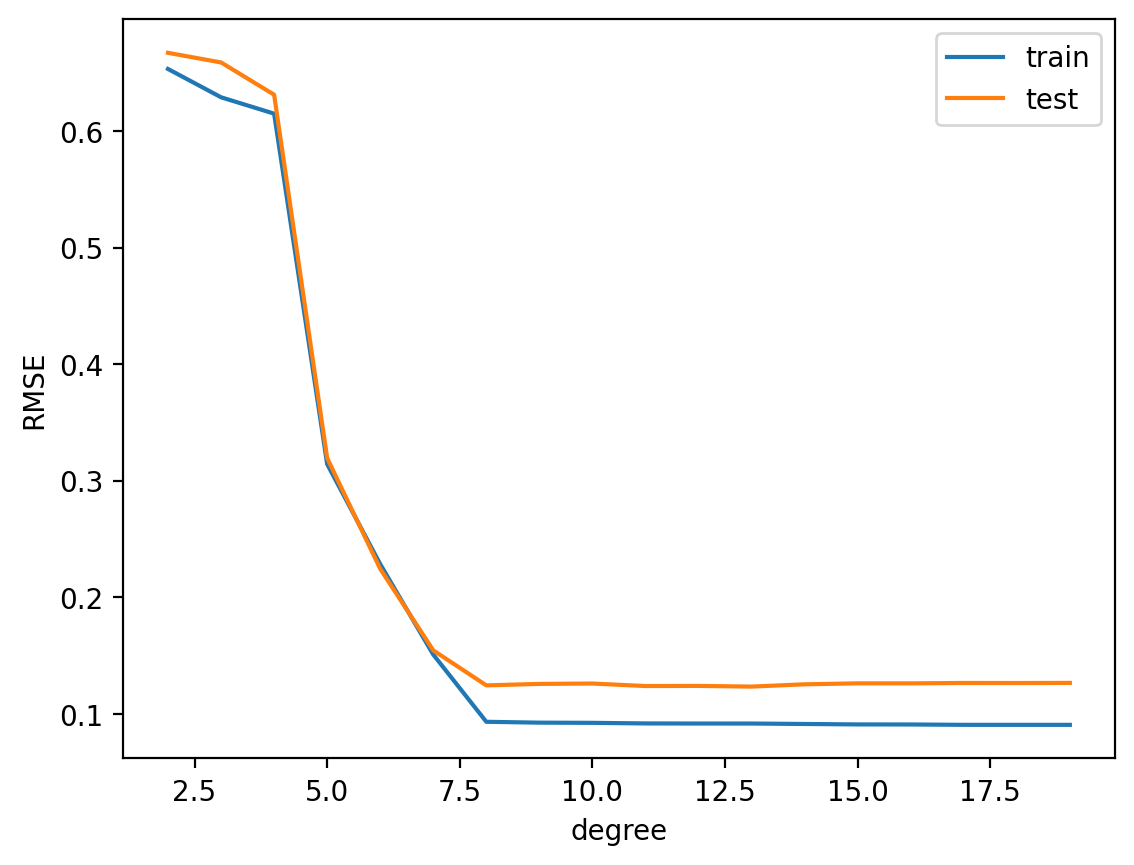

In [ ]:
# Hyperparameter tuning
basis = range(2, 20)

train_rmse = []
test_rmse = []
for d in basis:
    model = make_pipeline(GaussianFeatures(d), LinearRegression())
    model.fit(np.array(train.x).reshape(-1, 1), train.y)
    yhat_train = model.predict(np.array(train.x).reshape(-1, 1))
    yhat_test = model.predict(np.array(test.x).reshape(-1, 1))
    train_rmse.append(np.sqrt(np.mean((yhat_train - train.y)**2)))
    test_rmse.append(np.sqrt(np.mean((yhat_test - test.y)**2)))

best_num_basis = basis[np.argmin(test_rmse)]
print("Best number of basis: ", best_num_basis)
plt.plot(basis, train_rmse, label='train')
plt.plot(basis, test_rmse, label='test')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

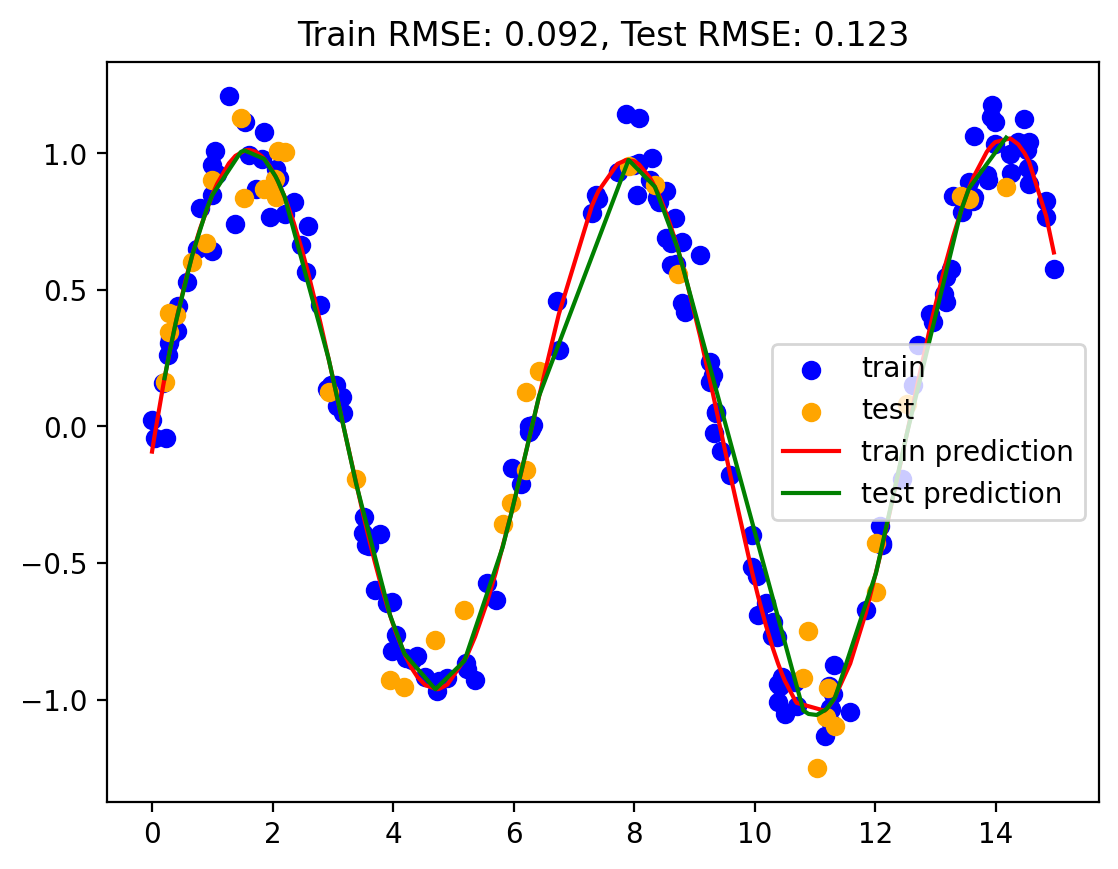

In [ ]:
gauss_model = make_pipeline(GaussianFeatures(best_num_basis), LinearRegression())
gauss_model.fit(np.array(train.x).reshape(-1, 1), train.y)
yhat_train = gauss_model.predict(train.x.values.reshape(-1, 1))
yhat_test = gauss_model.predict(test.x.values.reshape(-1, 1))
train_rmse, test_rmse = plot_predictions(train, test, yhat_train, yhat_test)
rmse_dict['Gaussian Basis Regression'] = (train_rmse, test_rmse)

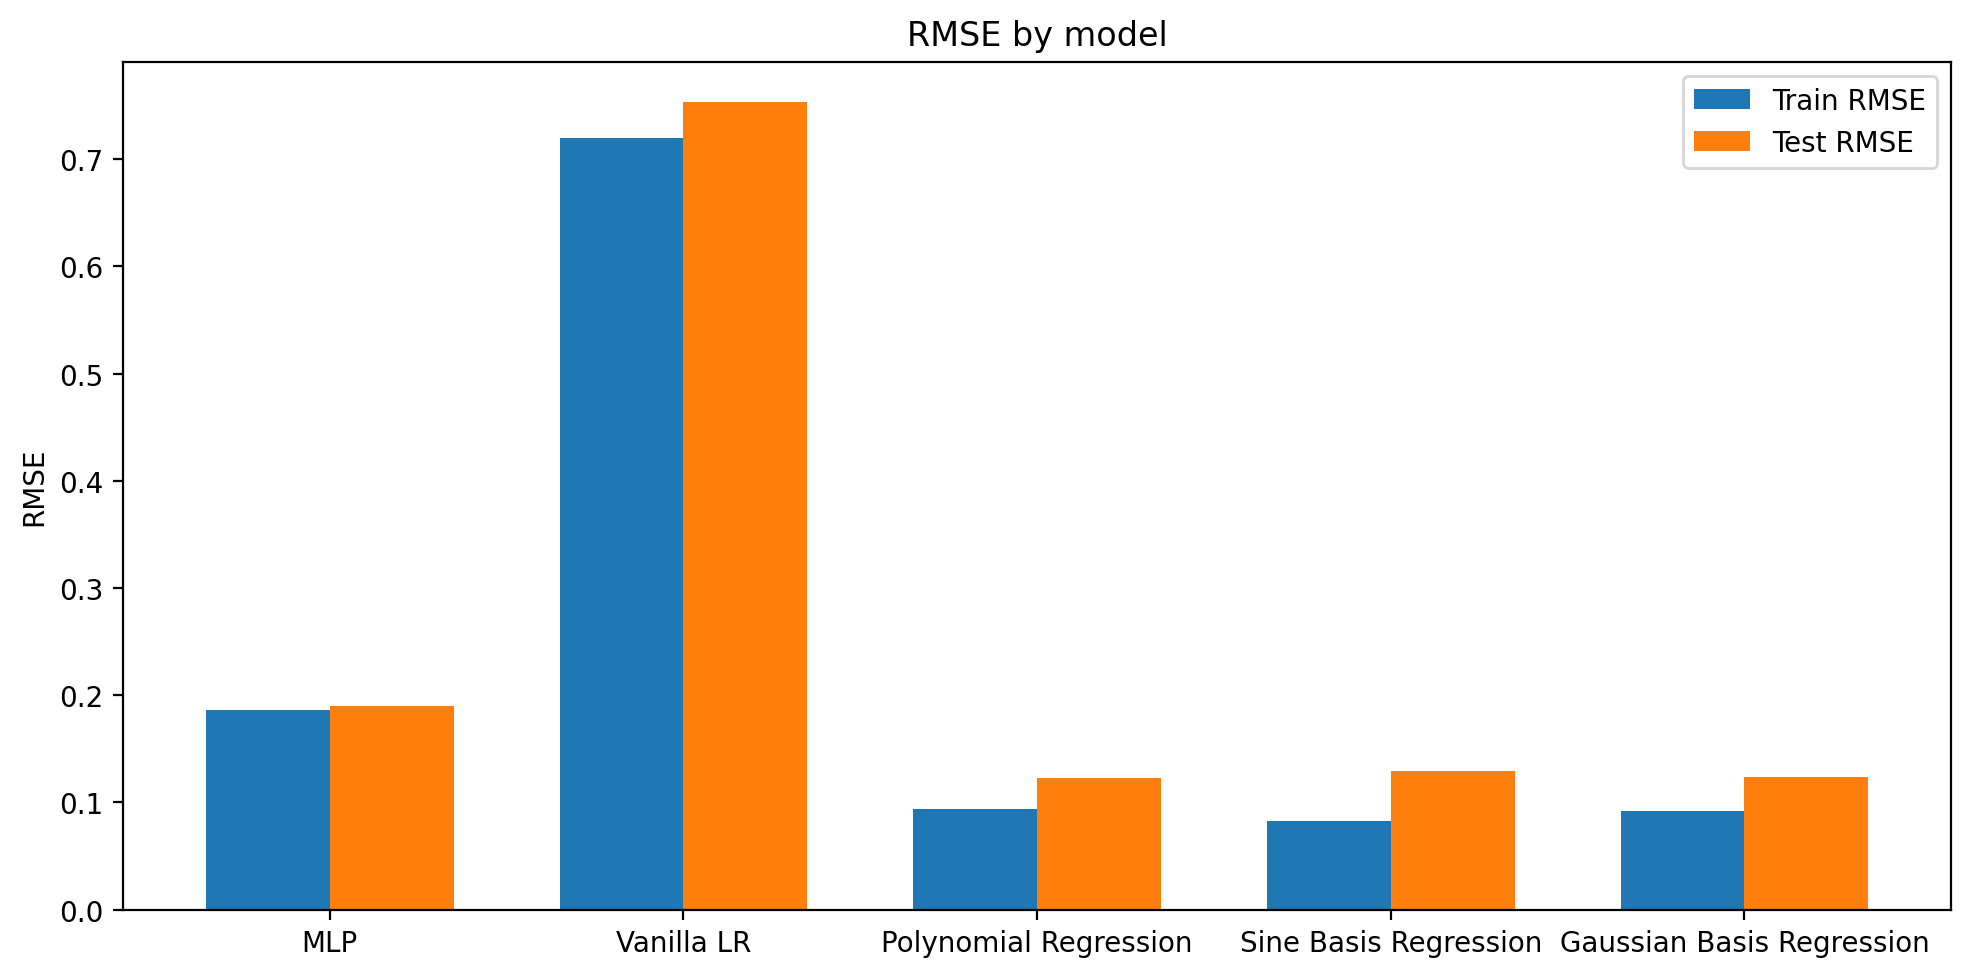

In [ ]:
# create a bar plot of train and test RMSE

train_rmse = [rmse_dict[key][0] for key in rmse_dict.keys()]
test_rmse = [rmse_dict[key][1] for key in rmse_dict.keys()]
labels = [key for key in rmse_dict.keys()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, train_rmse, width, label='Train RMSE')
rects2 = ax.bar(x + width/2, test_rmse, width, label='Test RMSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE')
ax.set_title('RMSE by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()